In [2]:
## PCA, MWMOTE, KERNEL PCA, MDS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import plotnine as plt9
from plotnine import *

from utils.visual import *

from utils.search_model import train_models
from utils.models import find_best_model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

from sklearn.impute import SimpleImputer, KNNImputer

import joblib
import json

## General view

In [2]:
# train_model("../data/initial_data/frmgham2_project_data.csv",'CVD','../src/results/general/first_attempt_result_4_balancers.csv')


In [54]:
# df = make_plots_each_algorithm("../src/results/first_attempt_result_4_balancers.csv")
df = pd.read_csv("../src/results/general/full_data_performances_9_models_5_balancers.csv")

df = df[df['Metric'].apply(lambda x: False if x.split("-")[1] in ['TP','TN','FP','FN','FalsePositiveRate','FalseNegativeRate'] else True)]
df['Score'] = round(df['Score'],2)
df['Set'] = df['Metric'].apply(lambda x: x.split("-")[0])

metrics_map = {}

for met in df.Metric.unique():

    if met in ['Train-F-1','Test-F-1']:
        val = 'F-1'
    elif met in ['Train-AUC','Test-AUC']:
        val = 'AUC'
    else:
        val = met.split("-")[1]

    metrics_map[met] = val
    
df['MainMetric'] = df['Metric'].map(metrics_map)

algoritms = df.Algorithm.unique()
imputers = df.Imputer.unique()
imbalance = df.Imbalance.unique()
metricss = df.Metric


In [55]:
print("Number of models for each algorithm")
df.groupby('Algorithm')['Algorithm'].count()

Number of models for each algorithm


Algorithm
Bagging               120
DecisionTree          120
GradientBoosting      120
KNN                   120
LogisticRegression    120
NaiveBayes            120
RandomForest          120
SVM                   120
XGBoost               120
Name: Algorithm, dtype: int64

In [56]:
# algoritms_title = {"LogisticRegression":"Performance of Logistic Regression for each impution and data balancing approach",
#                   "DecisionTree":"Performance of Decision Tree for each impution and data balancing approach",
#                   "NaiveBayes":"Performance of Naive Bayes for each impution and data balancing approach",
#                   "KNN":"Performance of KNN for each impution and data balancing approach",
#                   "SVM":"Performance of SVM for each impution and data balancing approach"}

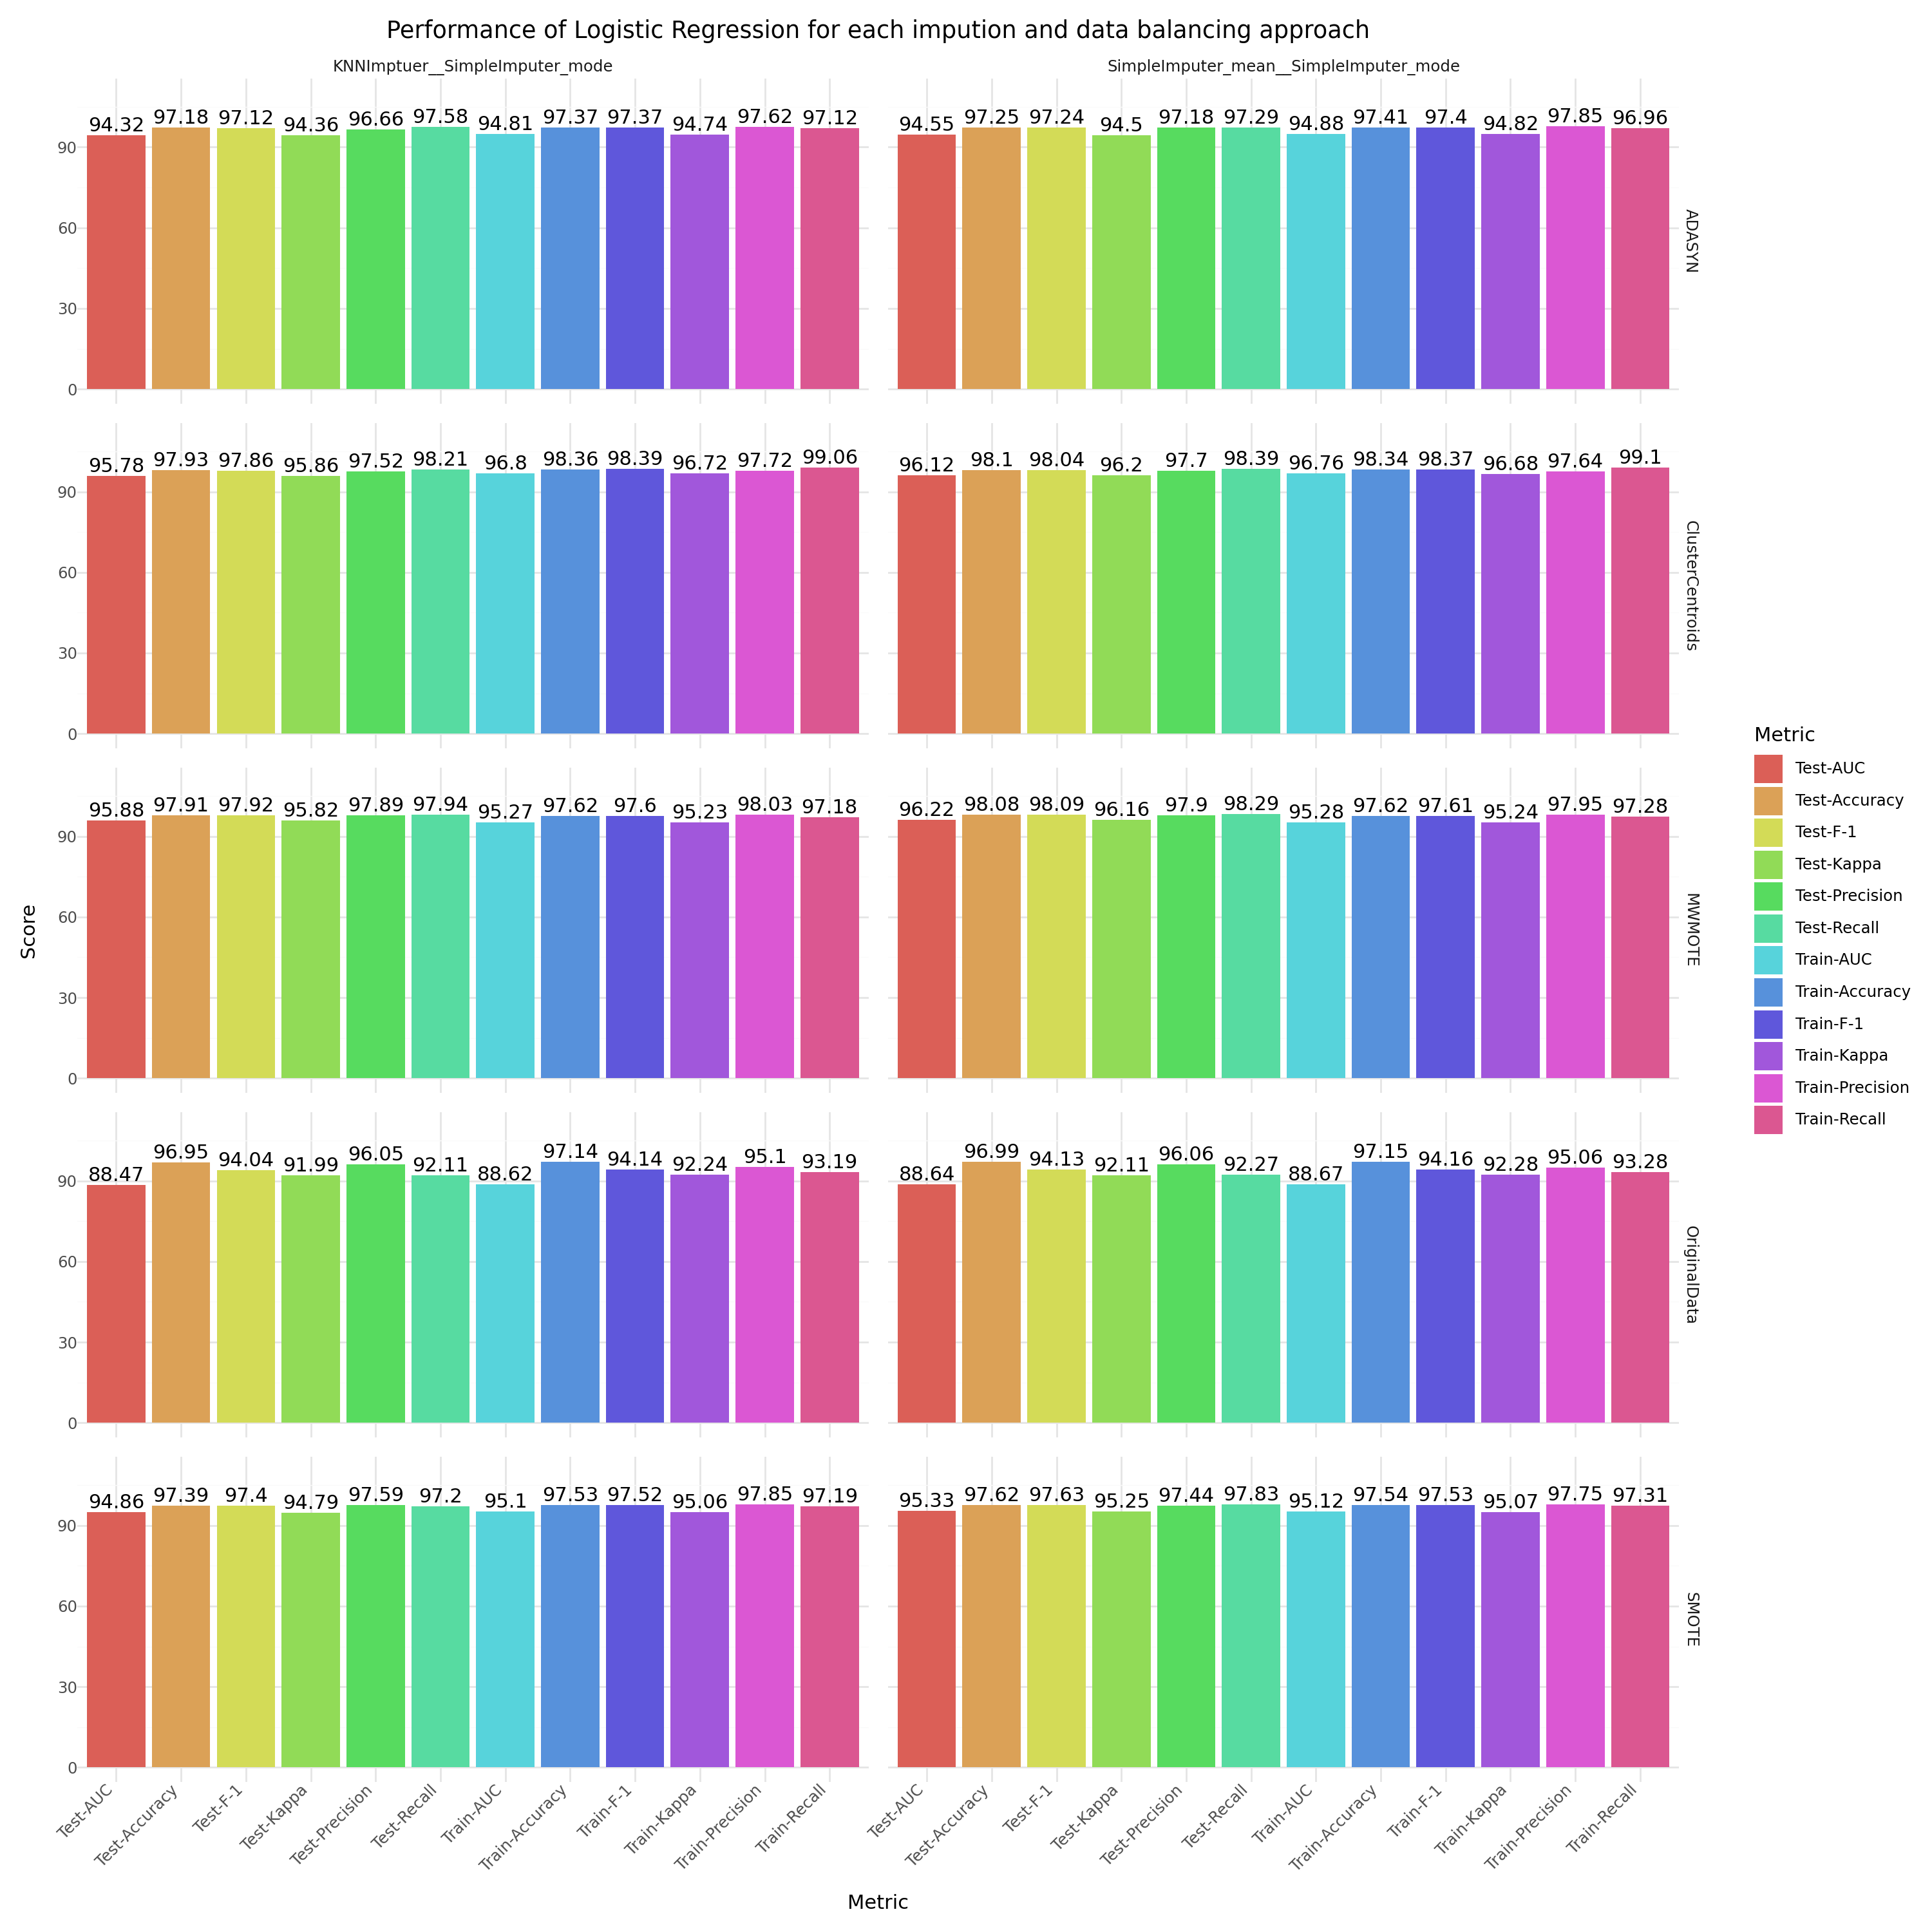

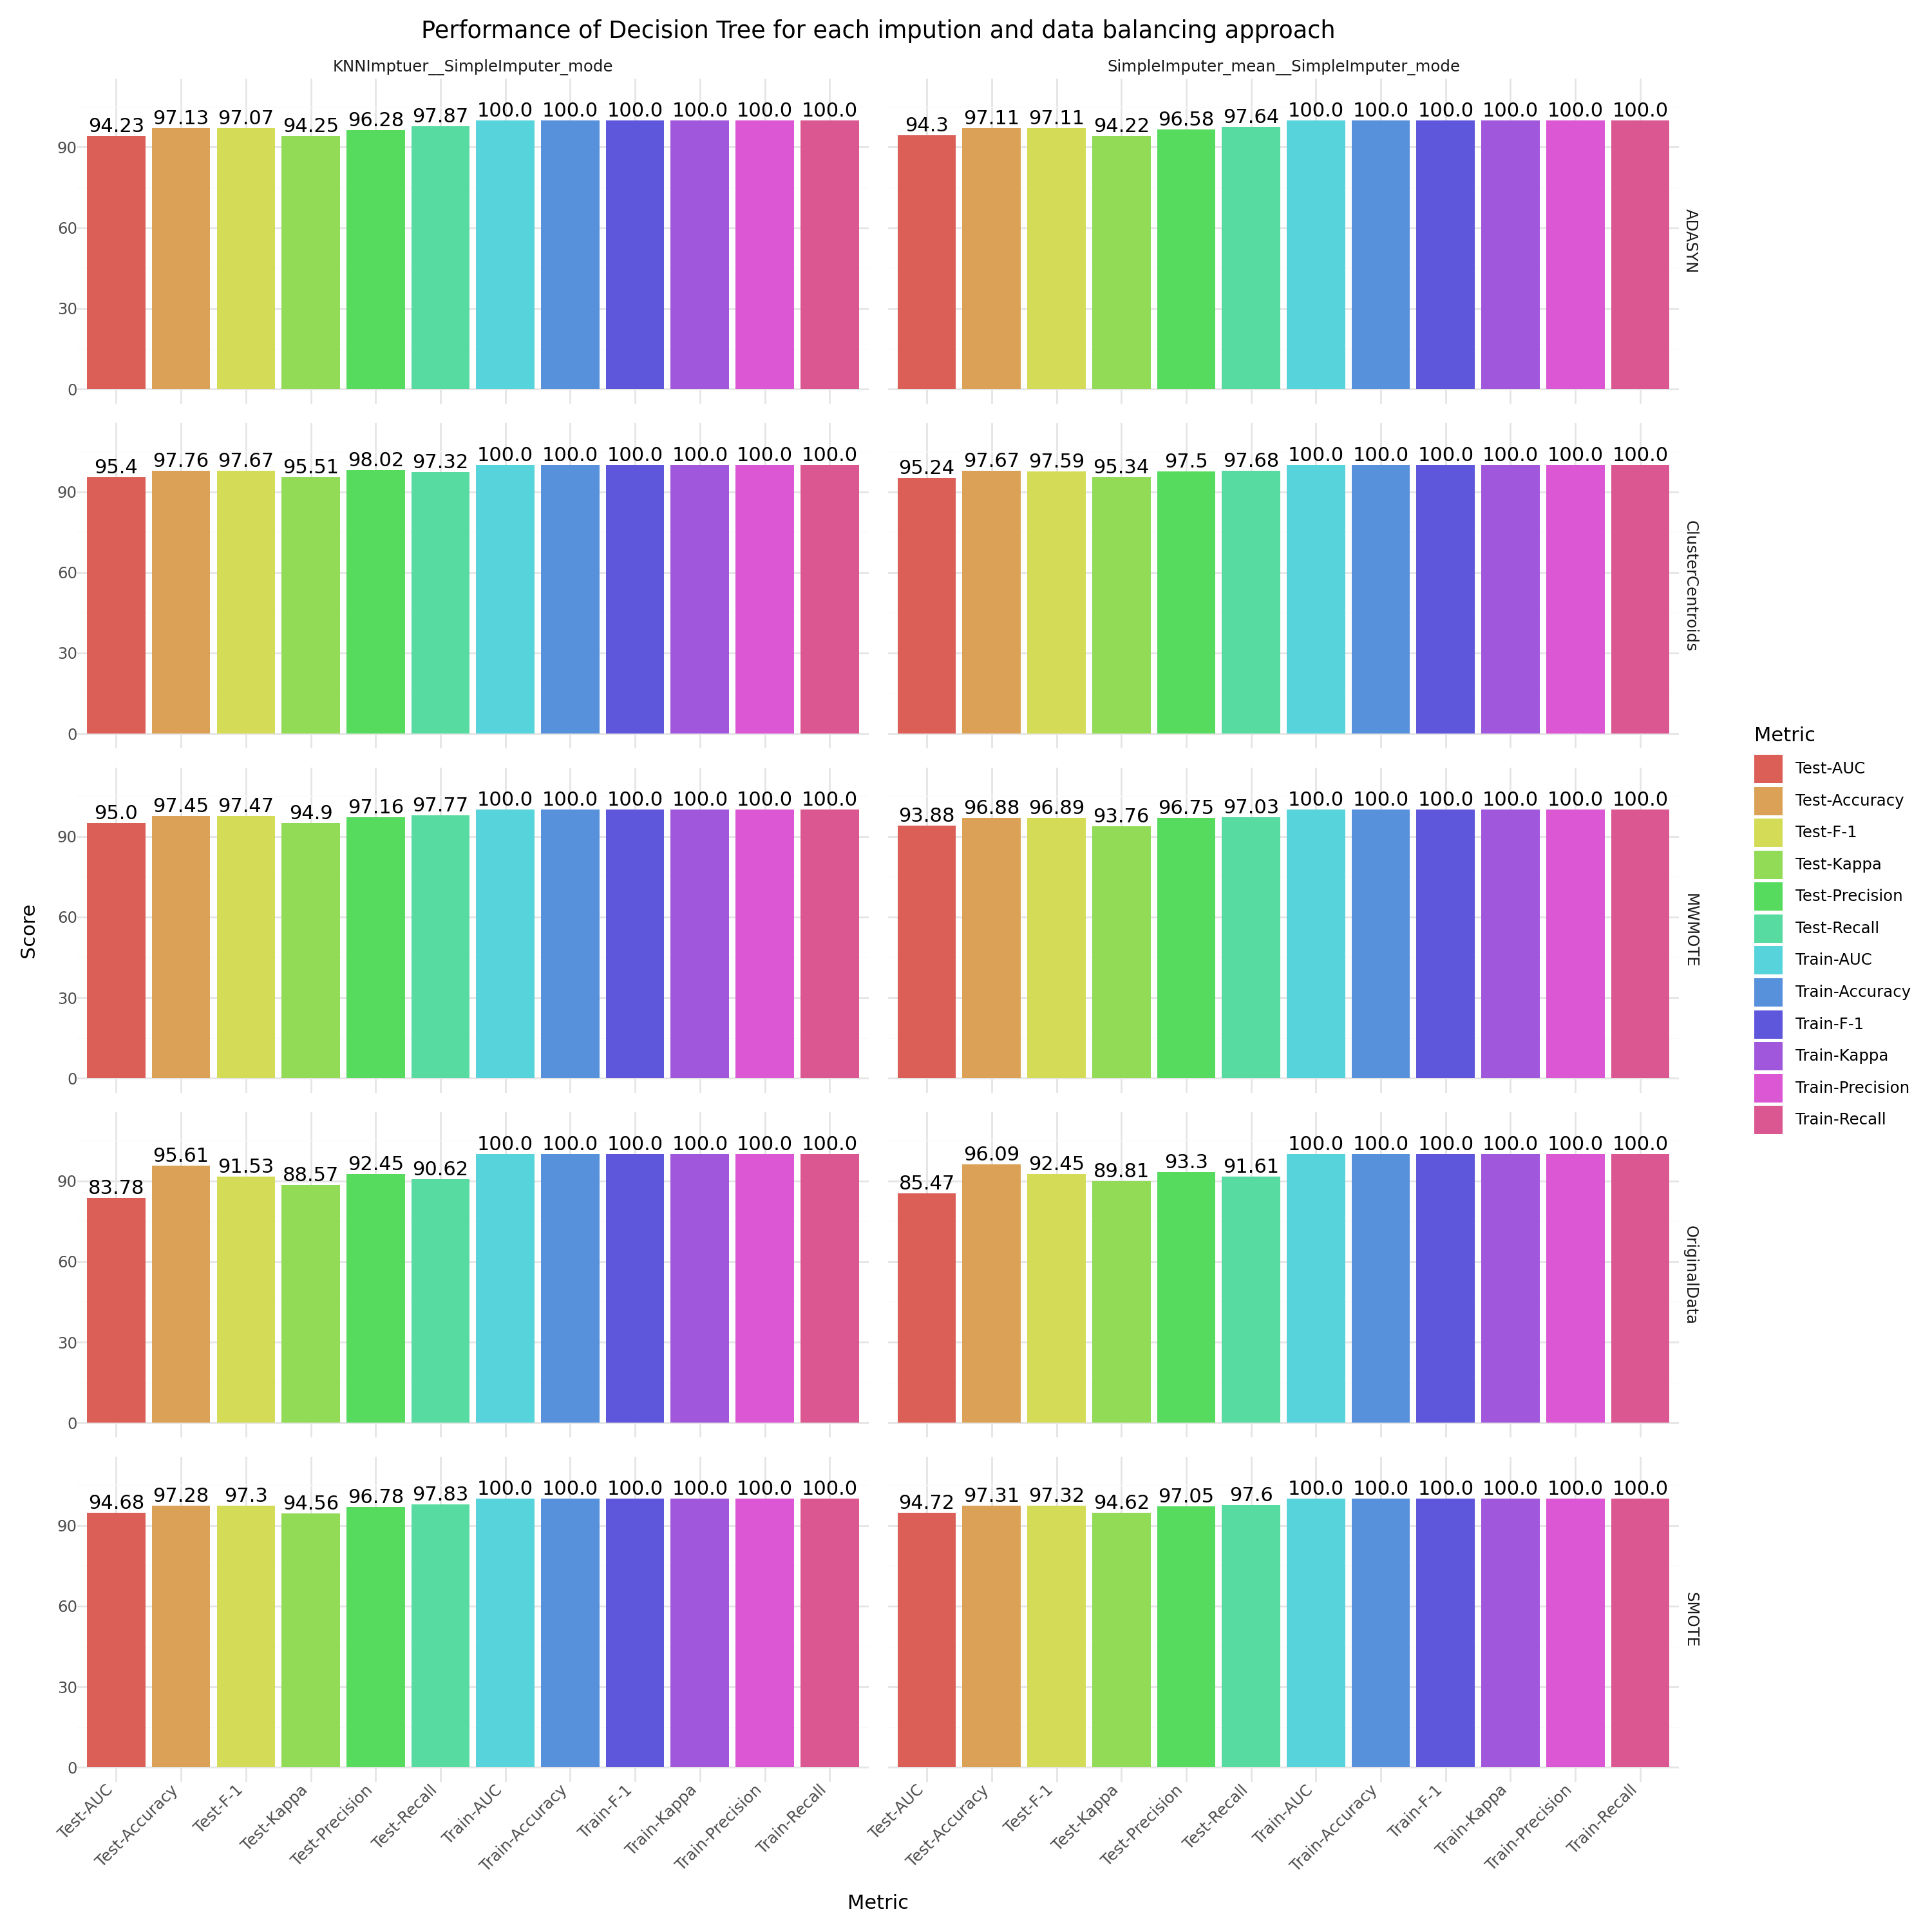

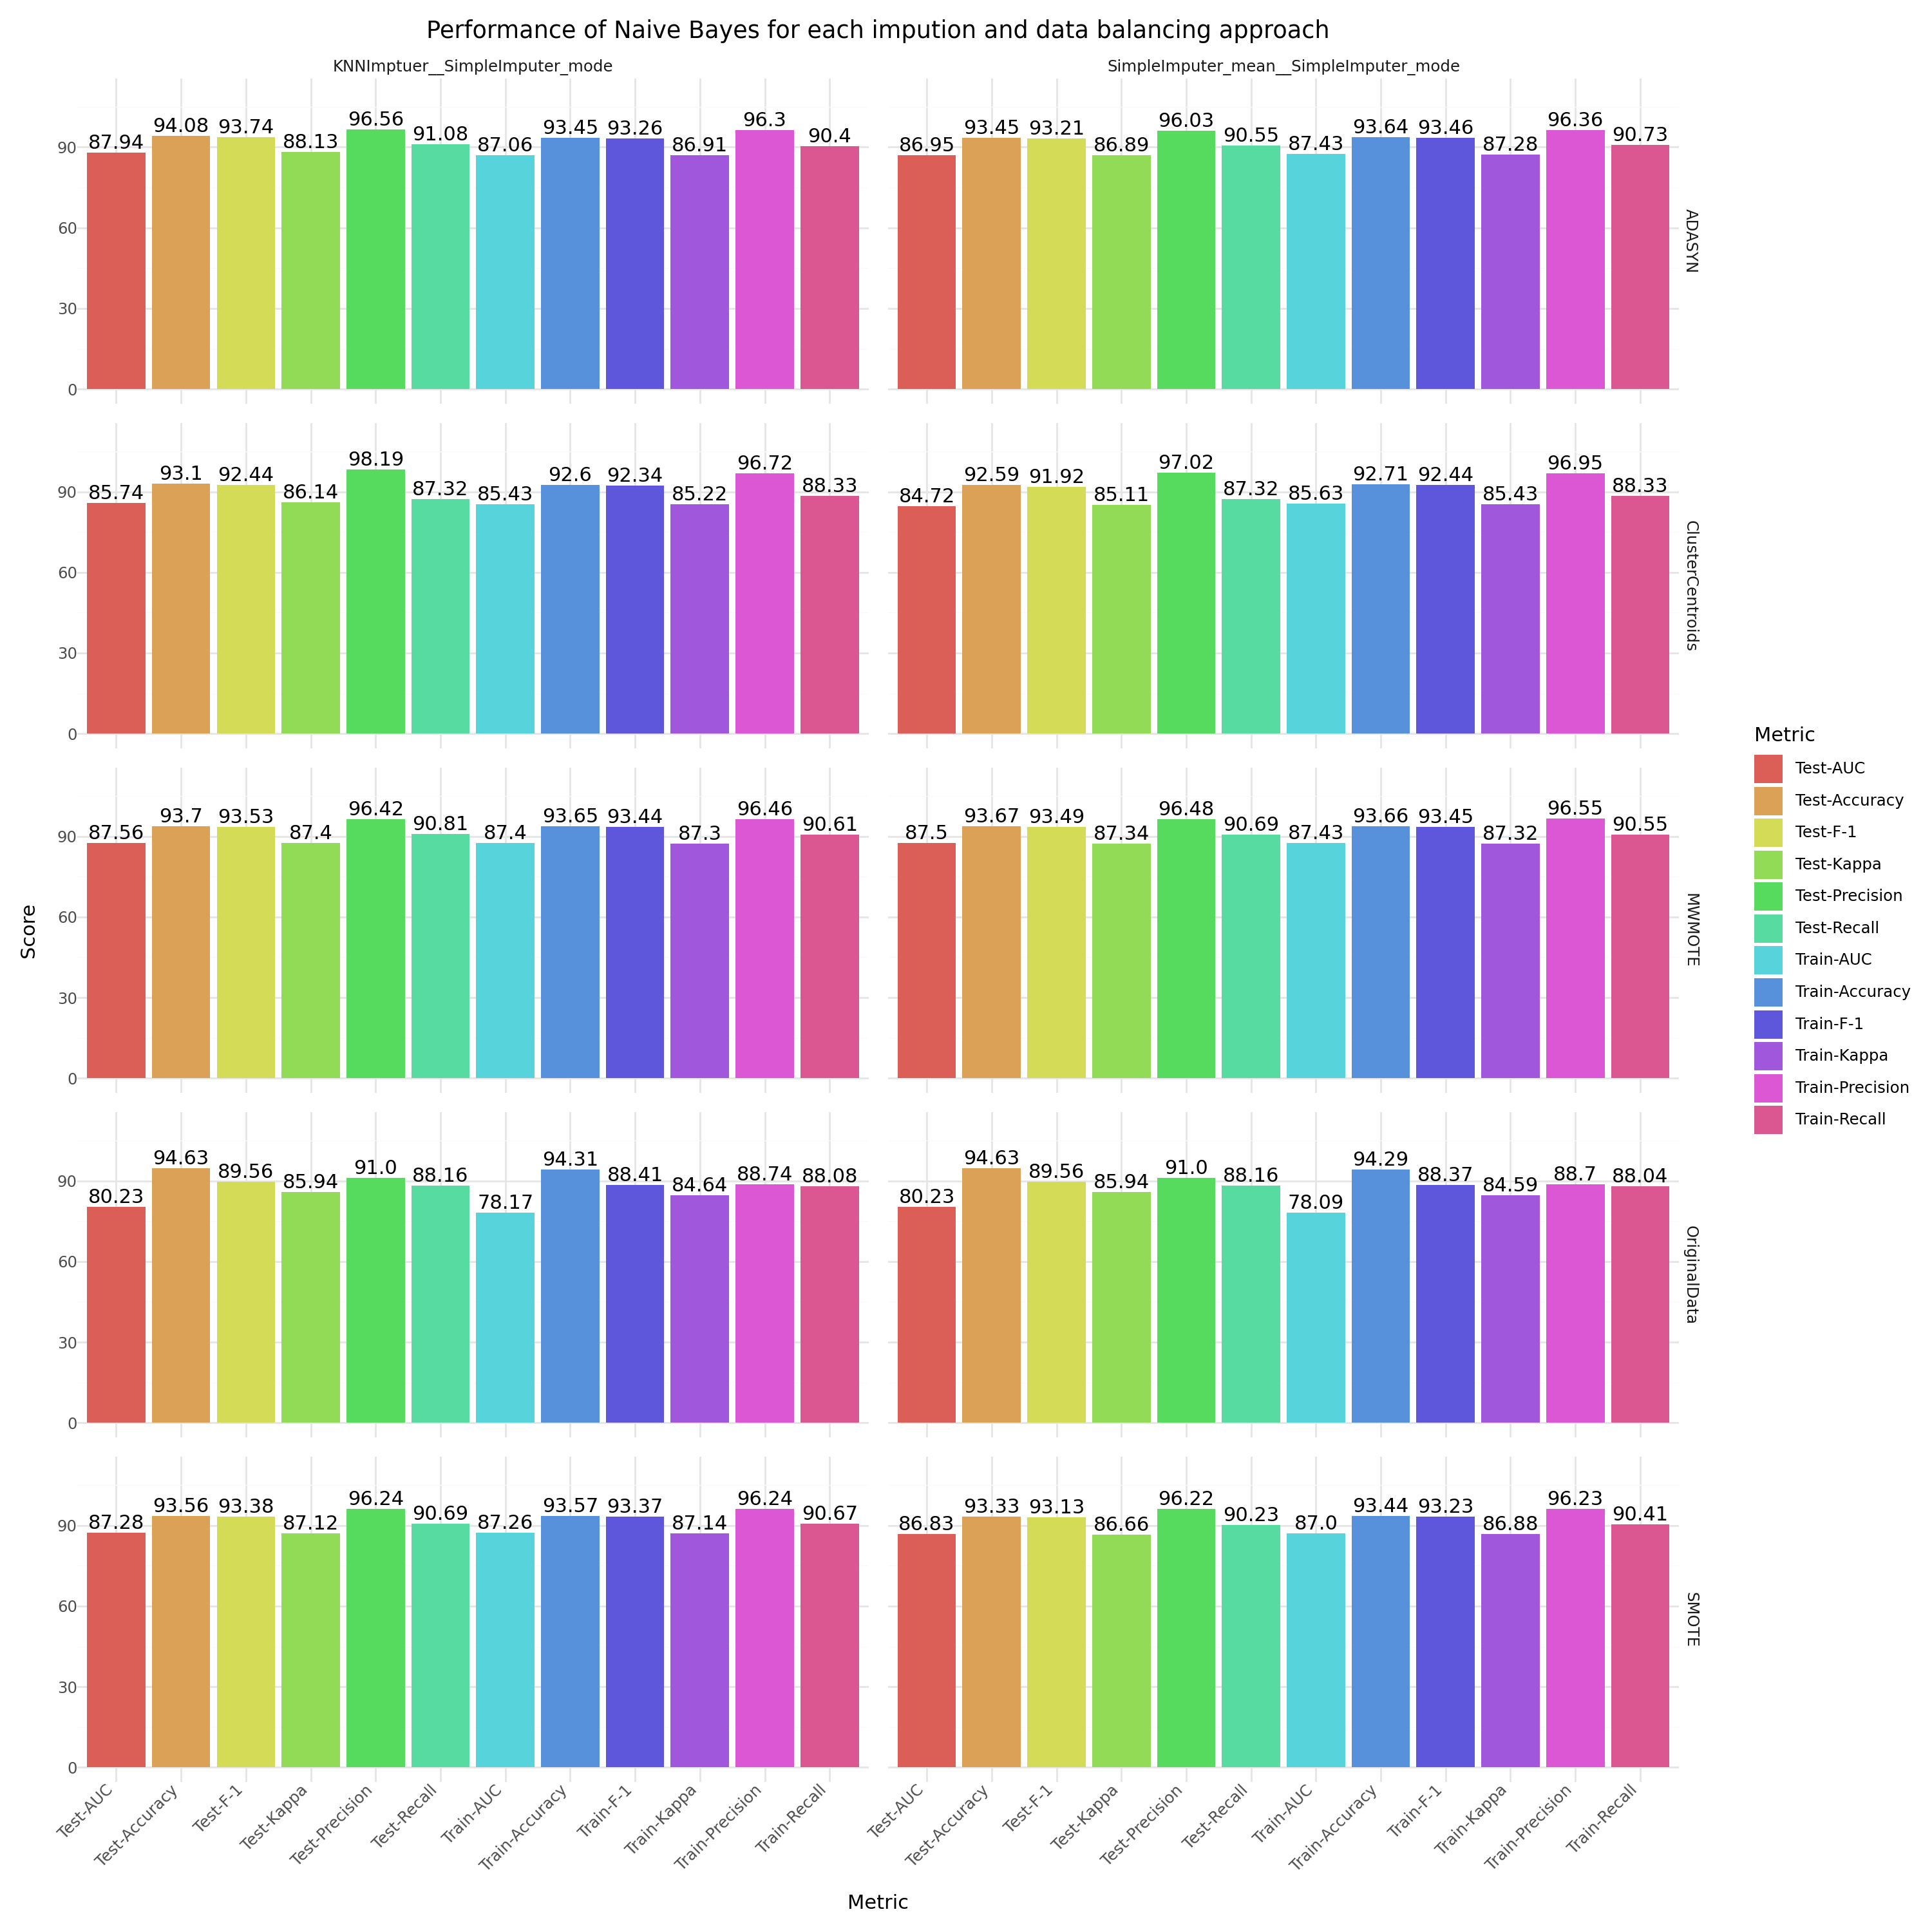

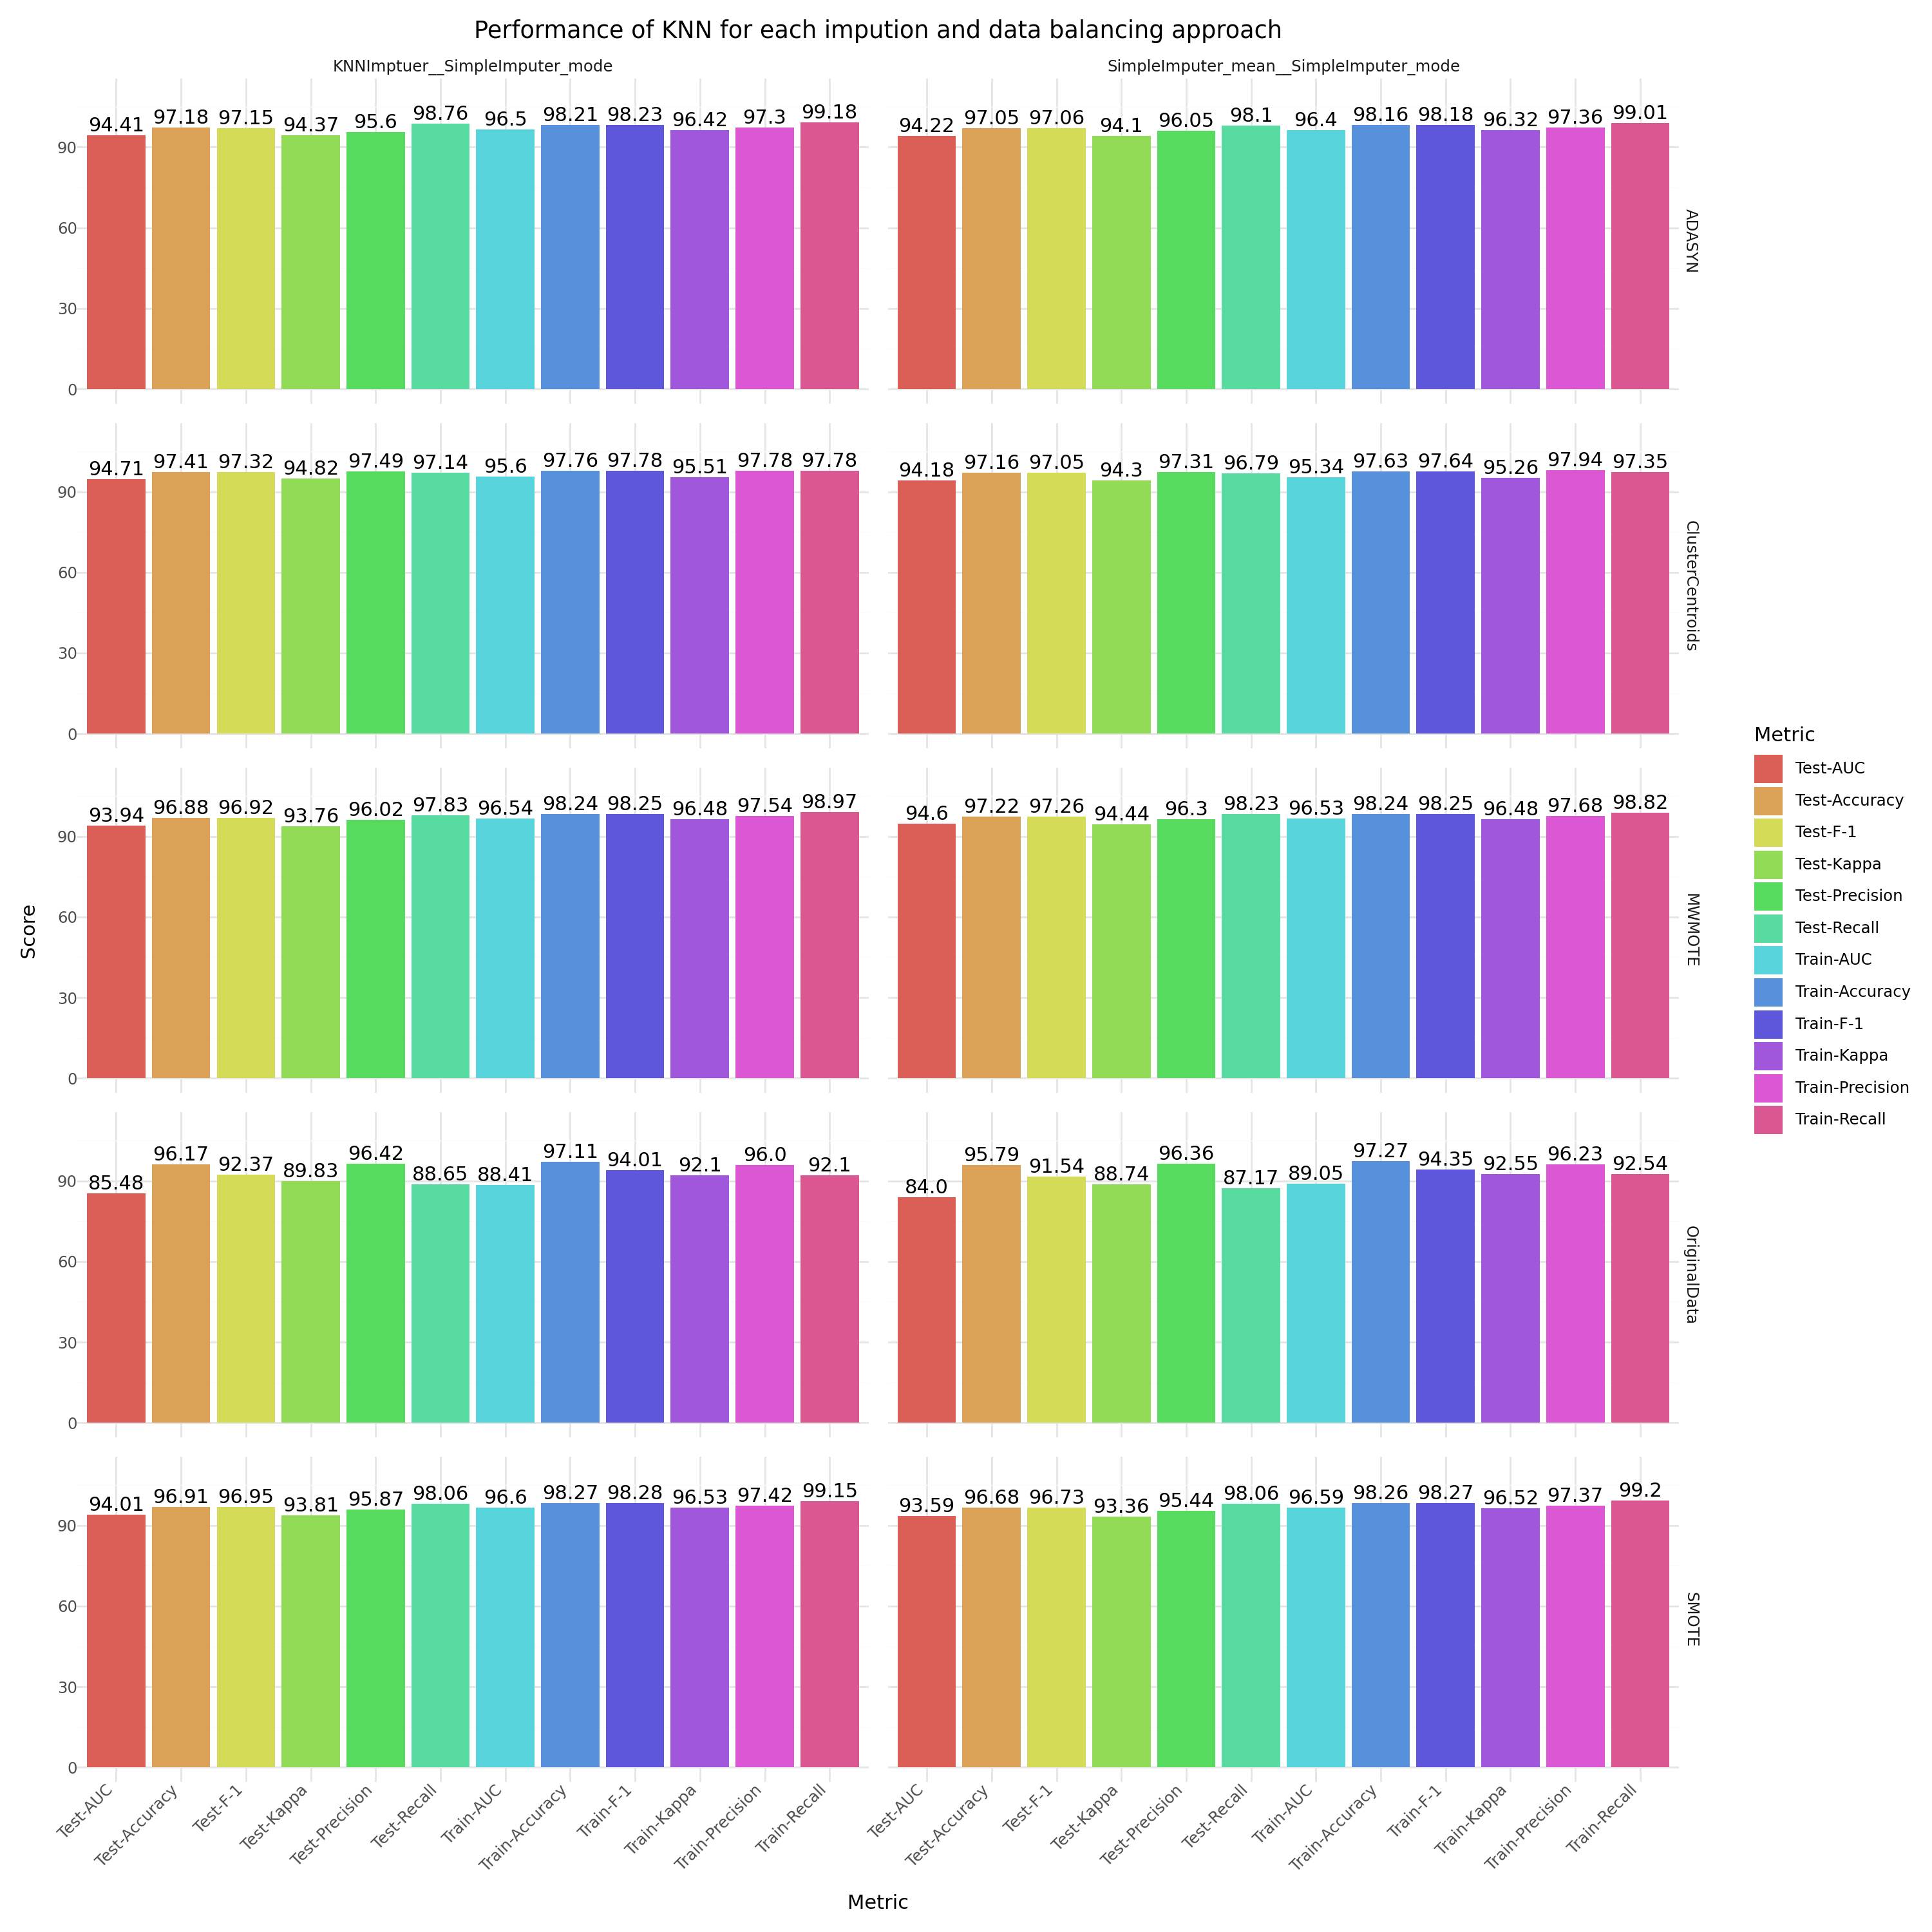

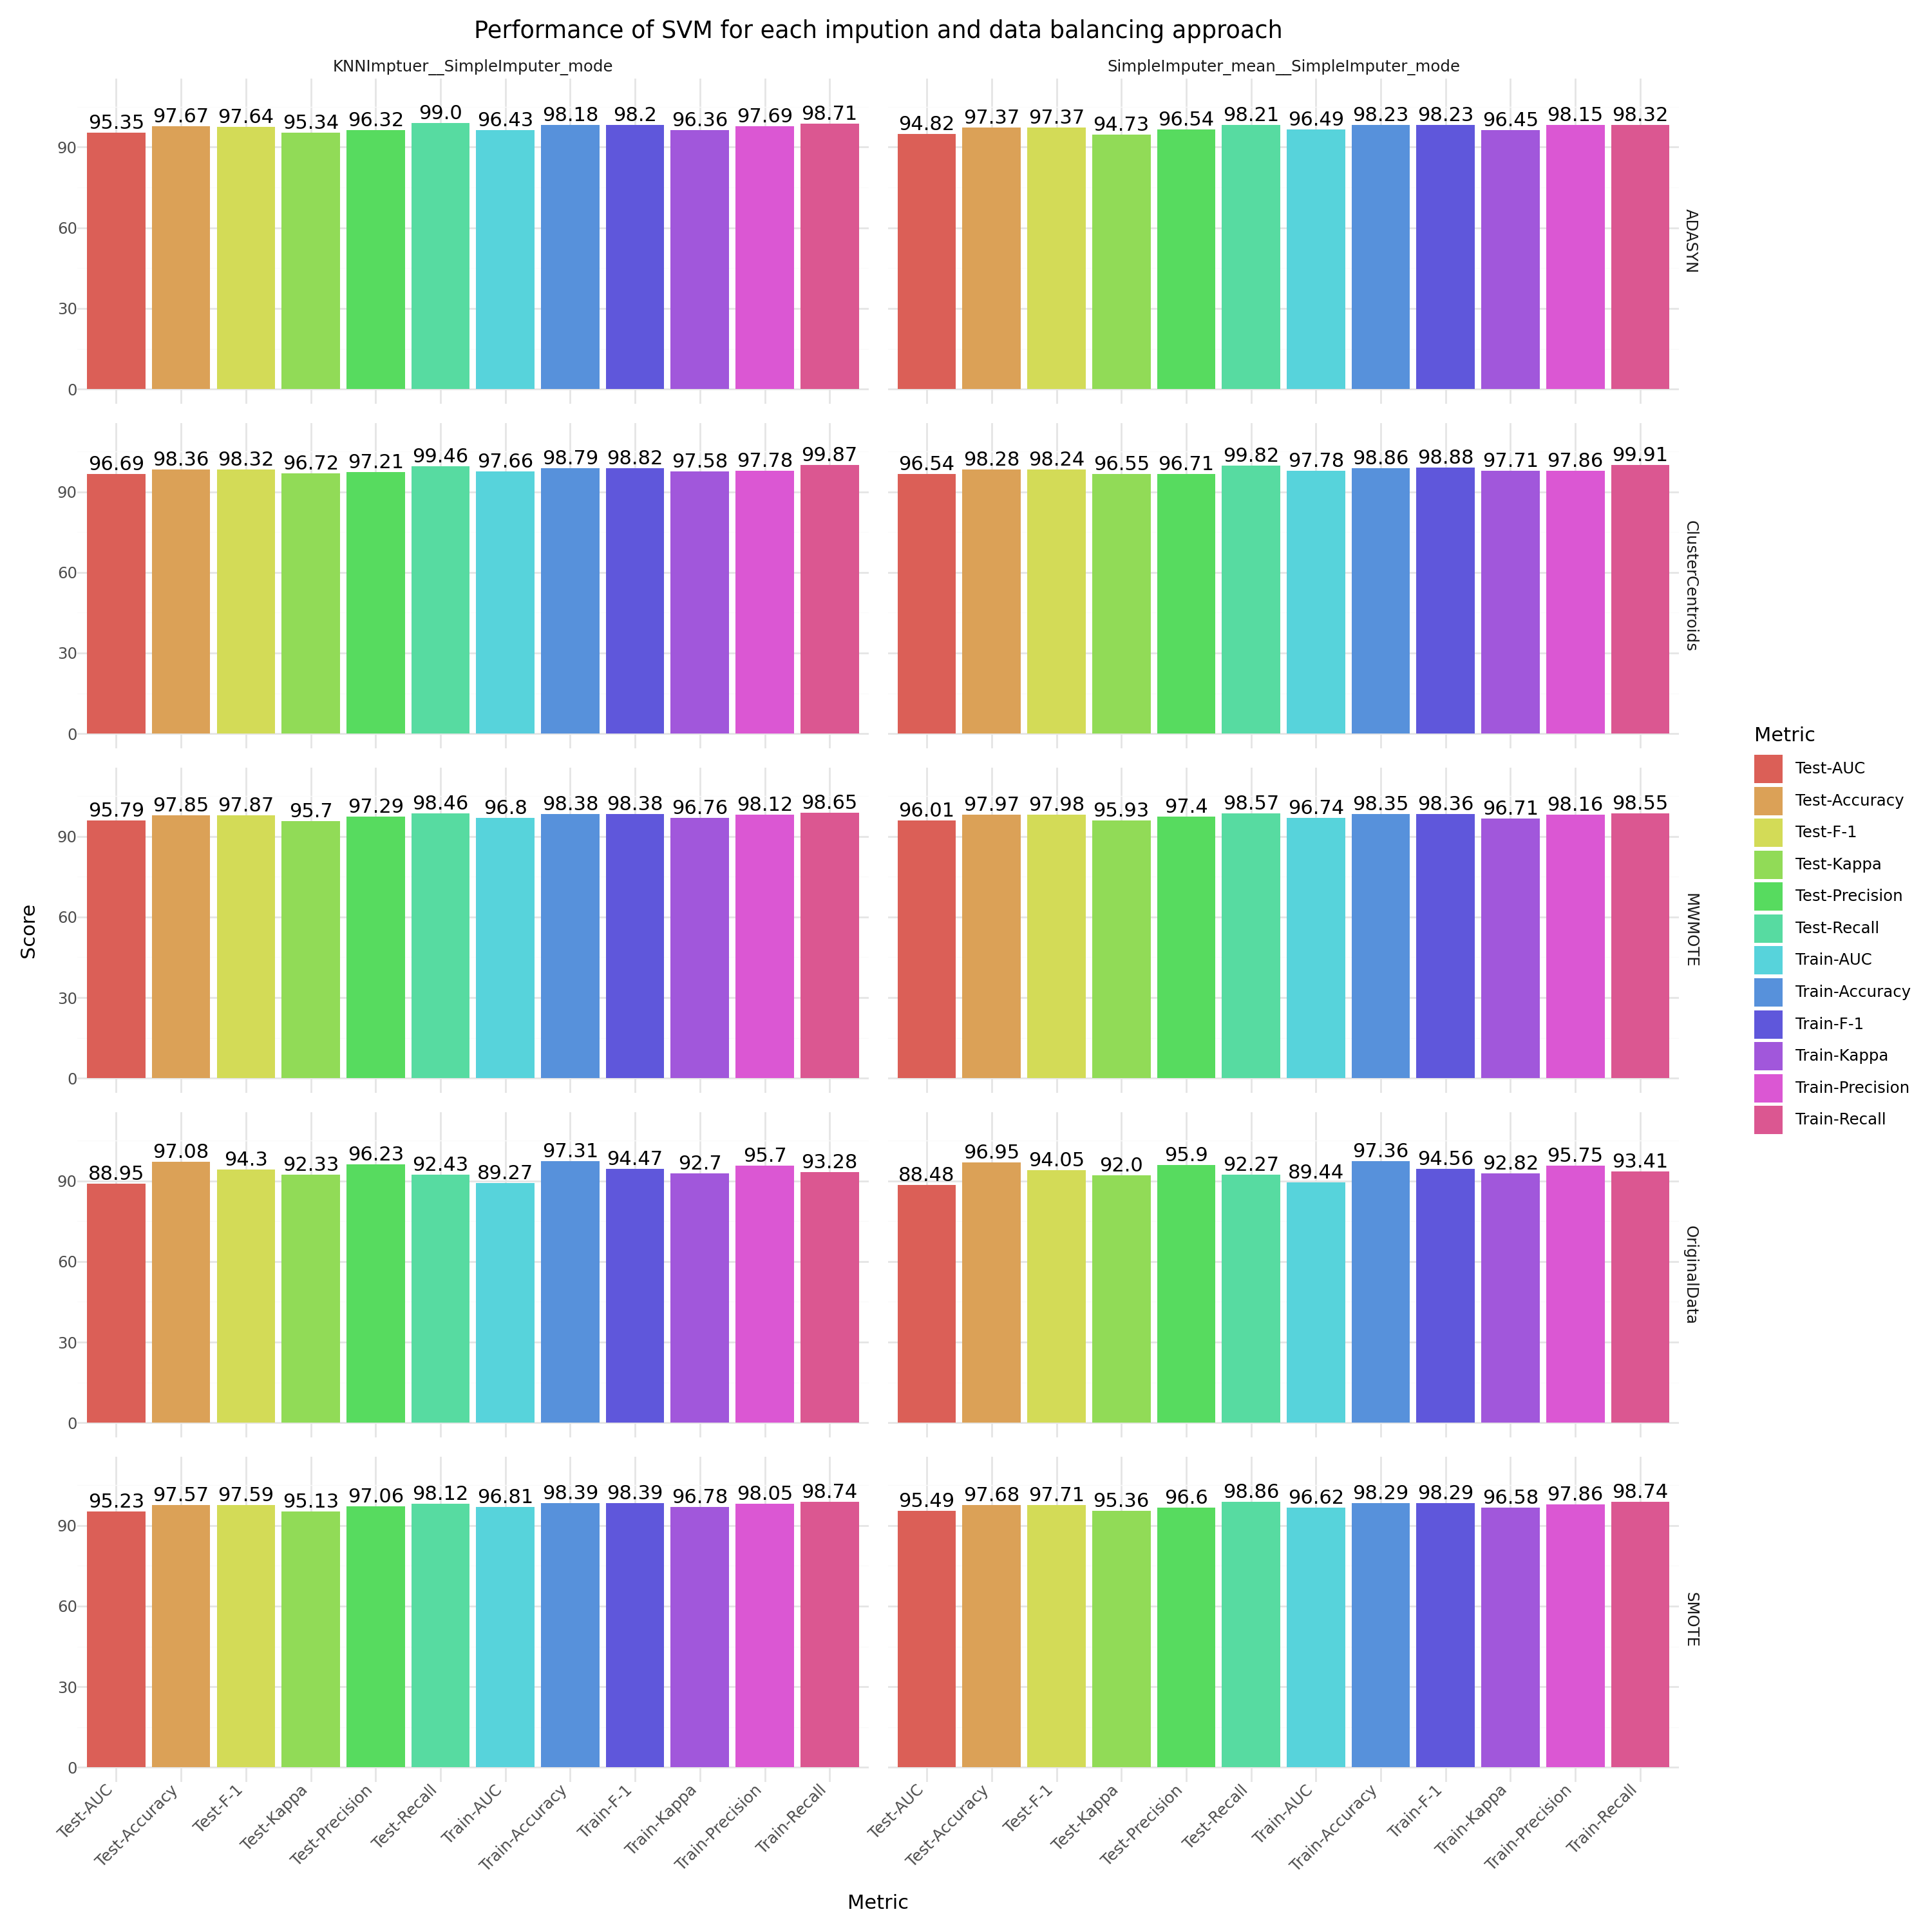

KeyError: 'RandomForest'

In [57]:
# performance for each algorithm with combination of different imputing technique and balancing approach
plot_for_each_algorithm(df)

In [ ]:
# the performance of each balancing approach with combination of different imputing technique and algorithm
plot_for_each_balancer(df)

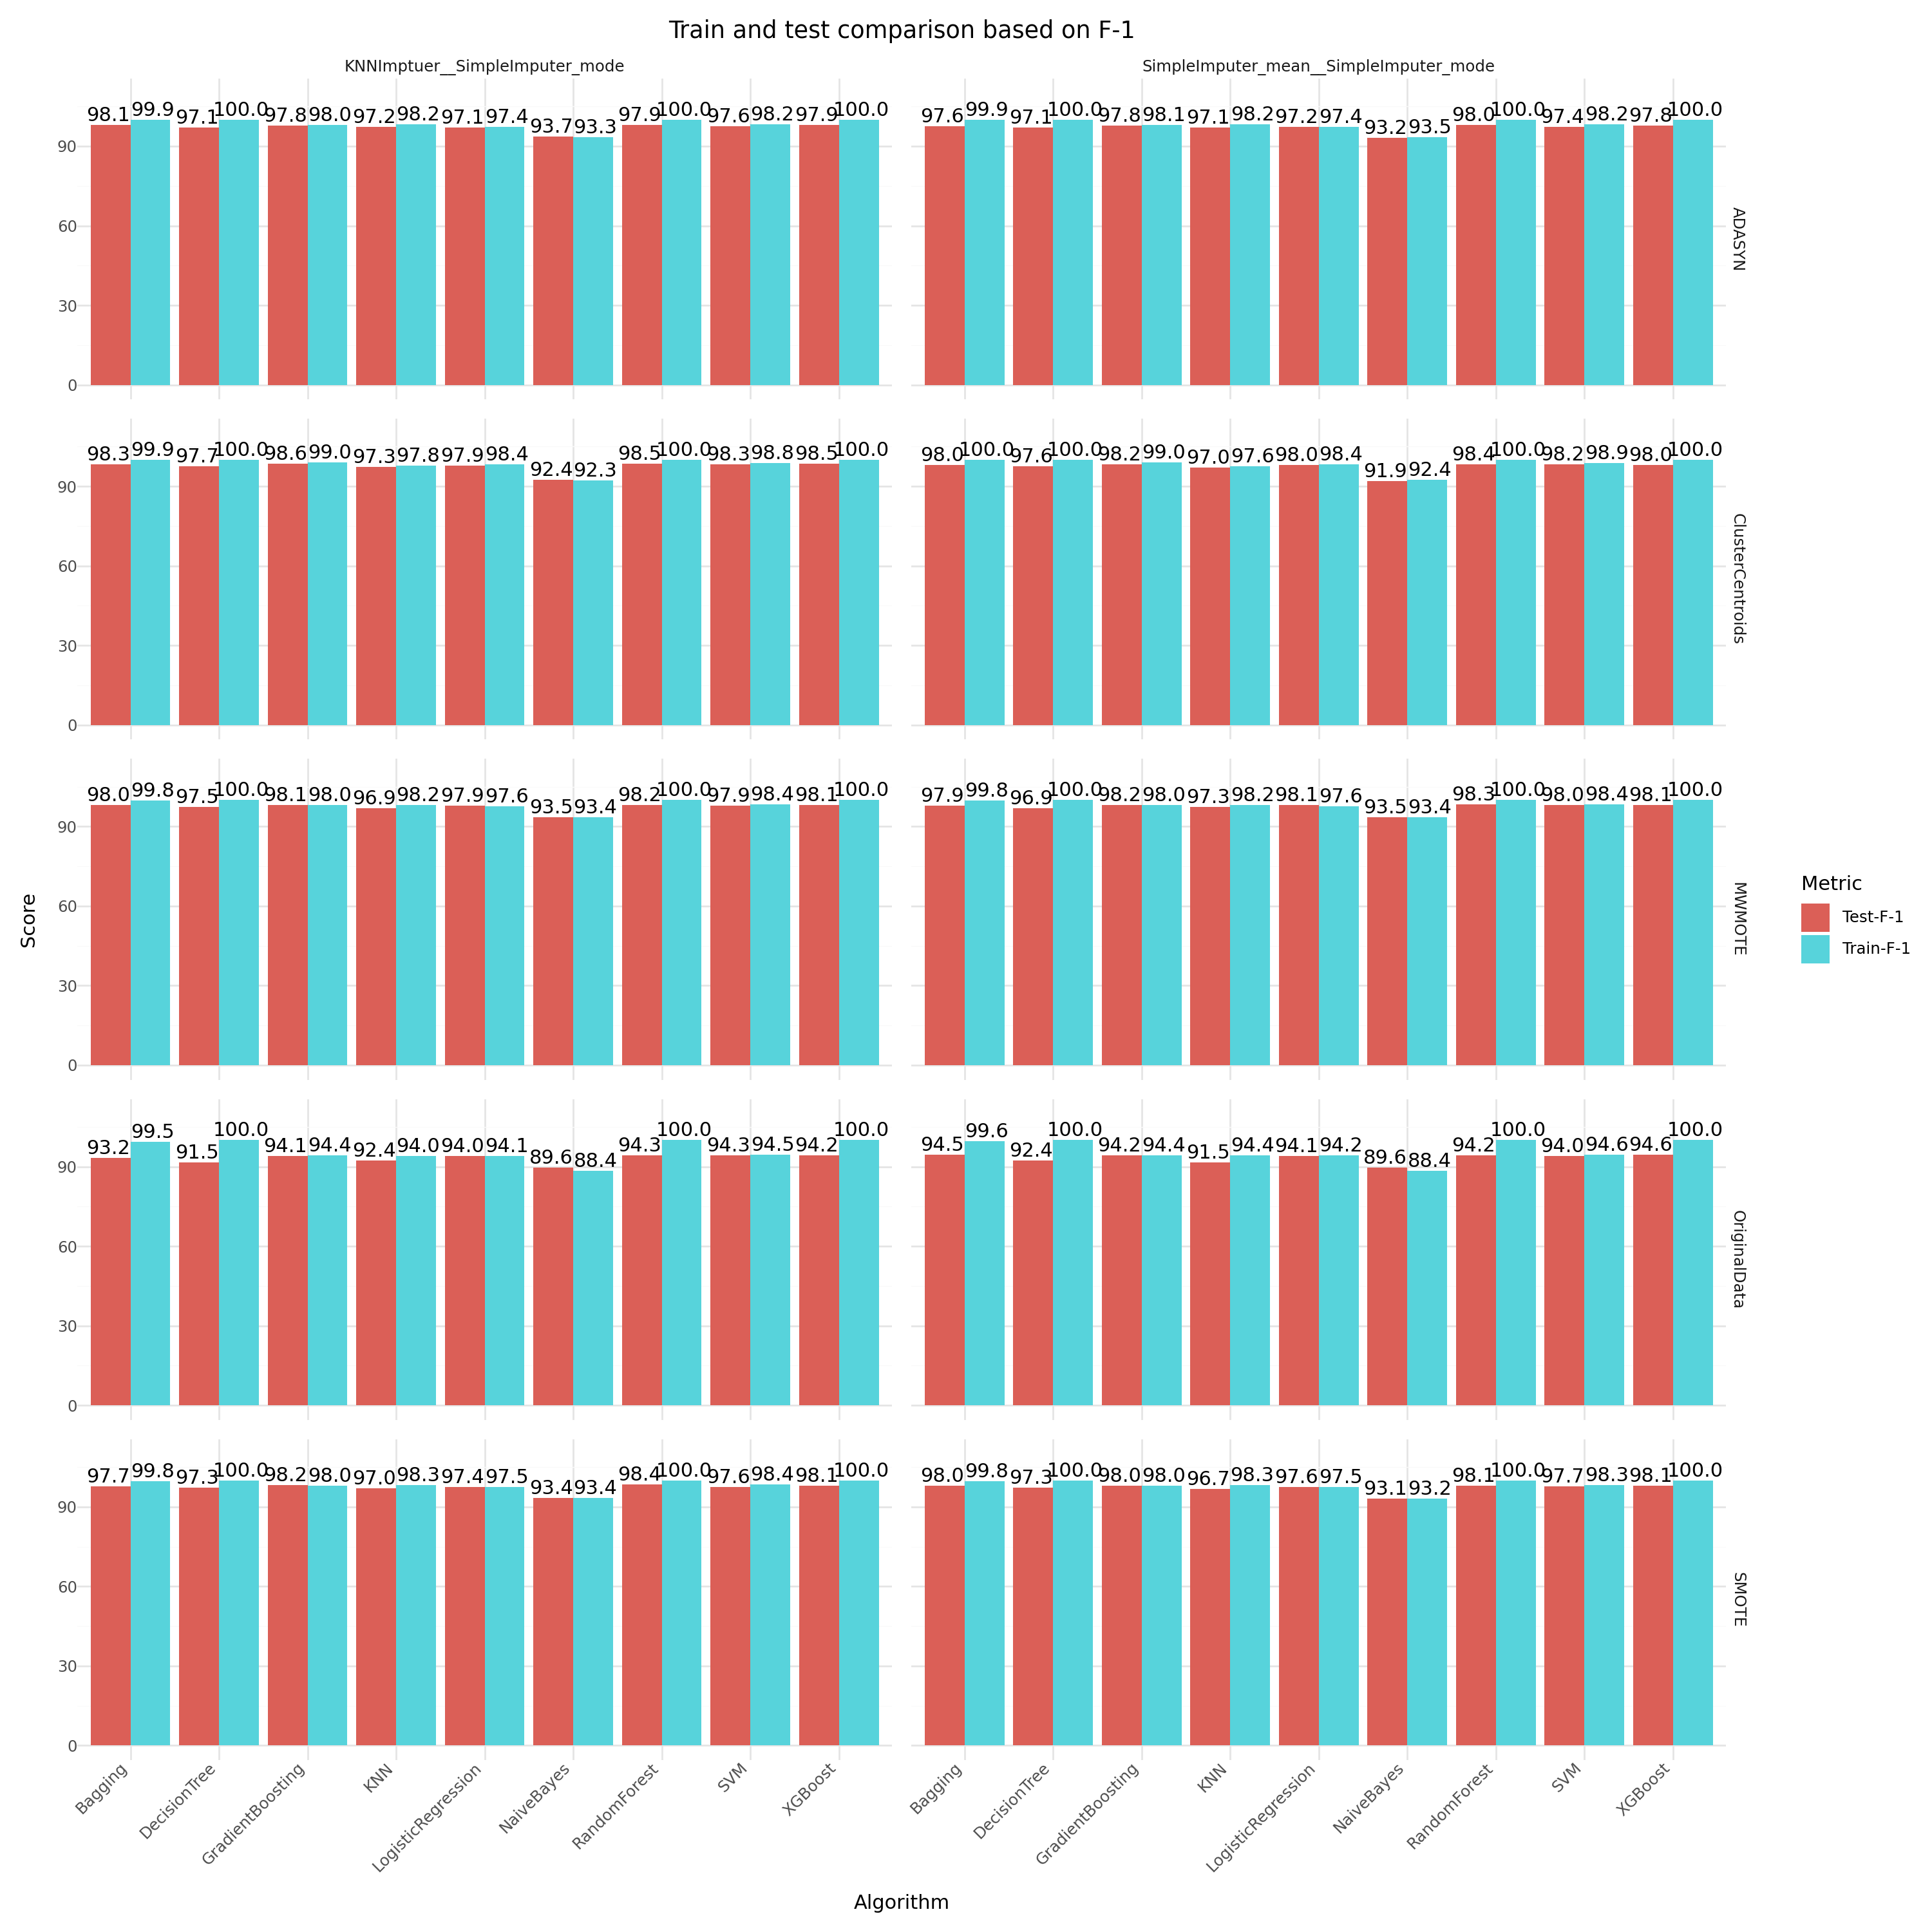

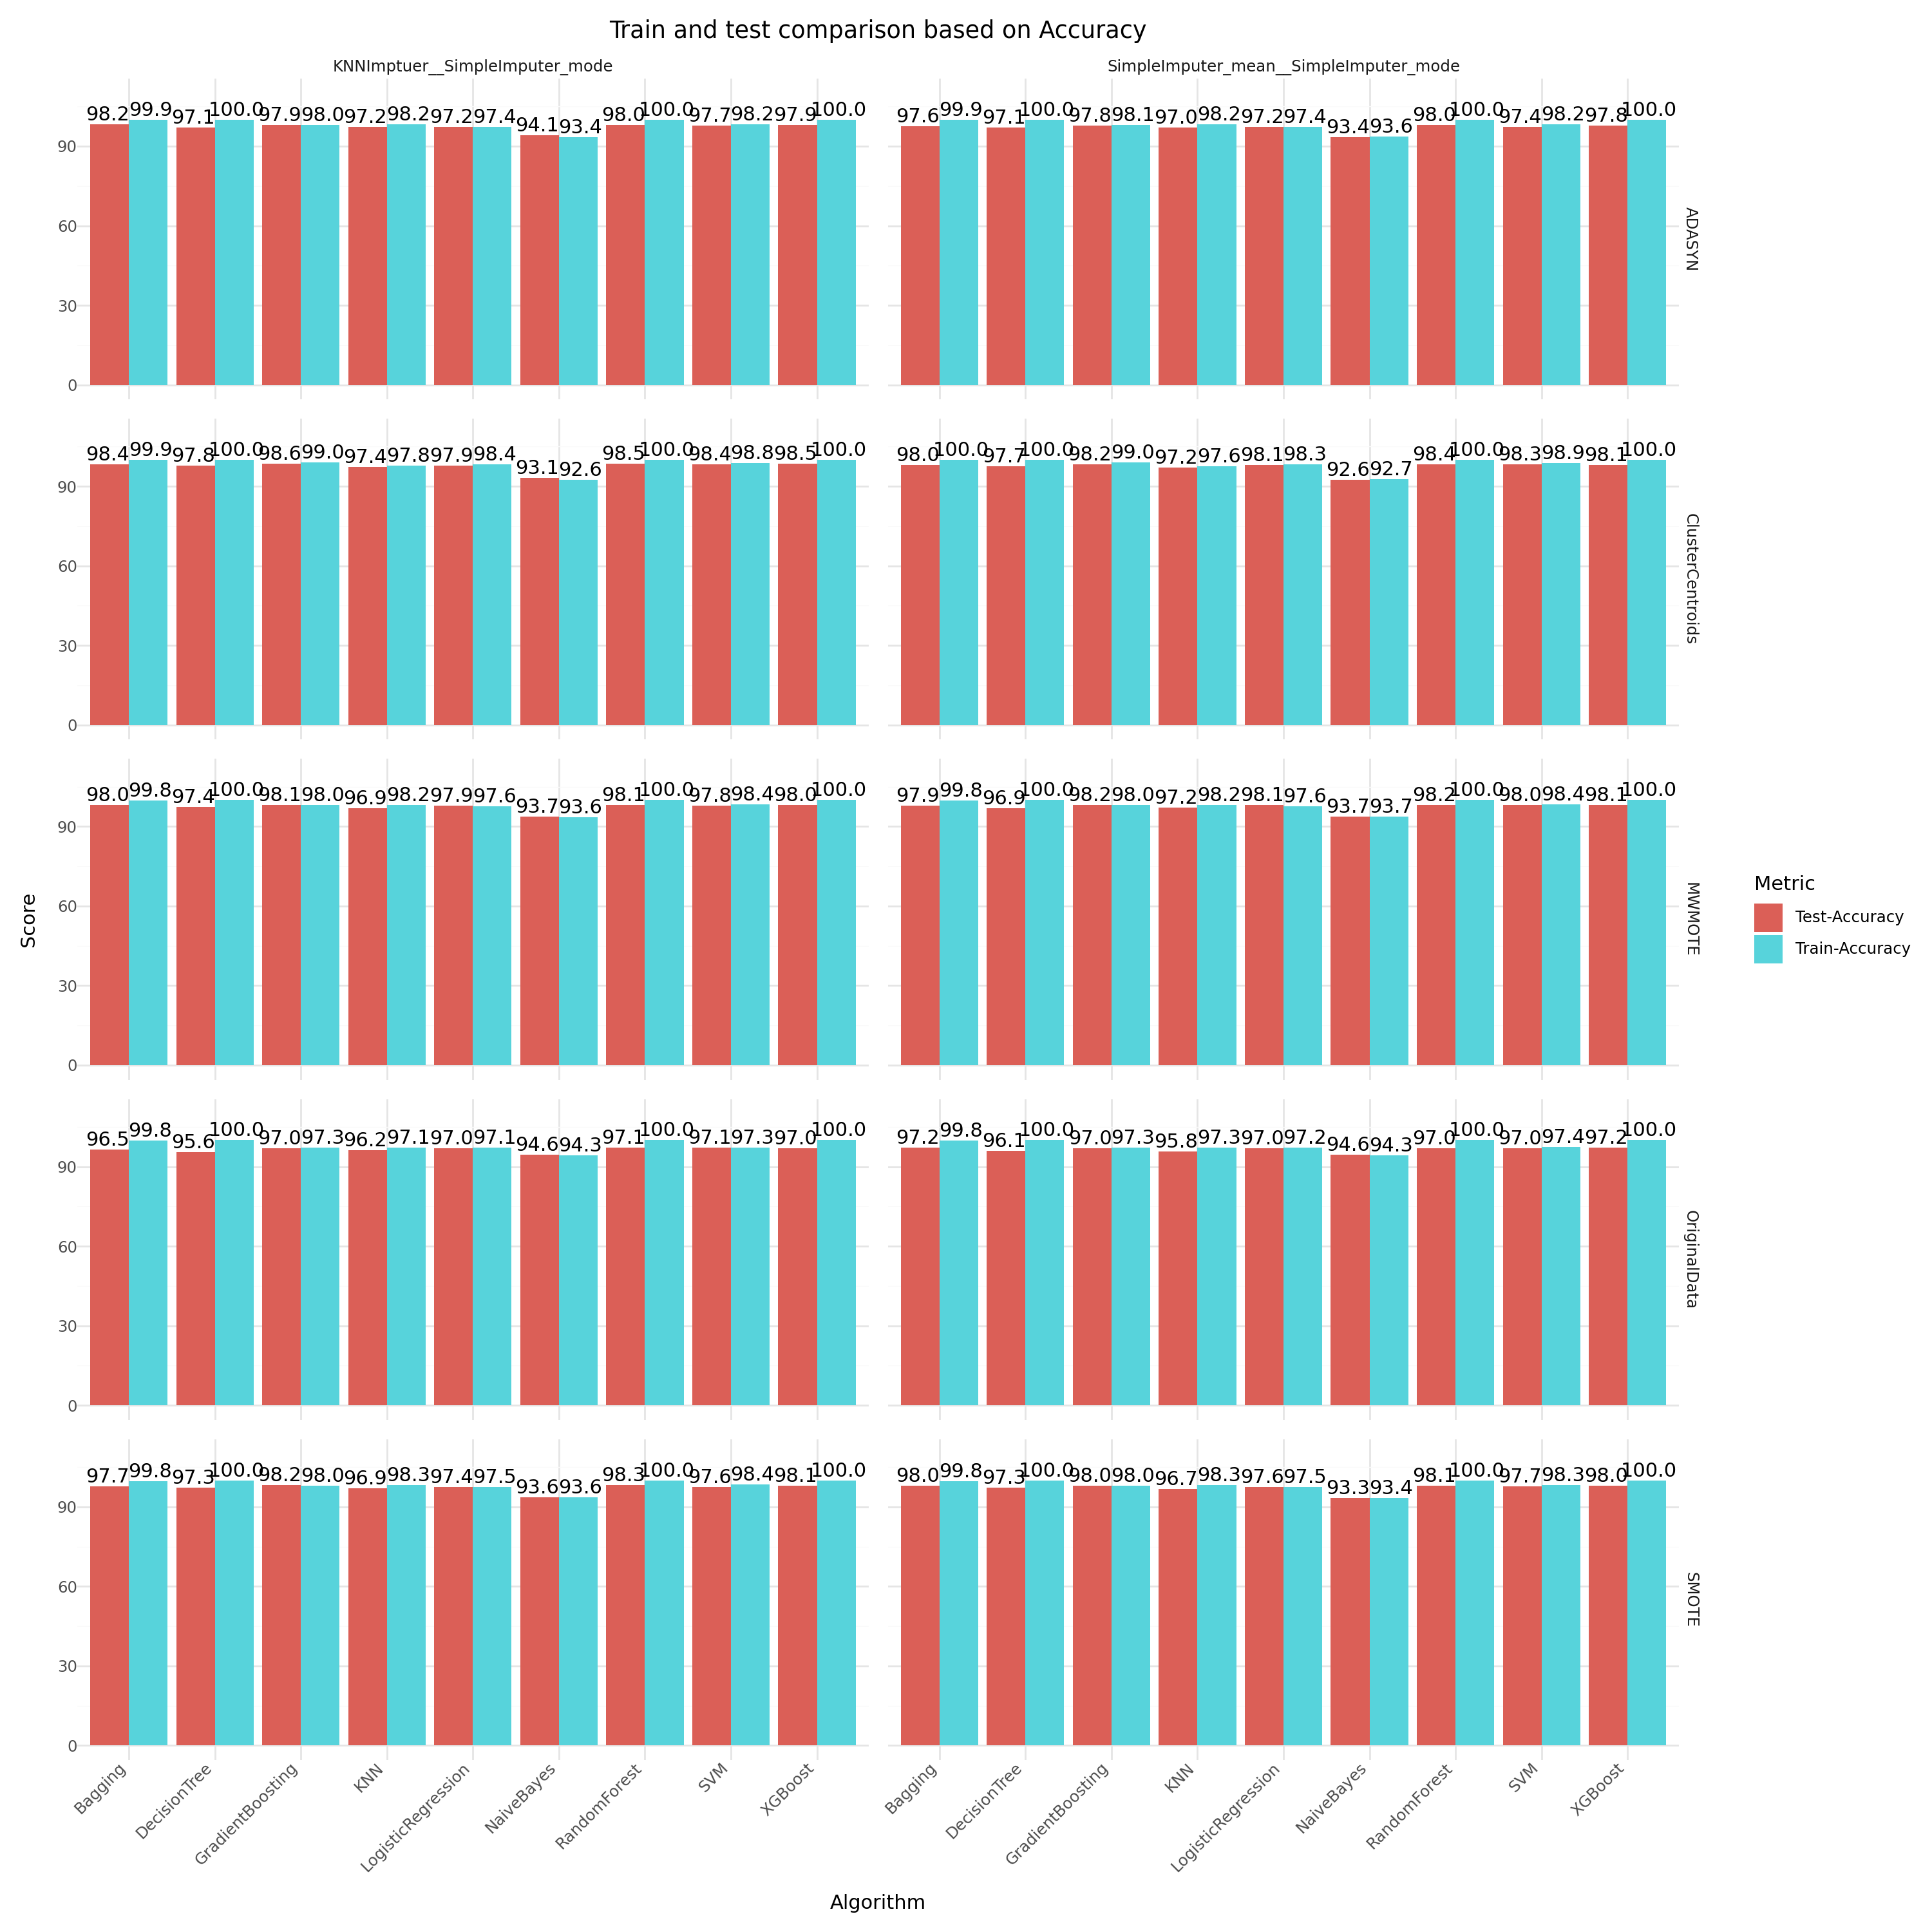

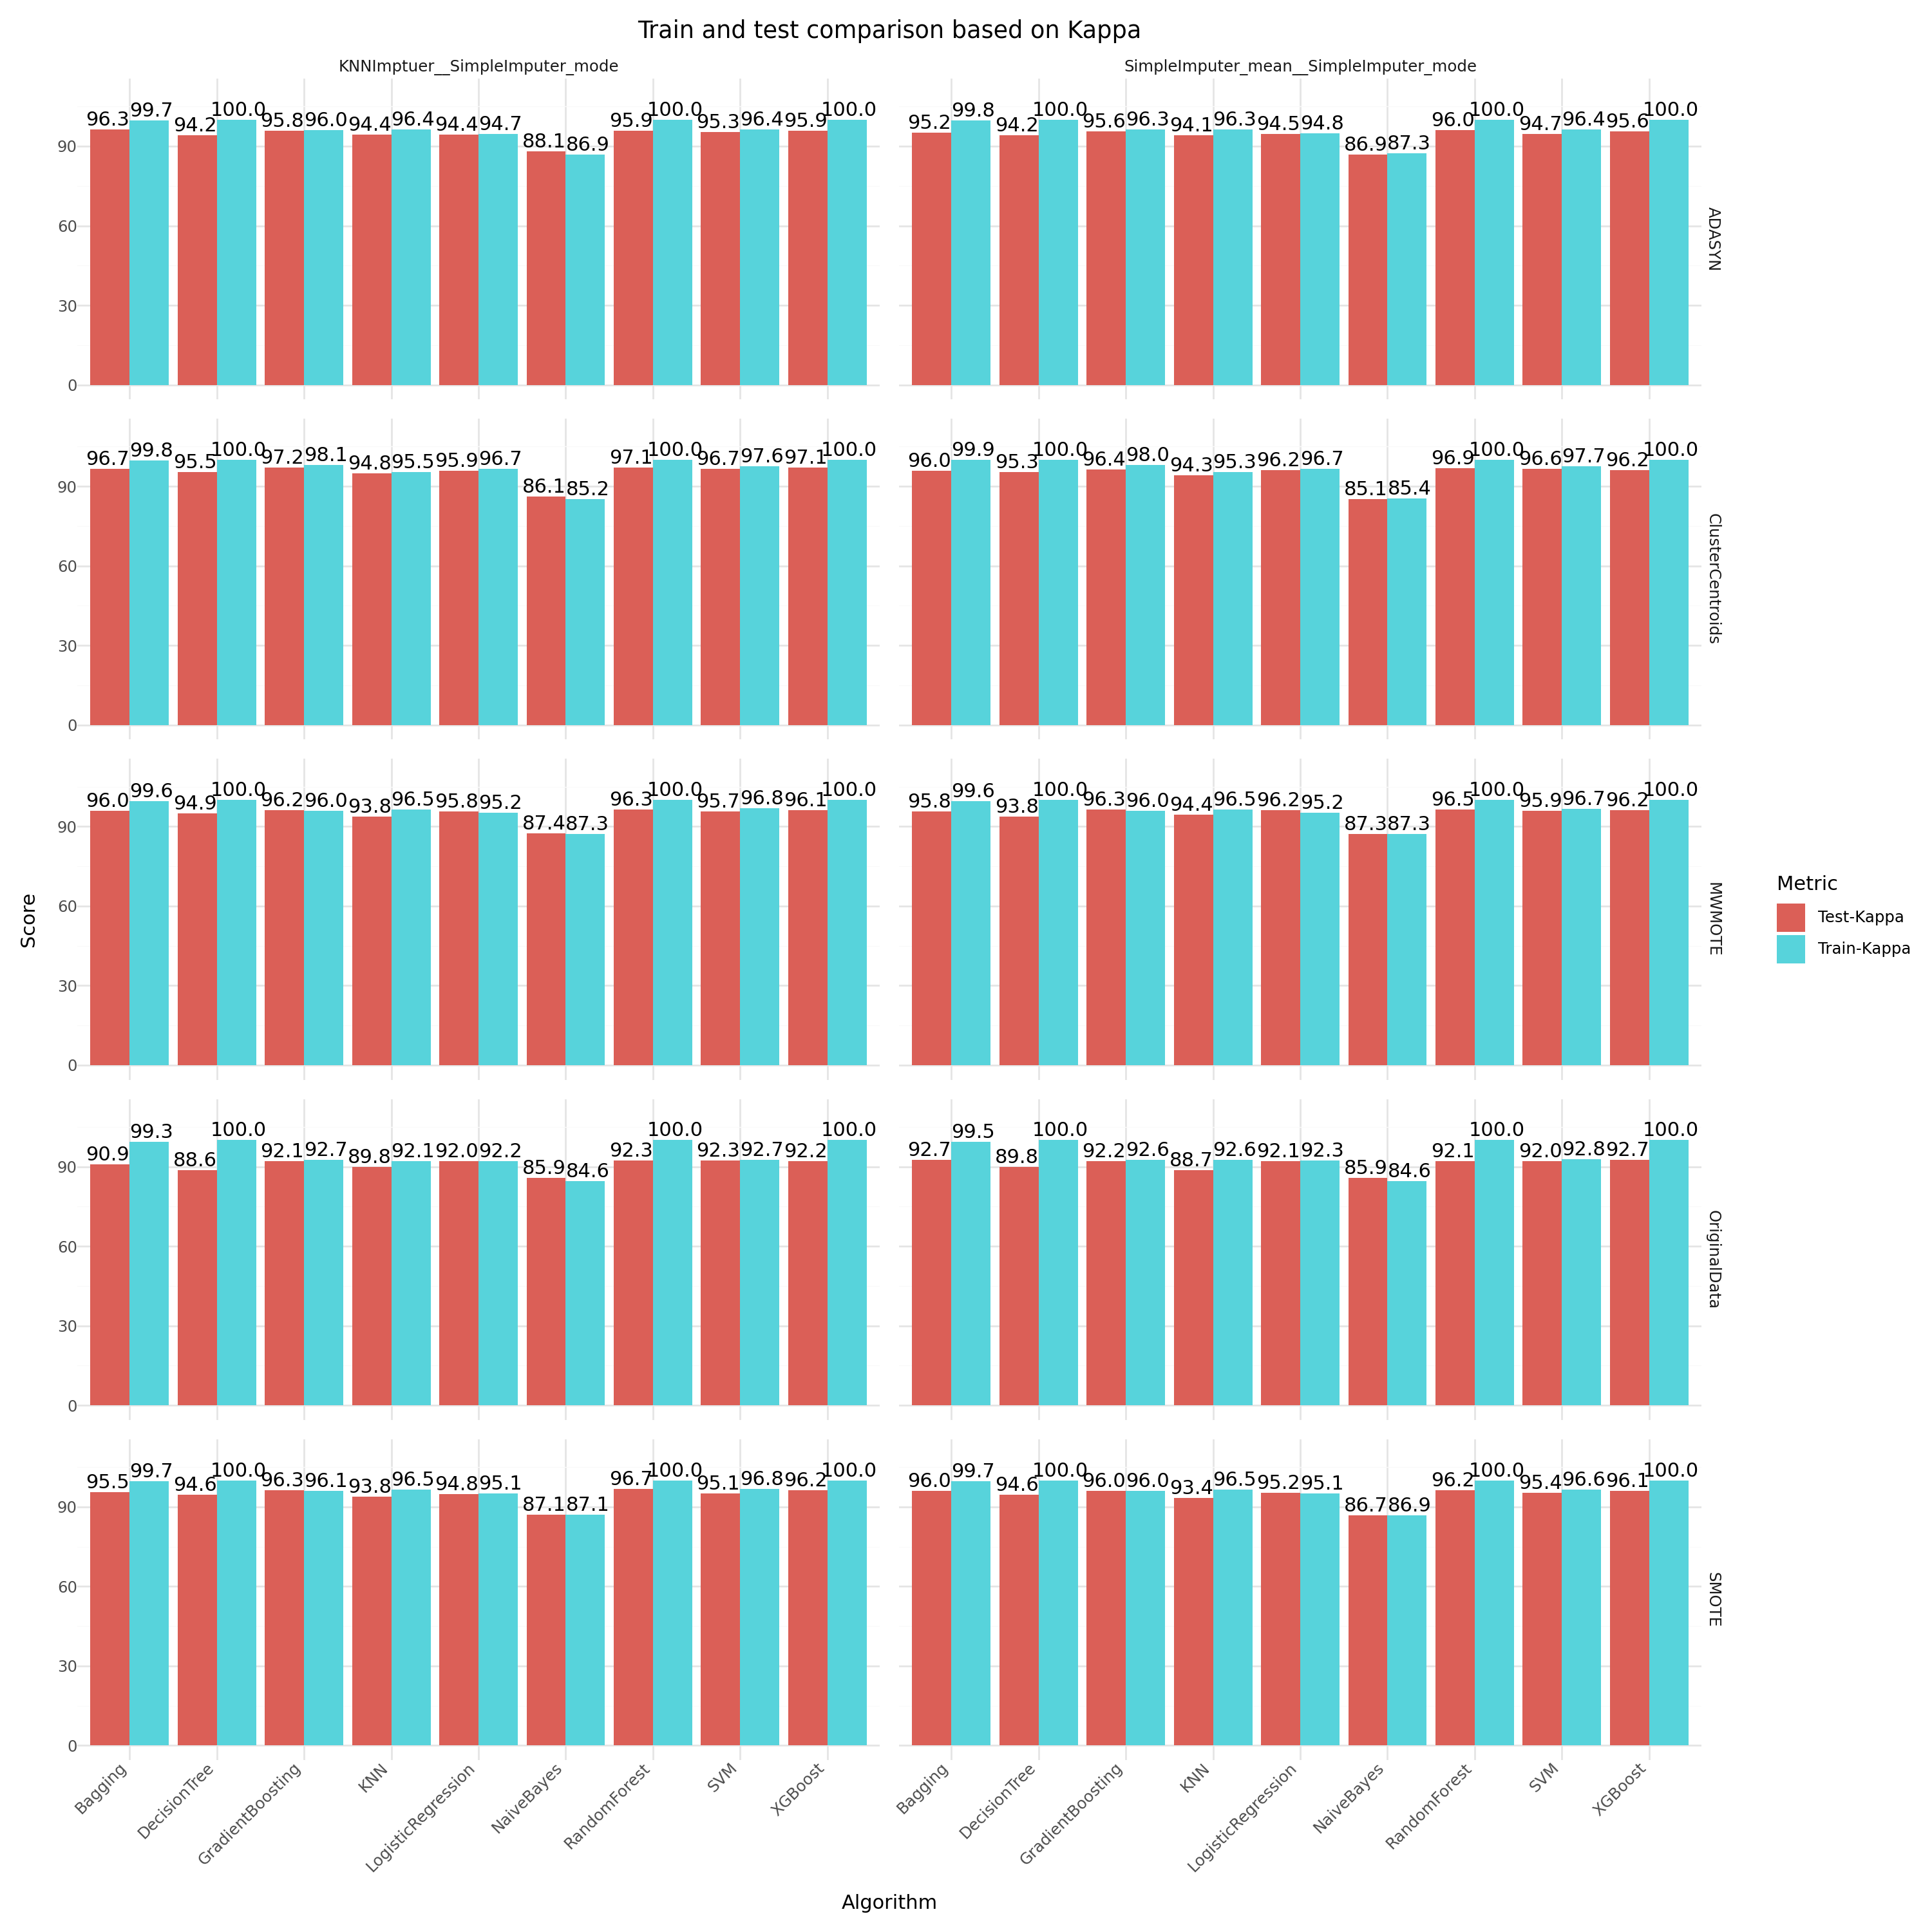

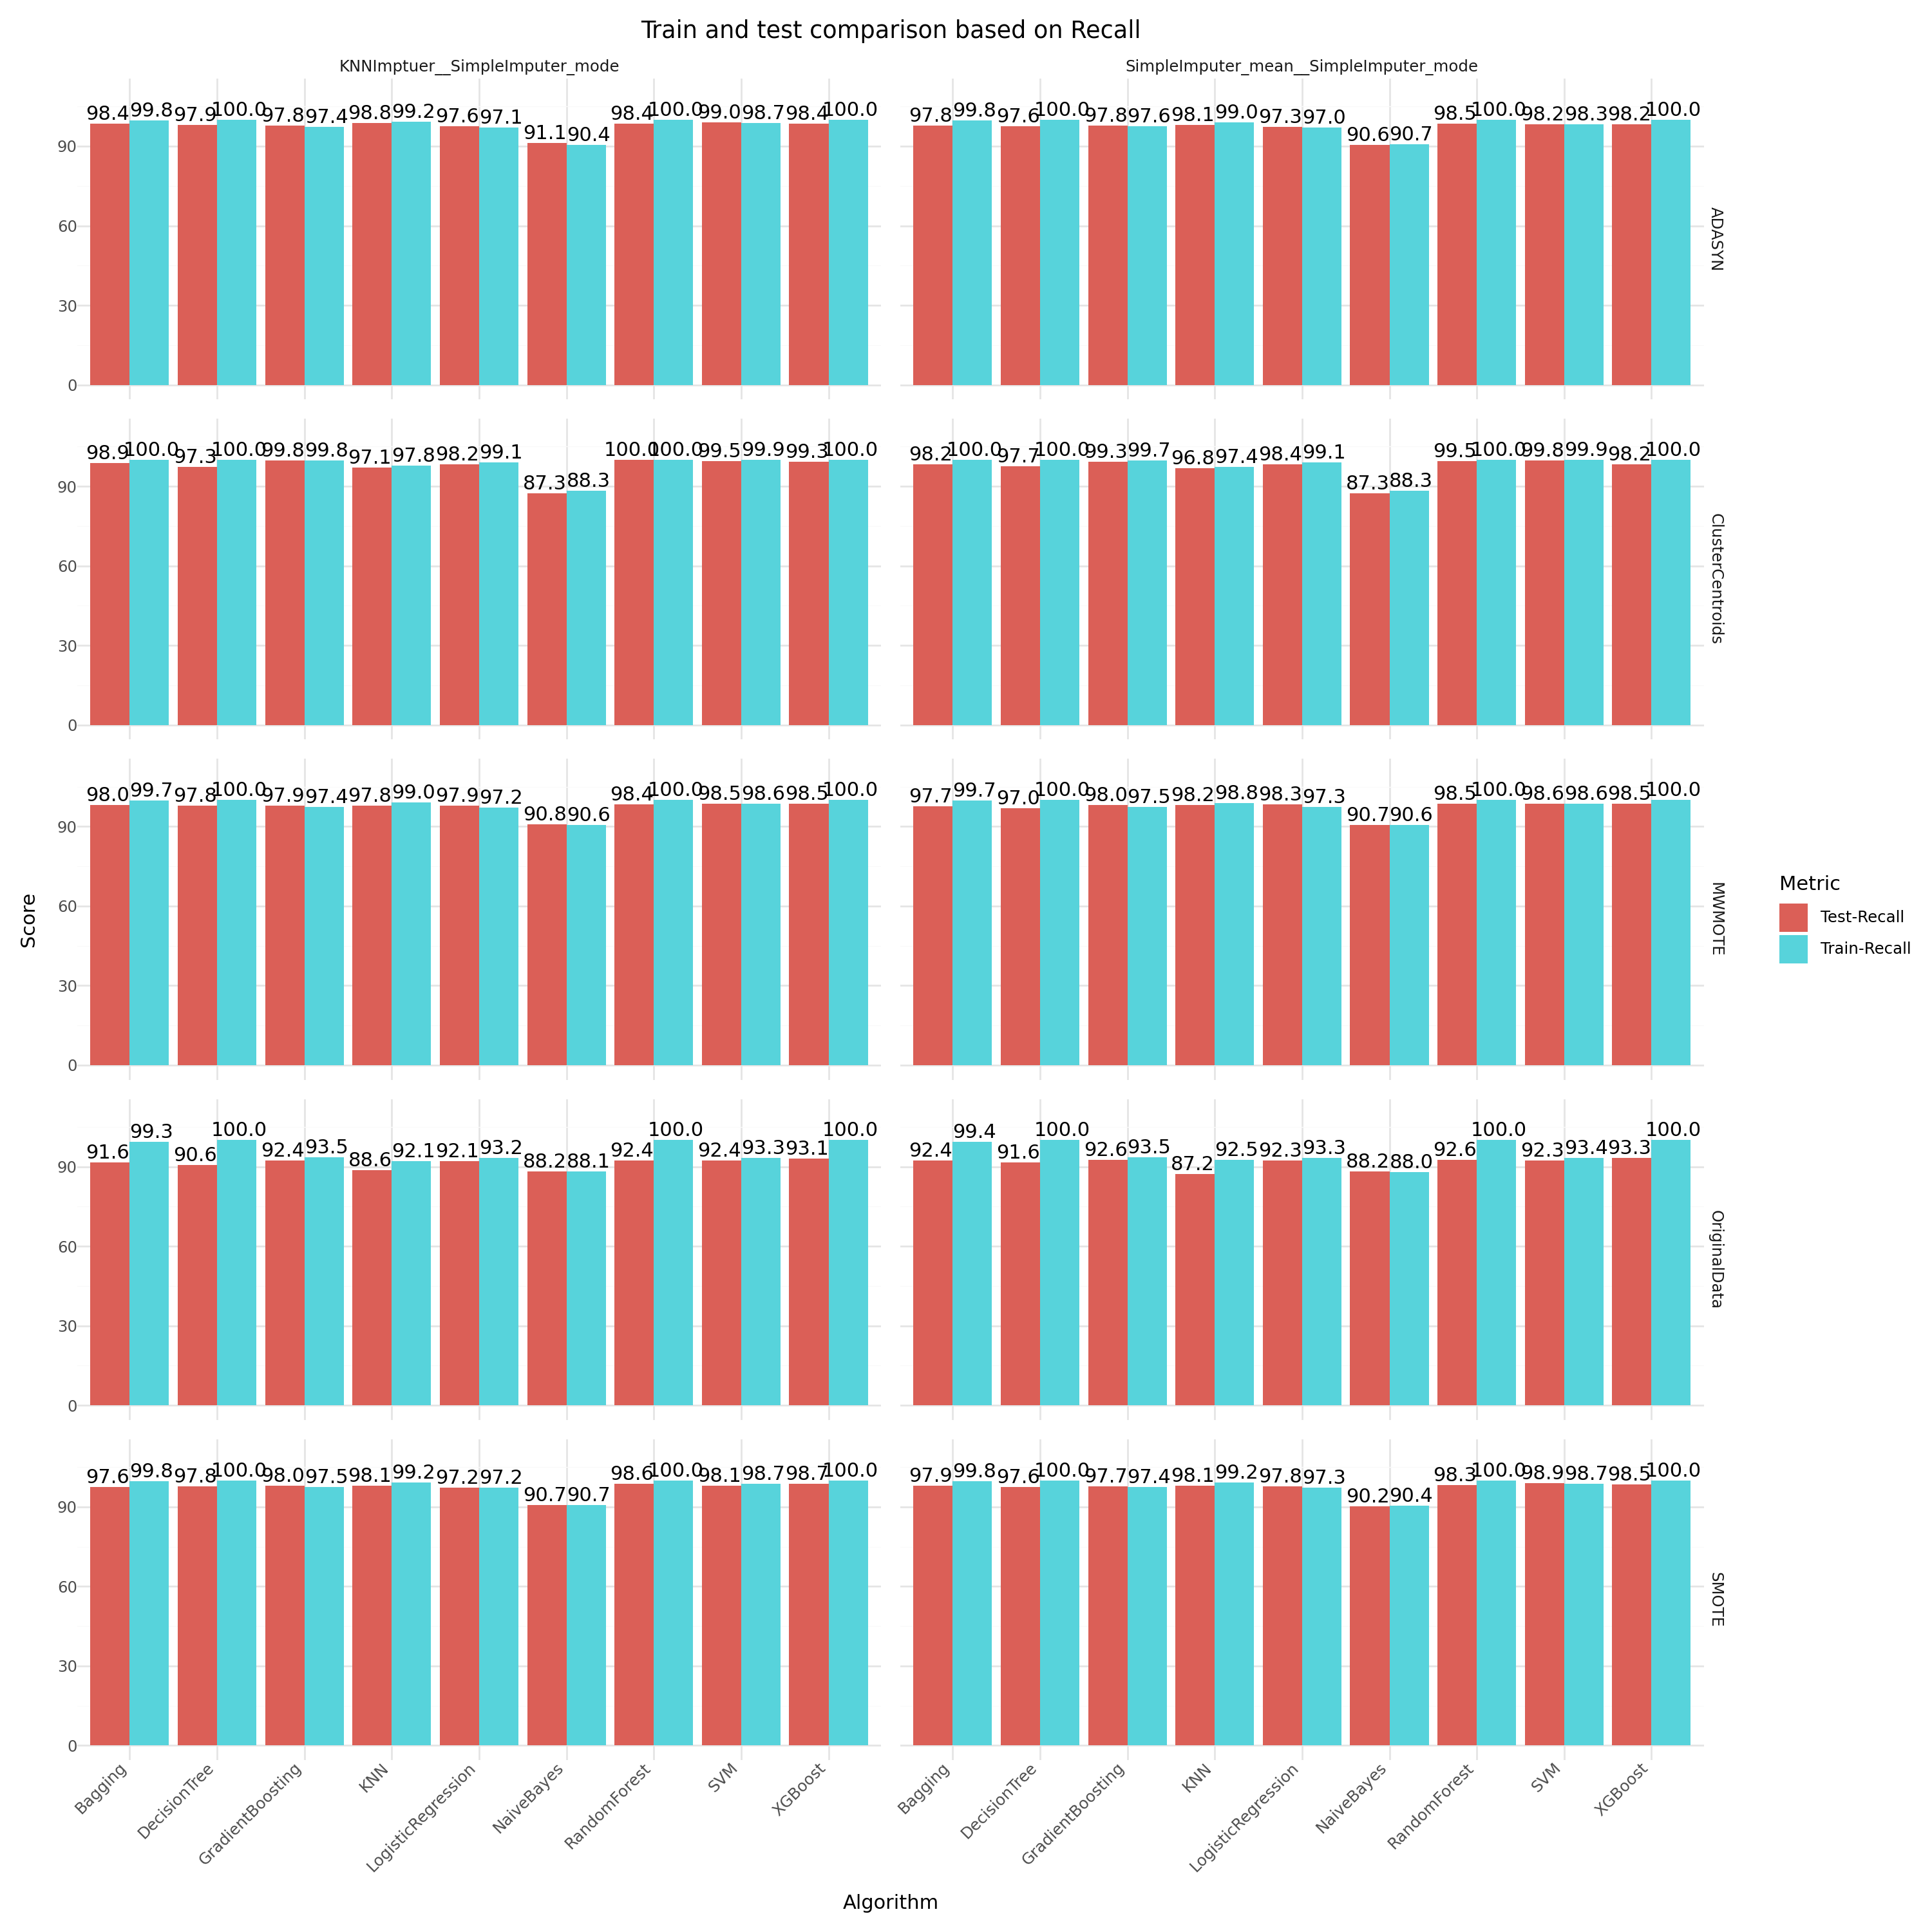

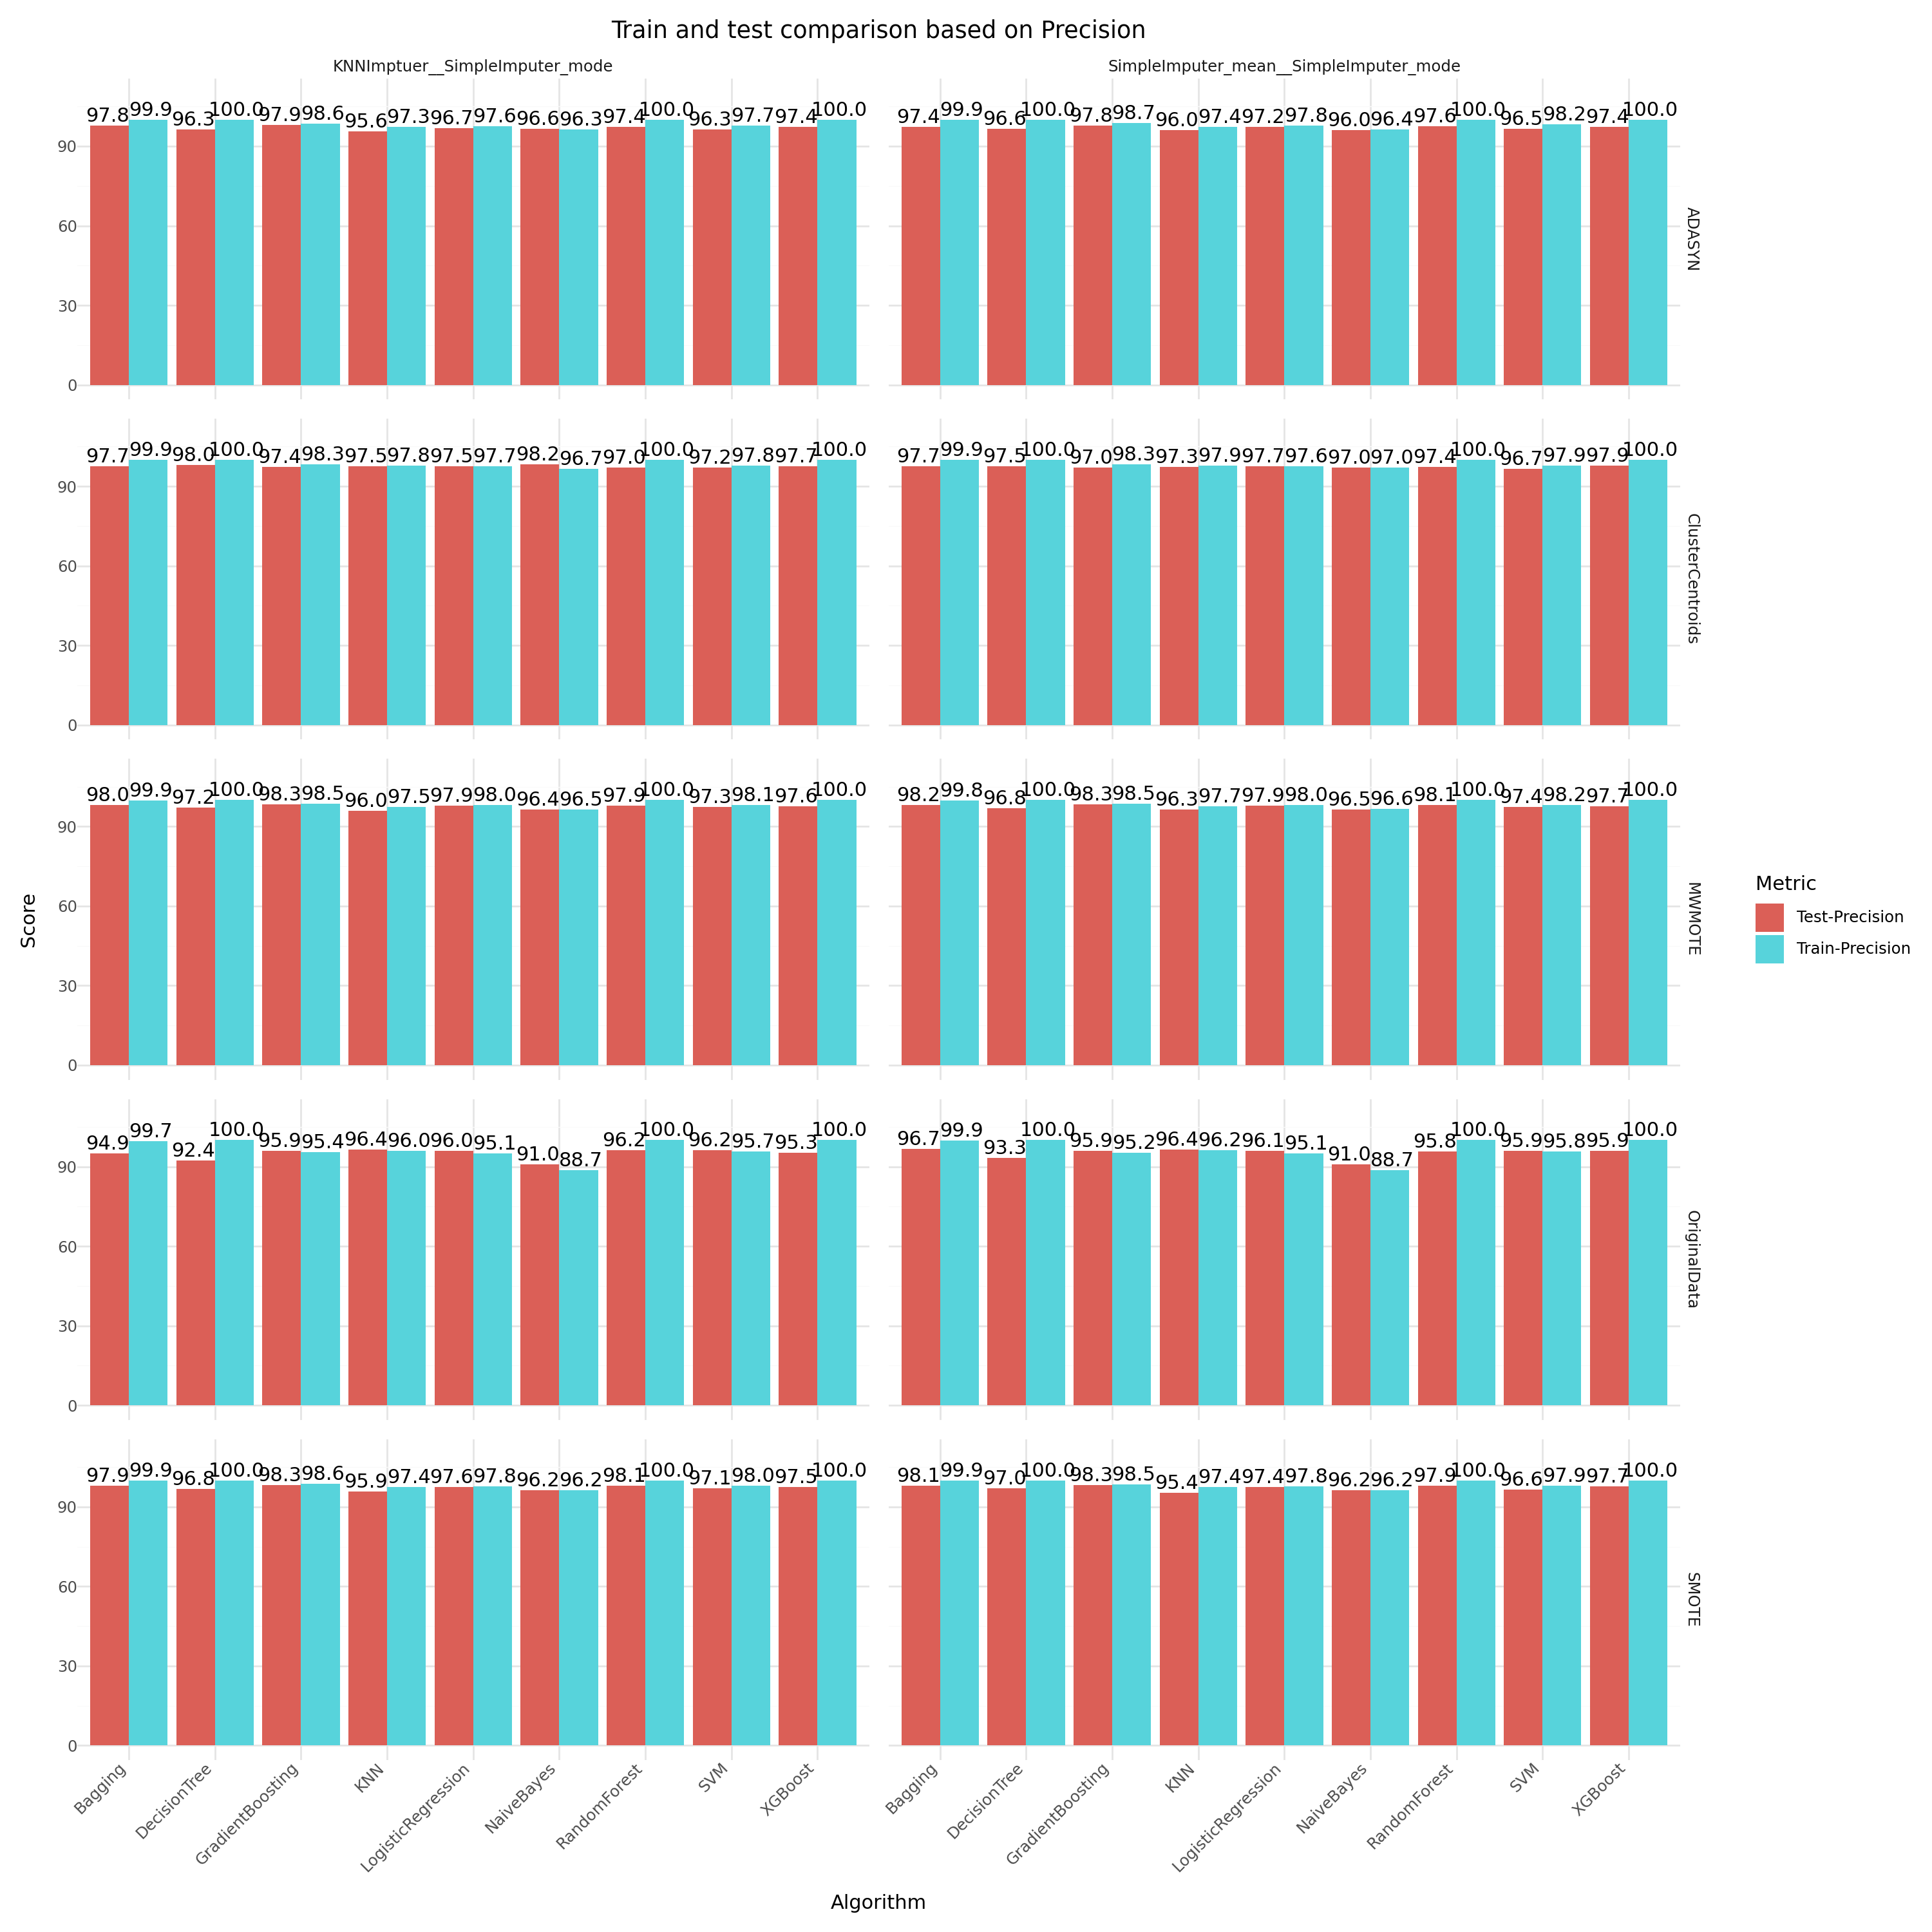

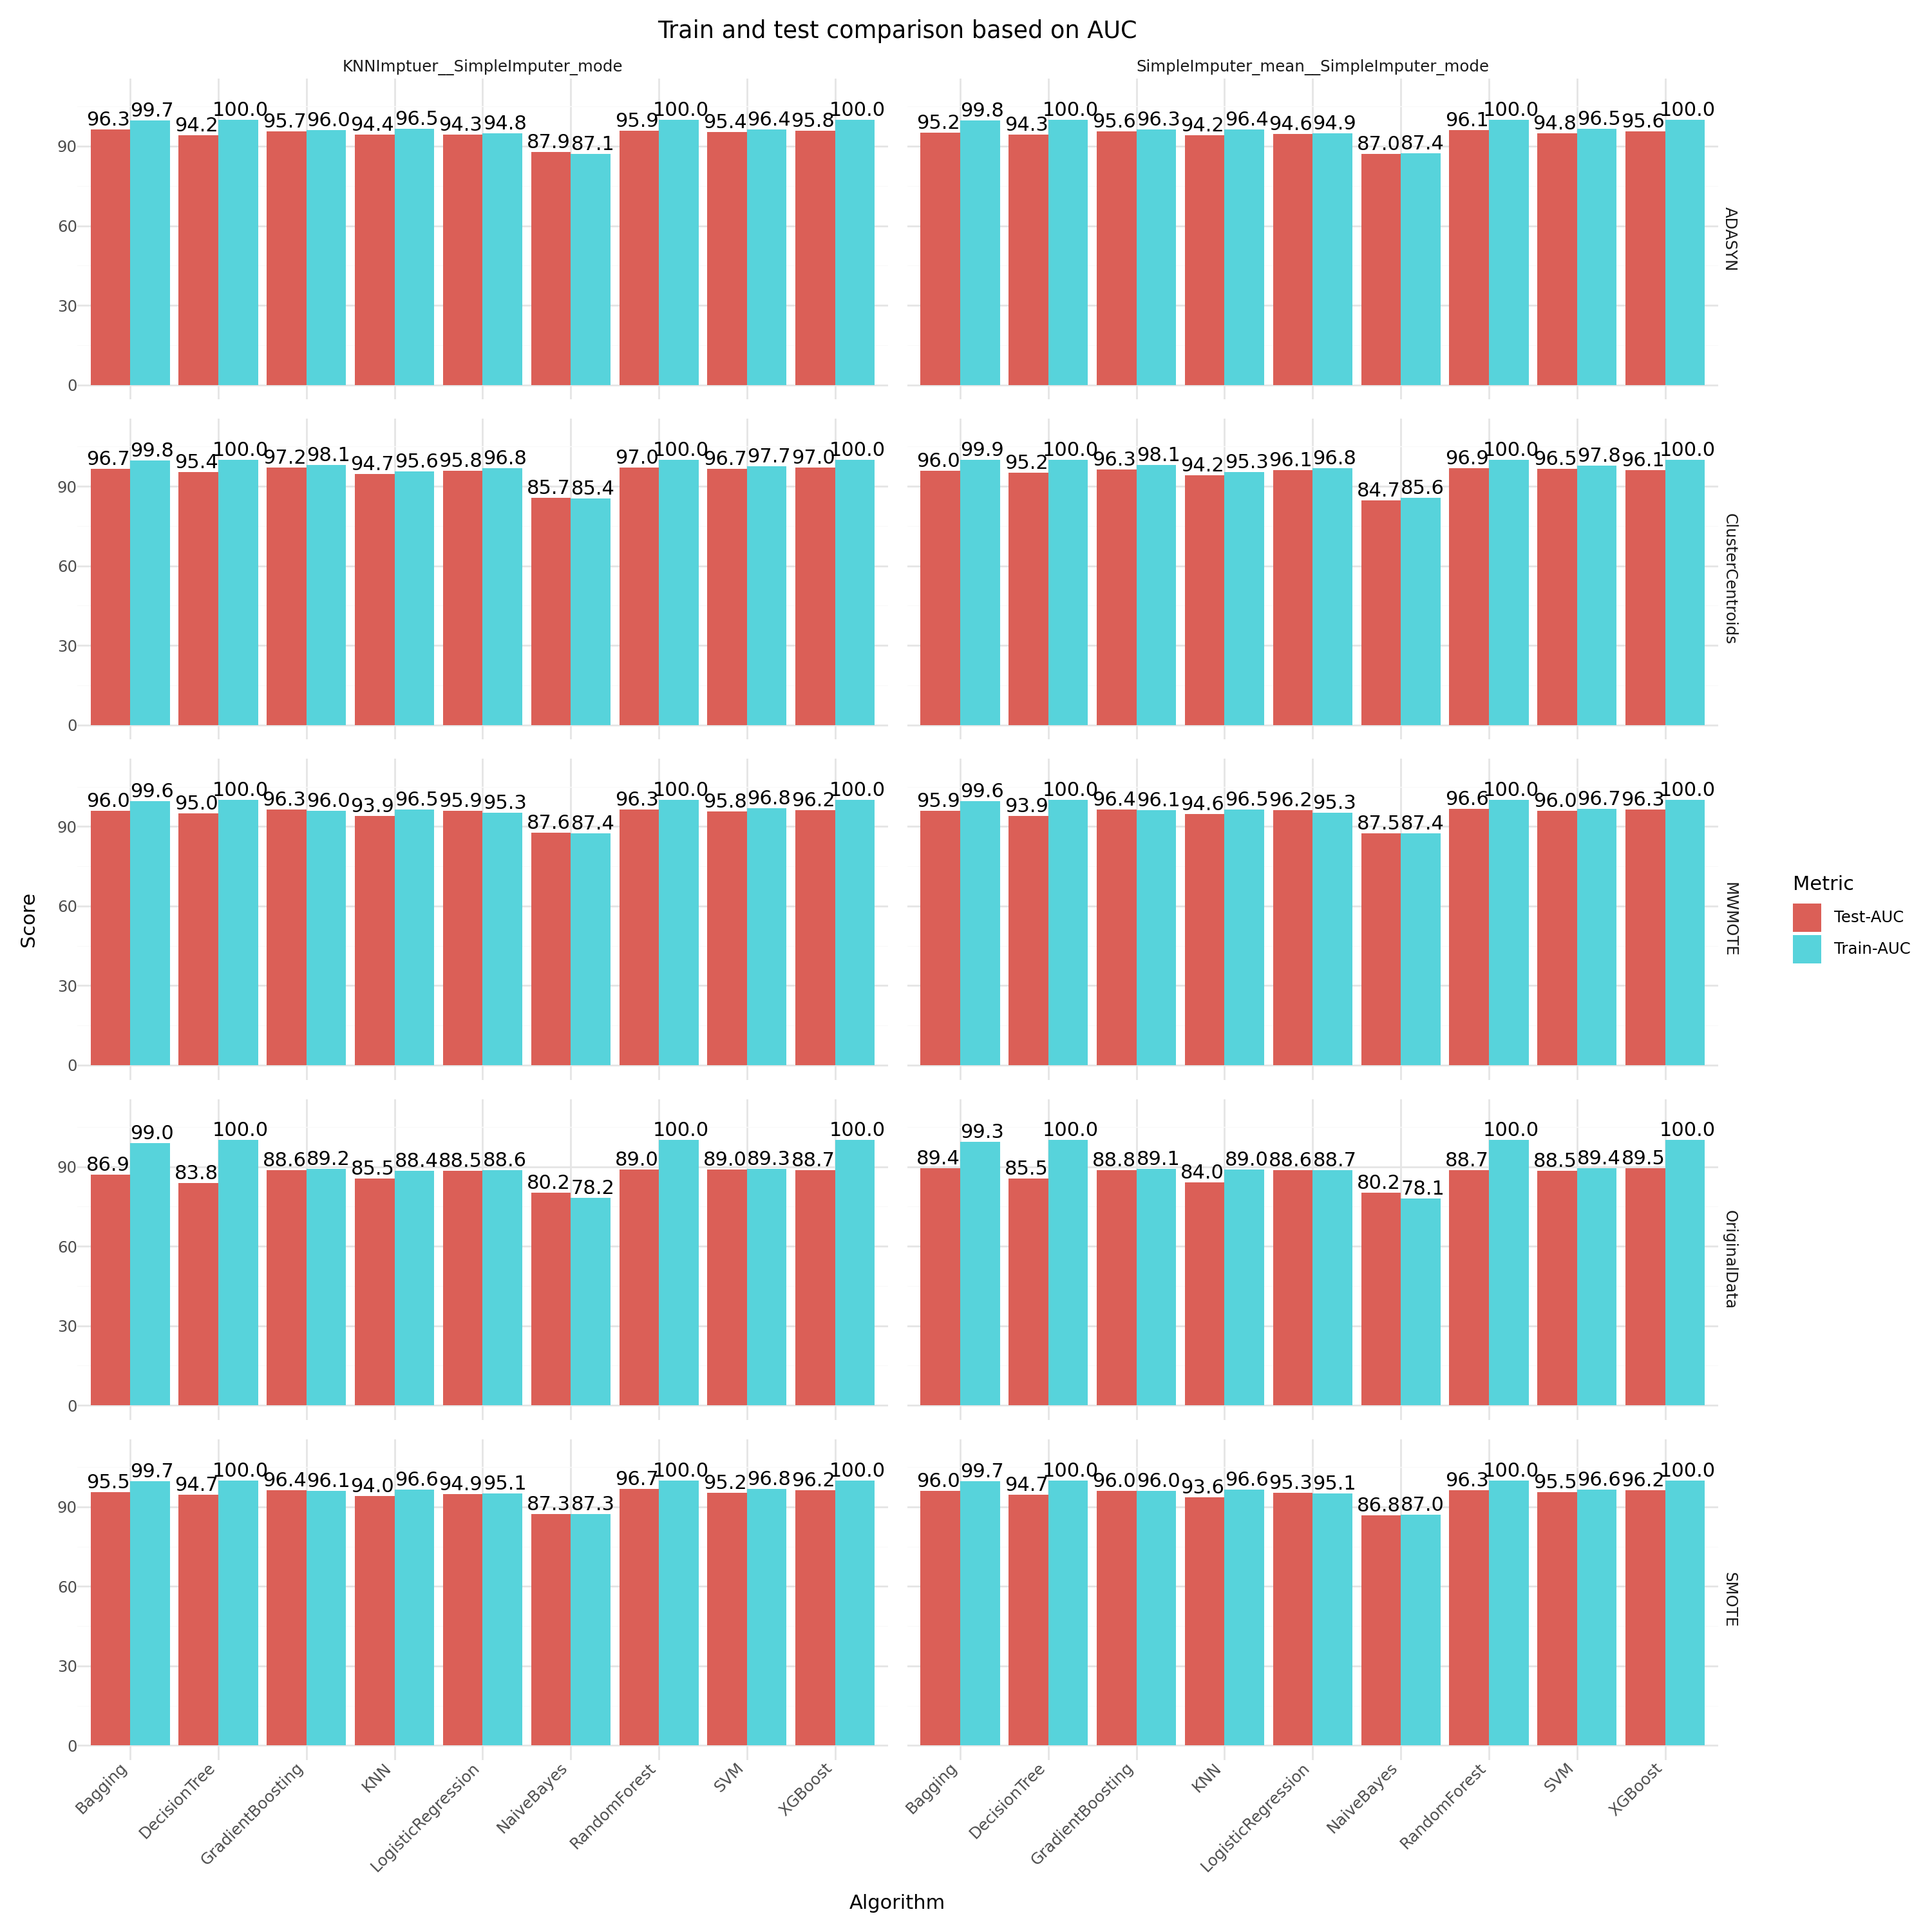

In [48]:
# the side by side comparison of algorithms, for each metric, with combination of different imputing technique and balancing approach
plot_for_each_performance_metric(df)

In [49]:
# # side by side best models

# df_test = df[df['Set'] == 'Test']
# df_train = df[df['Set'] == 'Train']
# def get_max_score(group):
#     return 
# # 
# max_scores_test = df_test.groupby(["Algorithm","Metric"]).apply(get_max_score).reset_index(drop=True)
# max_scores_train = df_train.groupby(['Algorithm','Metric']).apply(get_max_score).reset_index(drop=True)

In [59]:
def plot_max_score(df,set_='Test'):


    get_max_score = lambda group: group.loc[group['Score'].idxmax()]

    df_set = df[df['Set'] == set_]
    max_scores = df_set.groupby(['Algorithm','Metric']).apply(get_max_score).reset_index(drop=True)

    return max_scores
    

    

    

In [60]:
# the max train score grouped by algorithms and evaluation metric

plot_max_score(df,set_='Train')

Algorithm                                 Imputer  \
0              Bagging  SimpleImputer_mean__SimpleImputer_mode   
1              Bagging  SimpleImputer_mean__SimpleImputer_mode   
2              Bagging  SimpleImputer_mean__SimpleImputer_mode   
3              Bagging  SimpleImputer_mean__SimpleImputer_mode   
4              Bagging  SimpleImputer_mean__SimpleImputer_mode   
5              Bagging  SimpleImputer_mean__SimpleImputer_mode   
6         DecisionTree  SimpleImputer_mean__SimpleImputer_mode   
7         DecisionTree  SimpleImputer_mean__SimpleImputer_mode   
8         DecisionTree  SimpleImputer_mean__SimpleImputer_mode   
9         DecisionTree  SimpleImputer_mean__SimpleImputer_mode   
10        DecisionTree  SimpleImputer_mean__SimpleImputer_mode   
11        DecisionTree  SimpleImputer_mean__SimpleImputer_mode   
12    GradientBoosting          KNNImptuer__SimpleImputer_mode   
13    GradientBoosting          KNNImptuer__SimpleImputer_mode   
14    GradientBoosting          KNNImptuer__SimpleImputer_mode   
15    GradientBoosting          KNNImptuer__SimpleImputer_mode   
16    GradientBoosting  SimpleImputer_mean__SimpleImputer_mode   
17    GradientBoosting          KNNImptuer__SimpleImputer_mode   
18                 KNN          KNNImptuer__SimpleImputer_mode   
19                 KNN          KNNImptuer__SimpleImputer_mode   
20                 KNN          KNNImptuer__SimpleImputer_mode   
21                 KNN          KNNImptuer__SimpleImputer_mode   
22                 KNN  SimpleImputer_mean__SimpleImputer_mode   
23                 KNN  SimpleImputer_mean__SimpleImputer_mode   
24  LogisticRegression          KNNImptuer__SimpleImputer_mode   
25  LogisticRegression          KNNImptuer__SimpleImputer_mode   
26  LogisticRegression          KNNImptuer__SimpleImputer_mode   
27  LogisticRegression          KNNImptuer__SimpleImputer_mode   
28  LogisticRegression          KNNImptuer__SimpleImputer_mode   
29  LogisticRegression  SimpleImputer_mean__SimpleImputer_mode   
30          NaiveBayes  SimpleImputer_mean__SimpleImputer_mode   
31          NaiveBayes          KNNImptuer__SimpleImputer_mode   
32          NaiveBayes  SimpleImputer_mean__SimpleImputer_mode   
33          NaiveBayes  SimpleImputer_mean__SimpleImputer_mode   
34          NaiveBayes  SimpleImputer_mean__SimpleImputer_mode   
35          NaiveBayes  SimpleImputer_mean__SimpleImputer_mode   
36        RandomForest  SimpleImputer_mean__SimpleImputer_mode   
37        RandomForest  SimpleImputer_mean__SimpleImputer_mode   
38        RandomForest  SimpleImputer_mean__SimpleImputer_mode   
39        RandomForest  SimpleImputer_mean__SimpleImputer_mode   
40        RandomForest  SimpleImputer_mean__SimpleImputer_mode   
41        RandomForest  SimpleImputer_mean__SimpleImputer_mode   
42                 SVM  SimpleImputer_mean__SimpleImputer_mode   
43                 SVM  SimpleImputer_mean__SimpleImputer_mode   
44                 SVM  SimpleImputer_mean__SimpleImputer_mode   
45                 SVM  SimpleImputer_mean__SimpleImputer_mode   
46                 SVM  SimpleImputer_mean__SimpleImputer_mode   
47                 SVM  SimpleImputer_mean__SimpleImputer_mode   
48             XGBoost  SimpleImputer_mean__SimpleImputer_mode   
49             XGBoost  SimpleImputer_mean__SimpleImputer_mode   
50             XGBoost  SimpleImputer_mean__SimpleImputer_mode   
51             XGBoost  SimpleImputer_mean__SimpleImputer_mode   
52             XGBoost  SimpleImputer_mean__SimpleImputer_mode   
53             XGBoost  SimpleImputer_mean__SimpleImputer_mode   

           Imbalance           Metric   Score    Set MainMetric  
0   ClusterCentroids        Train-AUC   99.91  Train        AUC  
1   ClusterCentroids   Train-Accuracy   99.96  Train   Accuracy  
2   ClusterCentroids        Train-F-1   99.96  Train        F-1  
3   ClusterCentroids      Train-Kappa   99.91  Train      Kappa  
4             ADASYN  Train-Precision   99.93  Train

In [62]:
from sklearn.metrics import auc

In [63]:
# the max test score grouped by algorithms and evaluation metric
test_performance = plot_max_score(df).sort_values(["MainMetric","Score"])
auc_result = test_performance[test_performance['MainMetric'] == 'AUC']

In [84]:
auc_result.reset_index(drop=True,inplace=True)
hyper_dict = auc_result[['Algorithm','Imputer','Imbalance']].to_dict()
hyper_dict = {key:list(value.values()) for key,value in hyper_dict.items()}

imputers = [im.split("__") for im in hyper_dict['Imputer']]
hyper_dict['ImputerCat'] = [im[1] for im in imputers]
hyper_dict['ImputerNum'] = [im[0] for im in imputers]
hyper_dict.pop("Imputer")

['KNNImptuer__SimpleImputer_mode',
 'KNNImptuer__SimpleImputer_mode',
 'KNNImptuer__SimpleImputer_mode',
 'SimpleImputer_mean__SimpleImputer_mode',
 'KNNImptuer__SimpleImputer_mode',
 'KNNImptuer__SimpleImputer_mode',
 'KNNImptuer__SimpleImputer_mode',
 'KNNImptuer__SimpleImputer_mode',
 'KNNImptuer__SimpleImputer_mode']

In [85]:
hyper_dict

{'Algorithm': ['NaiveBayes',
  'KNN',
  'DecisionTree',
  'LogisticRegression',
  'Bagging',
  'SVM',
  'XGBoost',
  'RandomForest',
  'GradientBoosting'],
 'Imbalance': ['ADASYN',
  'ClusterCentroids',
  'ClusterCentroids',
  'MWMOTE',
  'ClusterCentroids',
  'ClusterCentroids',
  'ClusterCentroids',
  'ClusterCentroids',
  'ClusterCentroids'],
 'ImputerCat': ['SimpleImputer_mode',
  'SimpleImputer_mode',
  'SimpleImputer_mode',
  'SimpleImputer_mode',
  'SimpleImputer_mode',
  'SimpleImputer_mode',
  'SimpleImputer_mode',
  'SimpleImputer_mode',
  'SimpleImputer_mode'],
 'ImputerNum': ['KNNImptuer',
  'KNNImptuer',
  'KNNImptuer',
  'SimpleImputer_mean',
  'KNNImptuer',
  'KNNImptuer',
  'KNNImptuer',
  'KNNImptuer',
  'KNNImptuer']}

In [80]:
imputers

[['KNNImptuer', 'SimpleImputer_mode'],
 ['KNNImptuer', 'SimpleImputer_mode'],
 ['KNNImptuer', 'SimpleImputer_mode'],
 ['SimpleImputer_mean', 'SimpleImputer_mode'],
 ['KNNImptuer', 'SimpleImputer_mode'],
 ['KNNImptuer', 'SimpleImputer_mode'],
 ['KNNImptuer', 'SimpleImputer_mode'],
 ['KNNImptuer', 'SimpleImputer_mode'],
 ['KNNImptuer', 'SimpleImputer_mode']]

In [2]:
# find the best model for each algorithm based on test results
algoritms = [DecisionTreeClassifier,KNeighborsClassifier,LogisticRegression,SVC]
balancers = [ClusterCentroids,SMOTE,SMOTE,SMOTE]
imputation = [['SimpleImputer_mean', SimpleImputer(),'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')],
             ['KNNImptuer',KNNImputer(),'SimpleImputer_mode',SimpleImputer(strategy='most_frequent')],
             ['KNNImptuer',KNNImputer(),'SimpleImputer_mode',SimpleImputer(strategy='most_frequent')],
             ['SimpleImputer_mean', SimpleImputer(),'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]]
data_path="../../data/initial_data/frmgham2_project_data.csv"

for algorithm, balanc, imputer in zip(algoritms,balancers,imputation):

    print(algorithm.__name__,balanc.__name__,imputer)

    best_model,best_params,output = find_best_model(algorithm=algorithm,
                                                   data_path=data_path,balancer=balanc,imputer=imputer)

    break

    
    

In [6]:
tree_best_model = joblib.load("../models/DecisionTreeClassifierbest_model.pkl")

with open("../results/DecisionTreeClassifier/DecisionTreeClassifierbest_model_params.json","r") as file:
    tree_best_params = json.load(file)
tree_best_model_performance = pd.read_csv("../results/DecisionTreeClassifier/DecisionTreeClassifierbest_model_perfomance.csv")

In [10]:
tree_best_model

DecisionTreeClassifier(criterion='log_loss', max_depth=8, max_features=15,
                       min_samples_leaf=7, min_samples_split=11)

In [11]:
tree_best_params

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 8,
 'max_features': 15,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 11,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [12]:
tree_best_model_performance

Algorithm         Imbalance          ImputerCat  \
0   DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
1   DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
2   DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
3   DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
4   DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
5   DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
6   DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
7   DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
8   DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
9   DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
10  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
11  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
12  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
13  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
14  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
15  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
16  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
17  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
18  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
19  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
20  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   
21  DecisionTreeClassifier  ClusterCentroids  SimpleImputer_mode   

            ImputerNum    Set               Metric    Score  
0   SimpleImputer_mean  Train             Accuracy    98.53  
1   SimpleImputer_mean  Train                  F-1    98.55  
2   SimpleImputer_mean  Train        True Negative  2260.00  
3   SimpleImputer_mean  Train       False Positive    39.00  
4   SimpleImputer_mean  Train       False Negative    29.00  
5   SimpleImputer_mean  Train        True Positive  2310.00  
6   SimpleImputer_mean  Train                Kappa    97.07  
7   SimpleImputer_mean  Train               Recall    98.76  
8   SimpleImputer_mean  Train            Precision    98.34  
9   SimpleImputer_mean  Train   False Postive Rate     0.02  
10  SimpleImputer_mean  Train  False Negative Rate     0.01  
11  SimpleImputer_mean   Test             Accuracy    98.10  
12  SimpleImputer_mean   Test                  F-1    98.04  
13  SimpleImputer_mean   Test        True Negative   588.00  
14  SimpleImputer_mean   Test       False Positive    12.00  
15  SimpleImputer_mean   Test       False Negative    10.00  
16  SimpleImputer_mean   Test        True Positive   550.00  
17  SimpleImputer_mean   Test                Kappa    96.20  
18  SimpleImputer_mean   Test               Recall    98.21  
19  SimpleImputer_mean   Test            Precision    97.86  
20  SimpleImputer_mean   Test   False Postive Rate     0.02  
21  SimpleImputer_mean   Test  False Negative Rate     0.02

## Draft

In [16]:
bar_plot = plt9.ggplot(bal_df, plt9.aes(x='Algorithm', y='Score', fill='Metrics')) + \
           plt9.facet_grid(rows='Imbalance',cols='Set') + \
           plt9.geom_col(position='dodge') + \
           plt9.theme_minimal() + \
           plt9.theme(figure_size=(15,15)) 
           # plt9.geom_text()




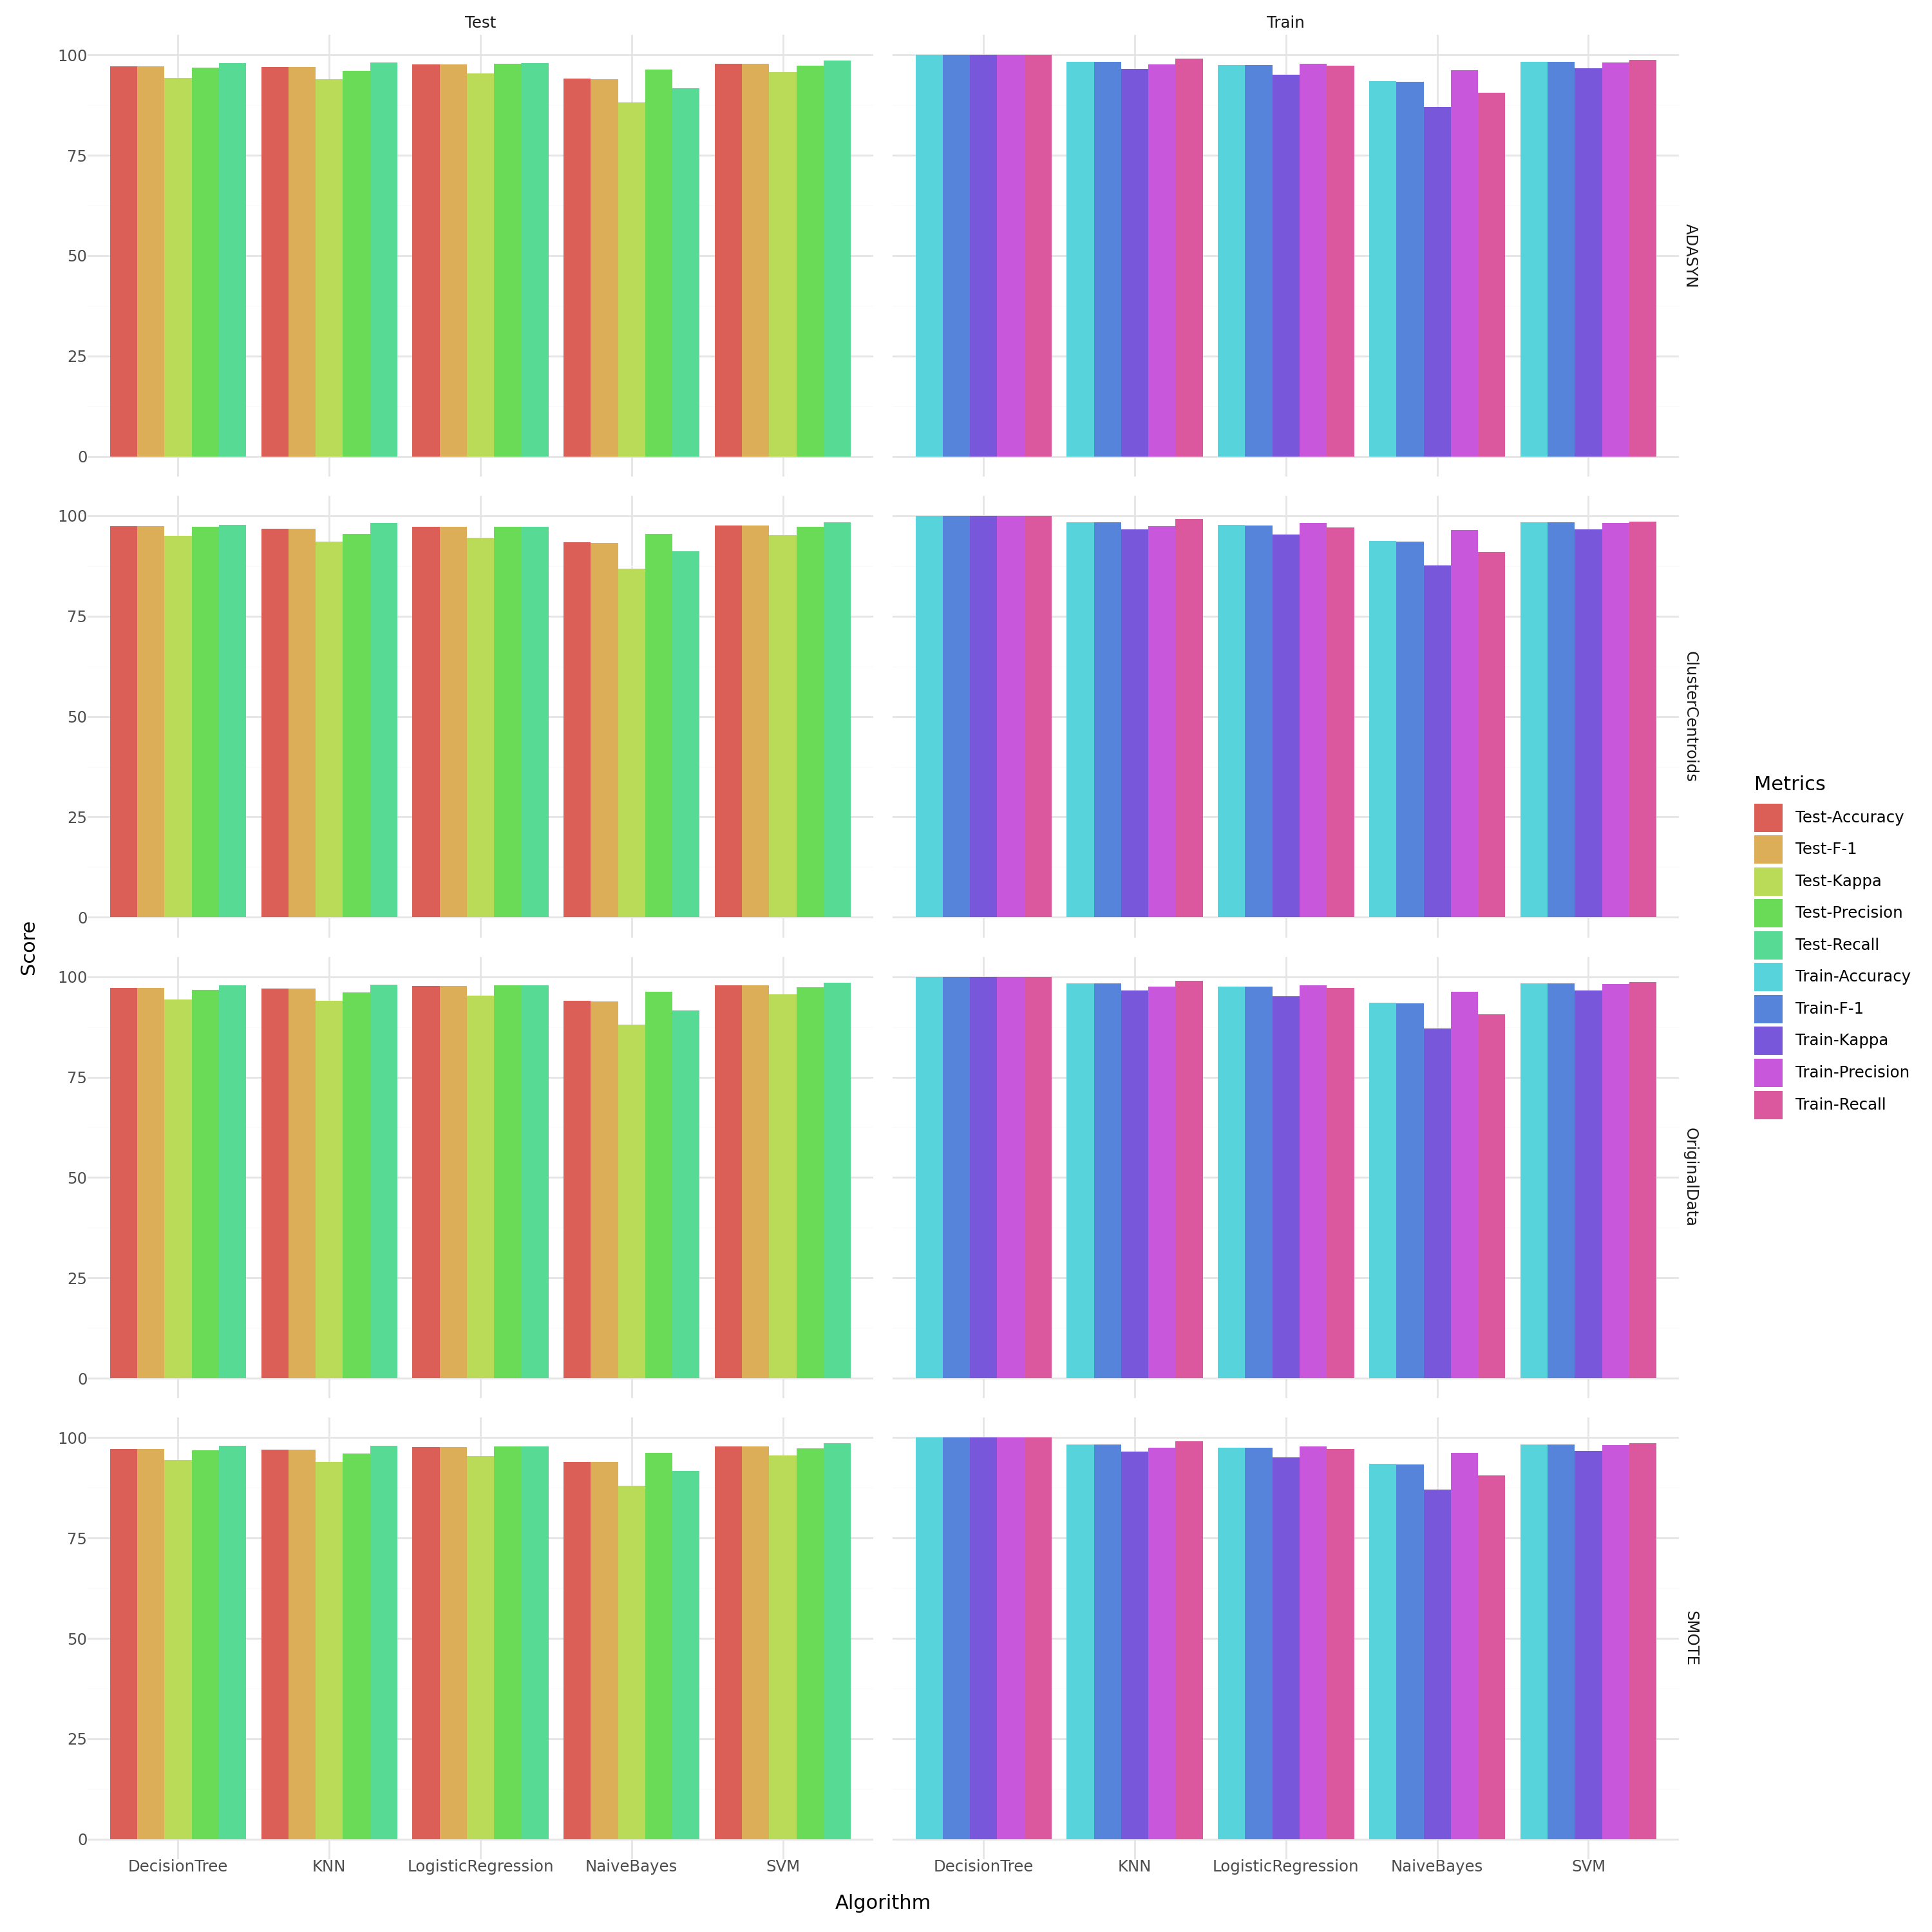

In [18]:
bar_plot.show()

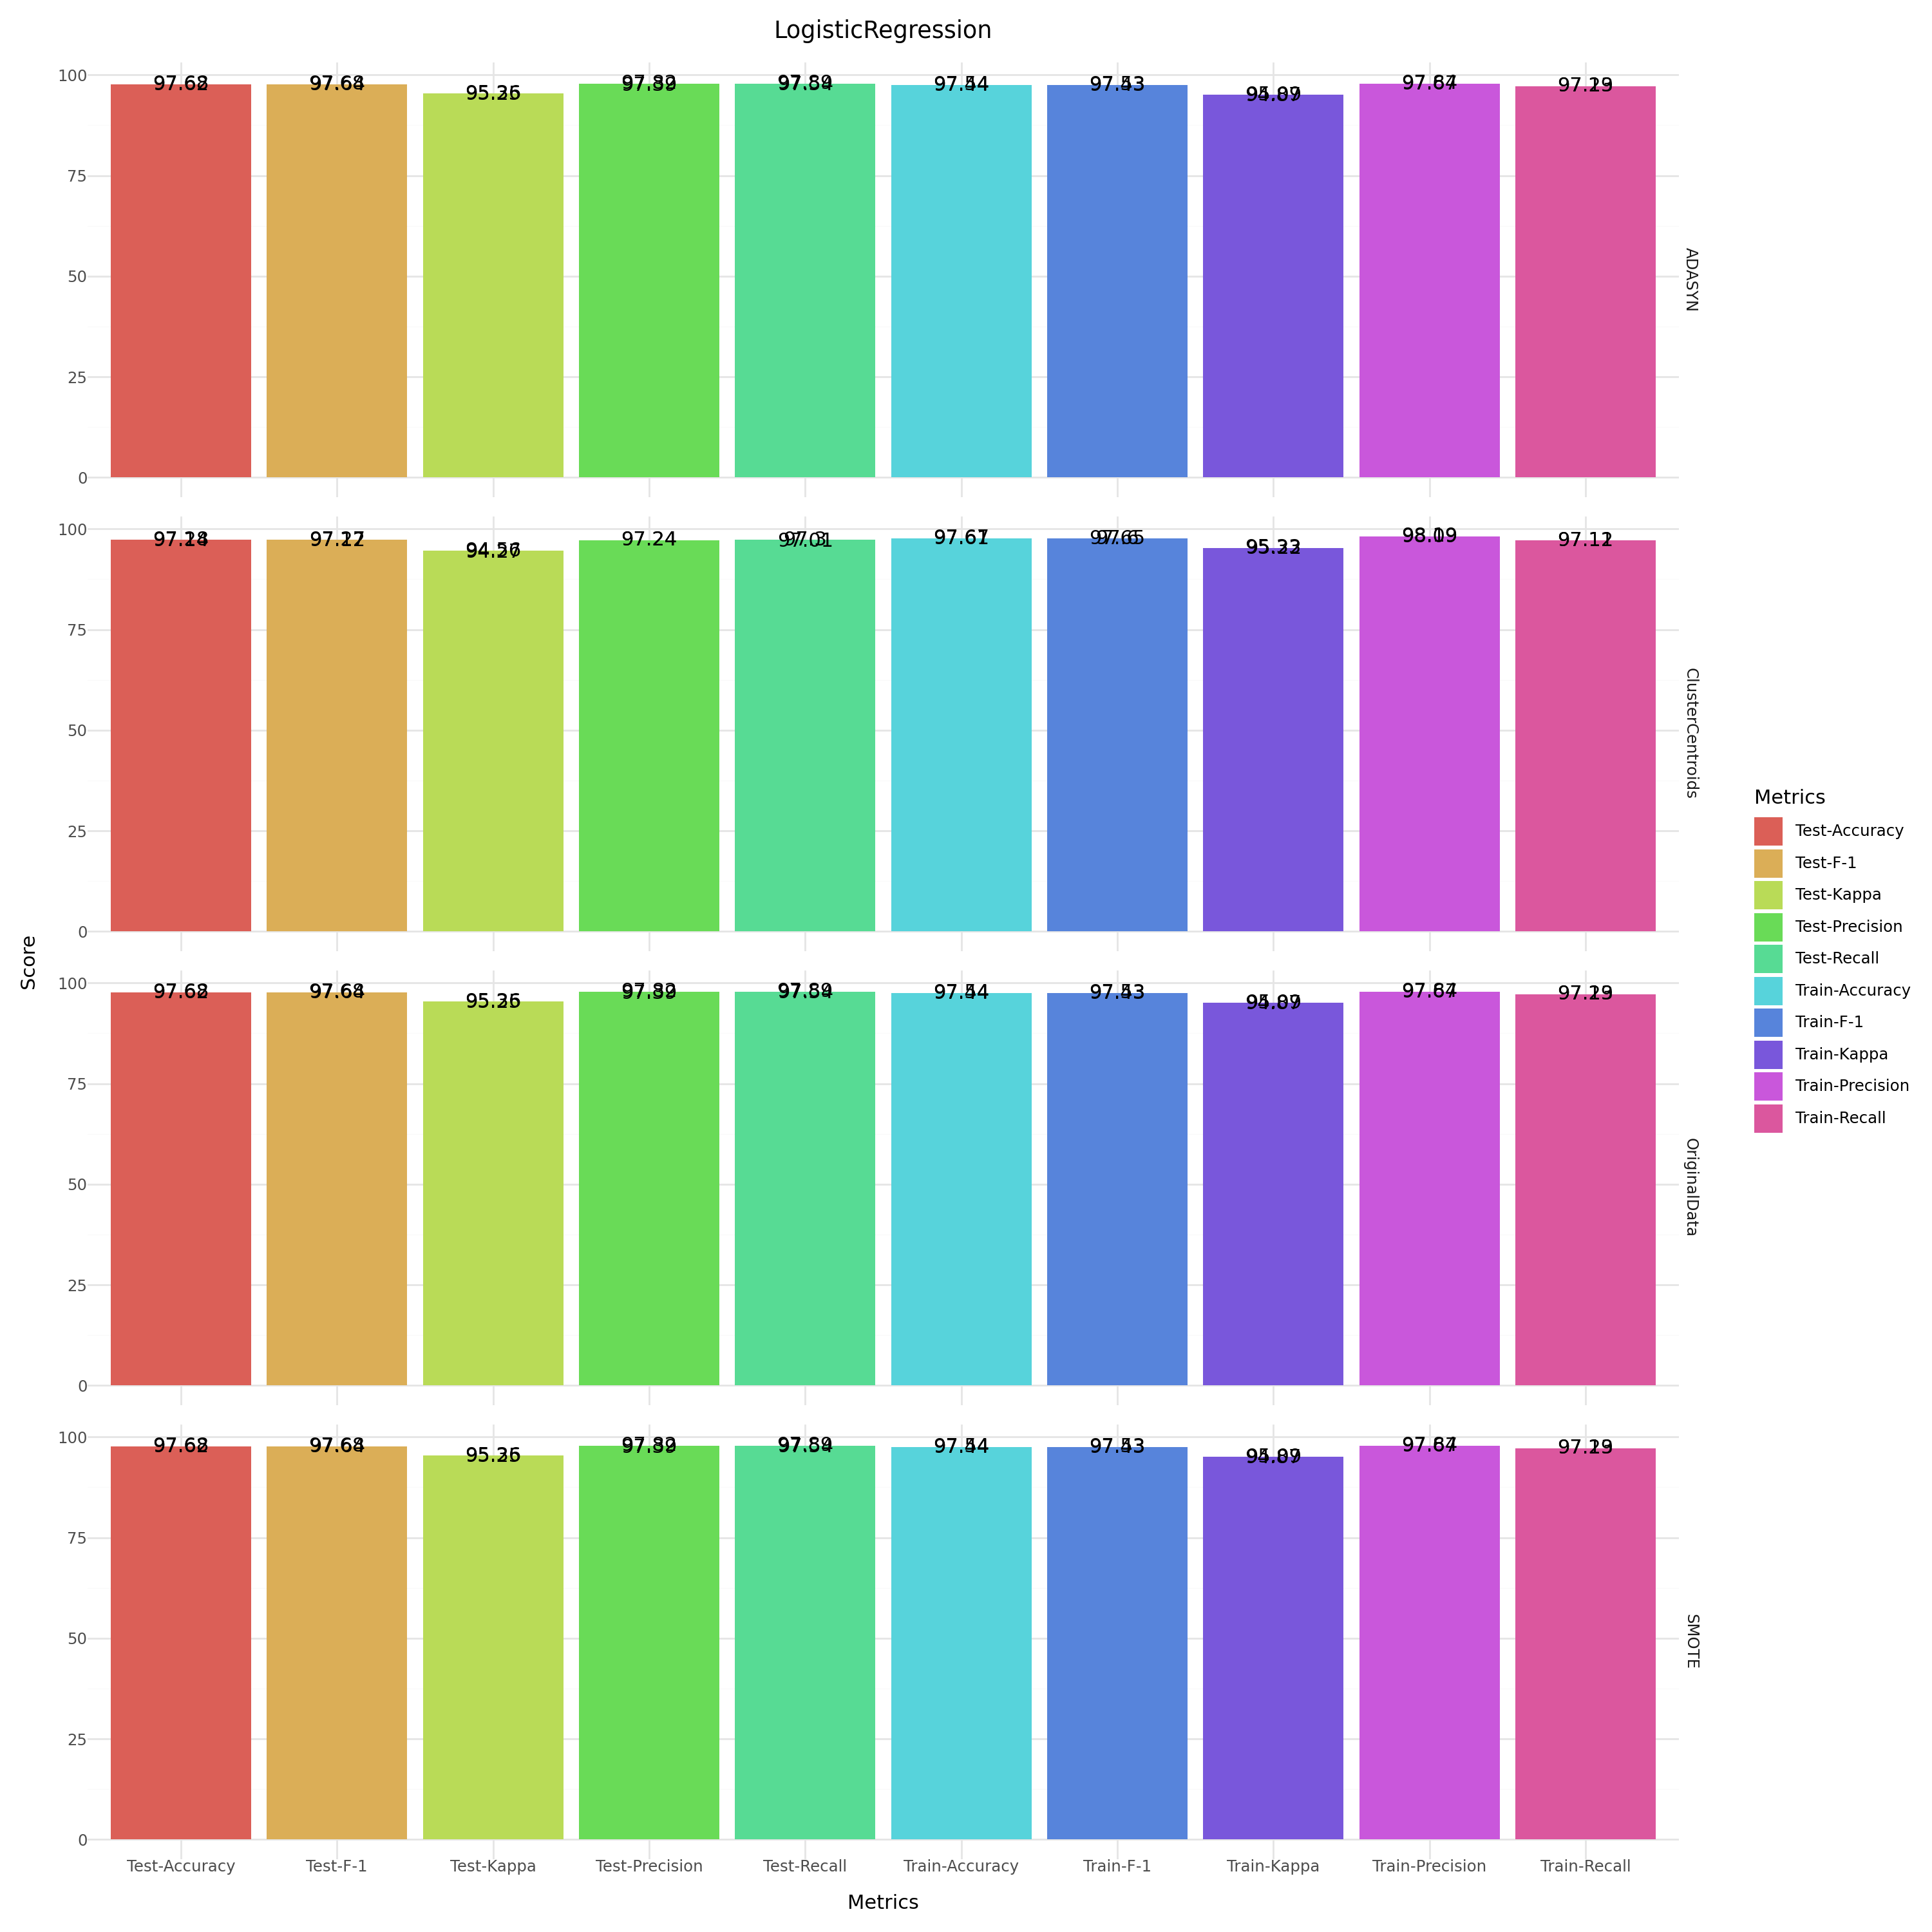

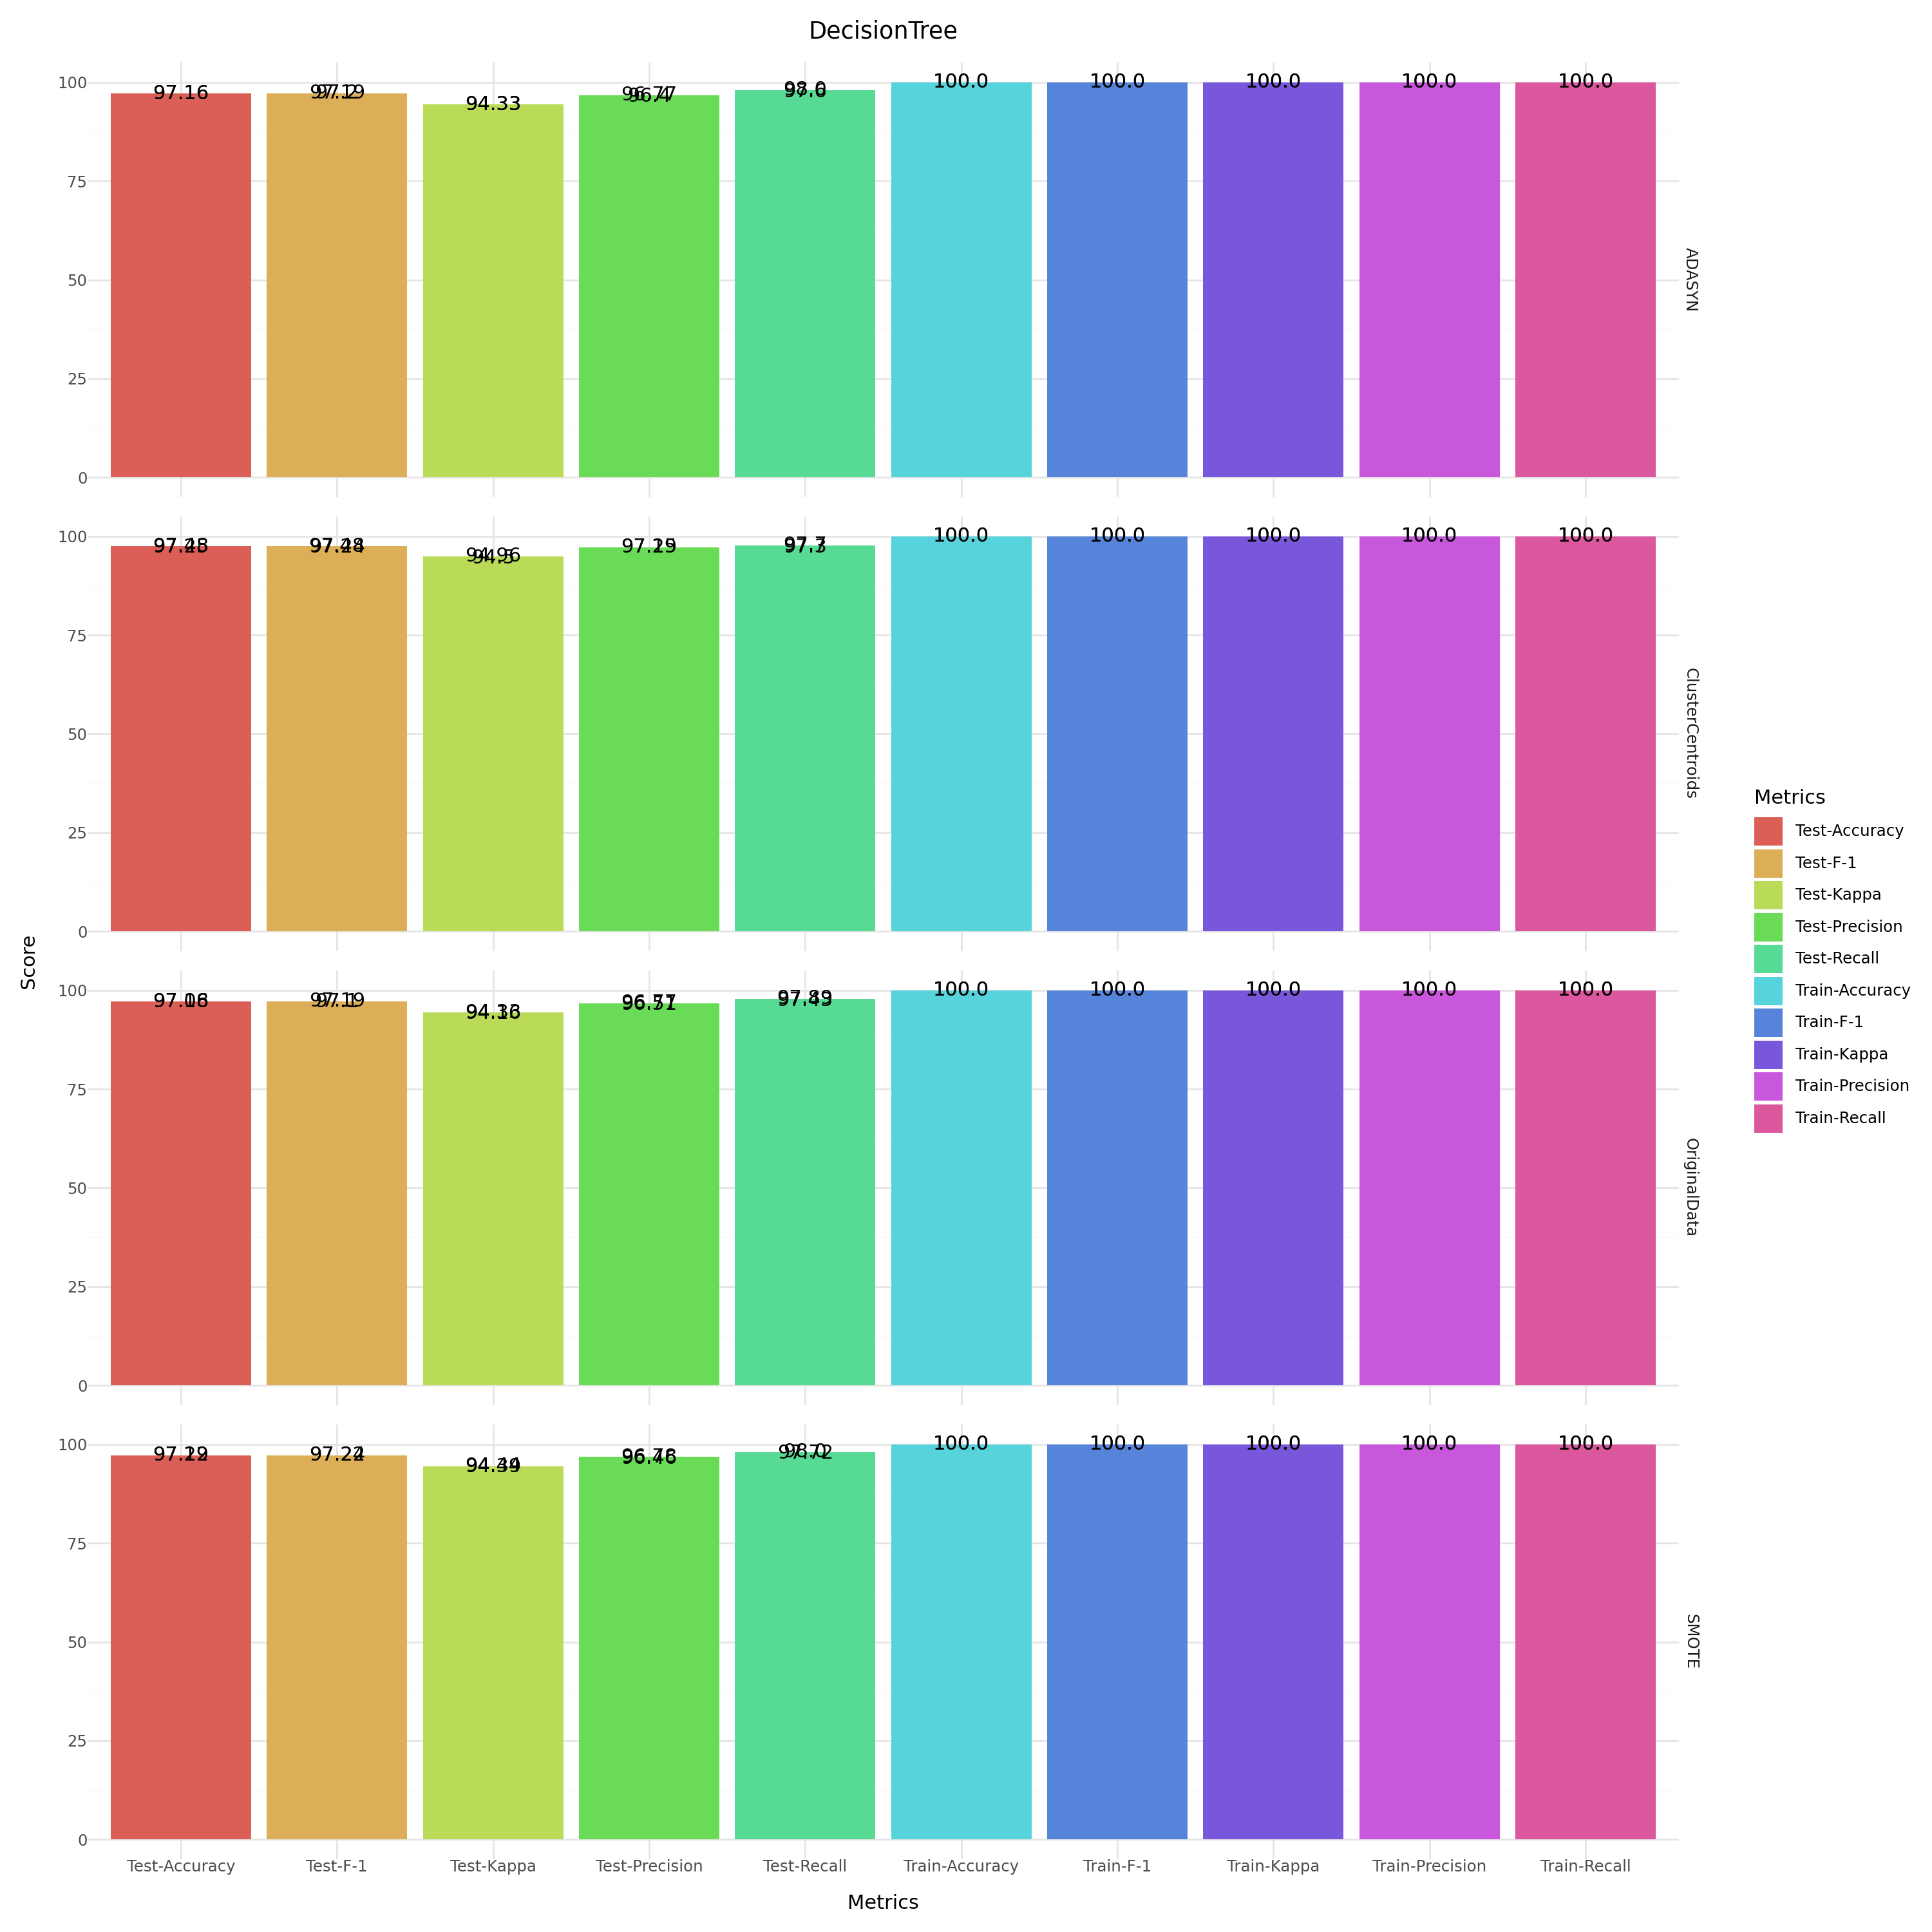

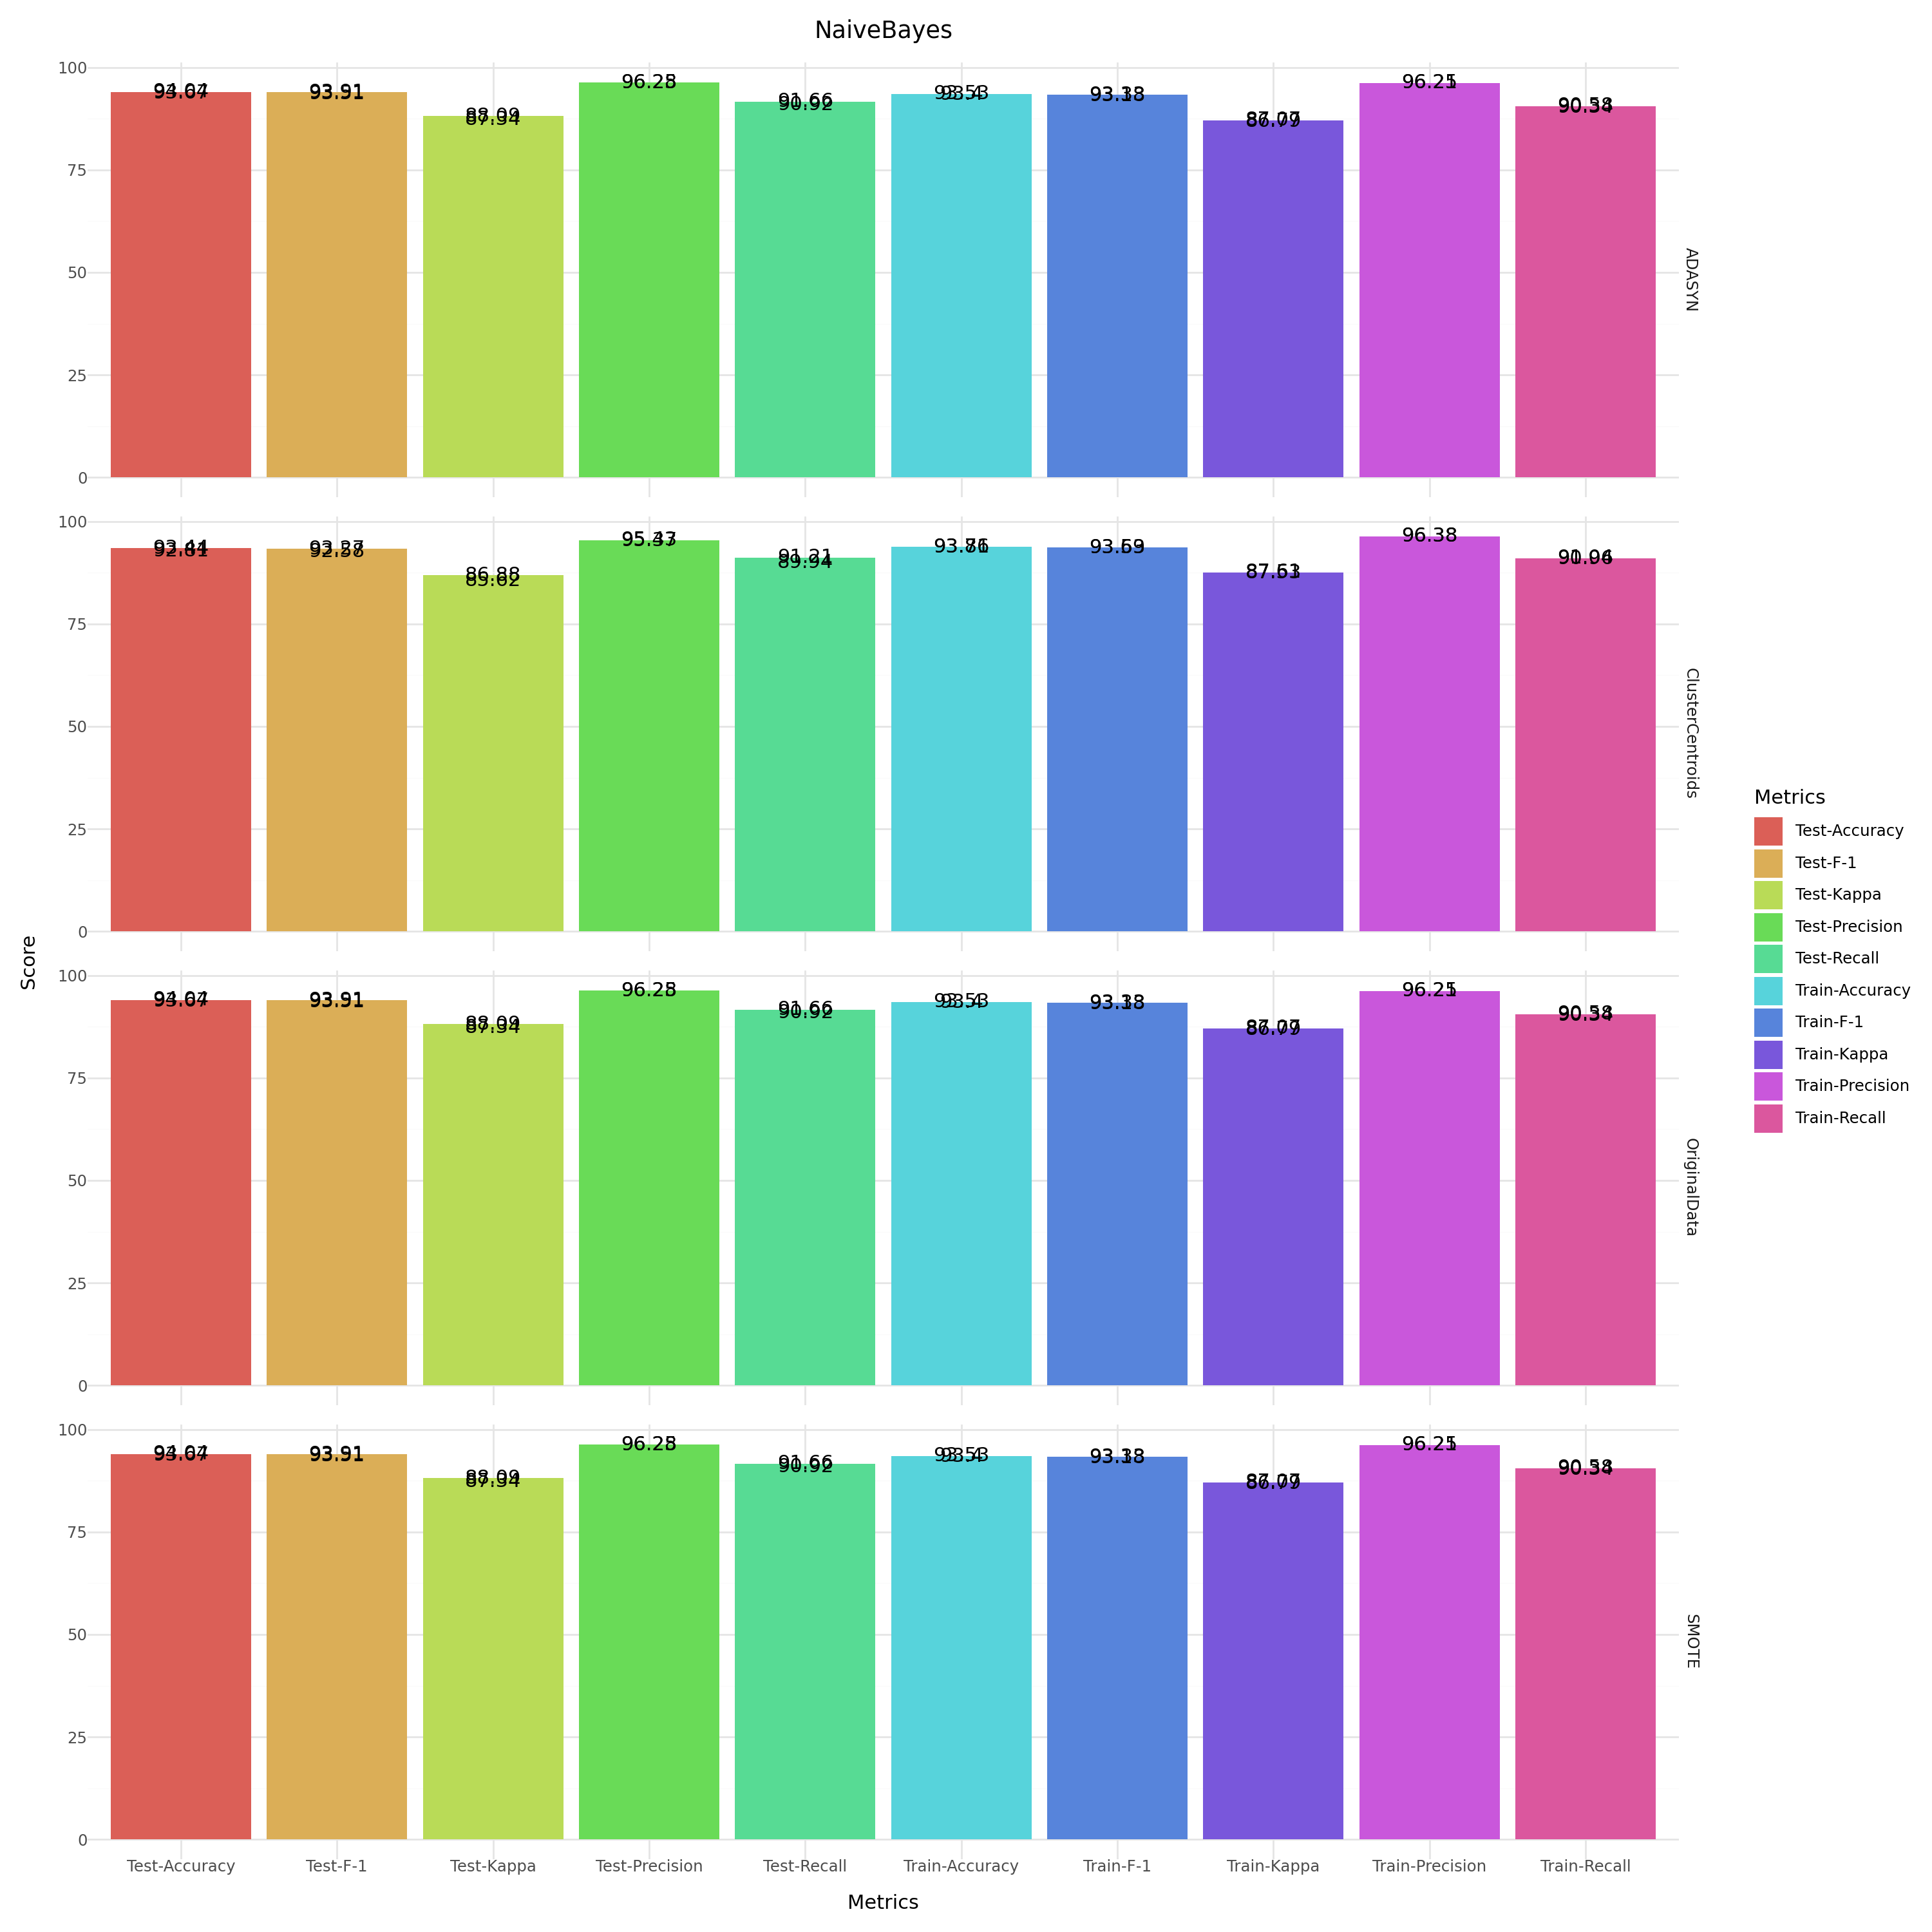

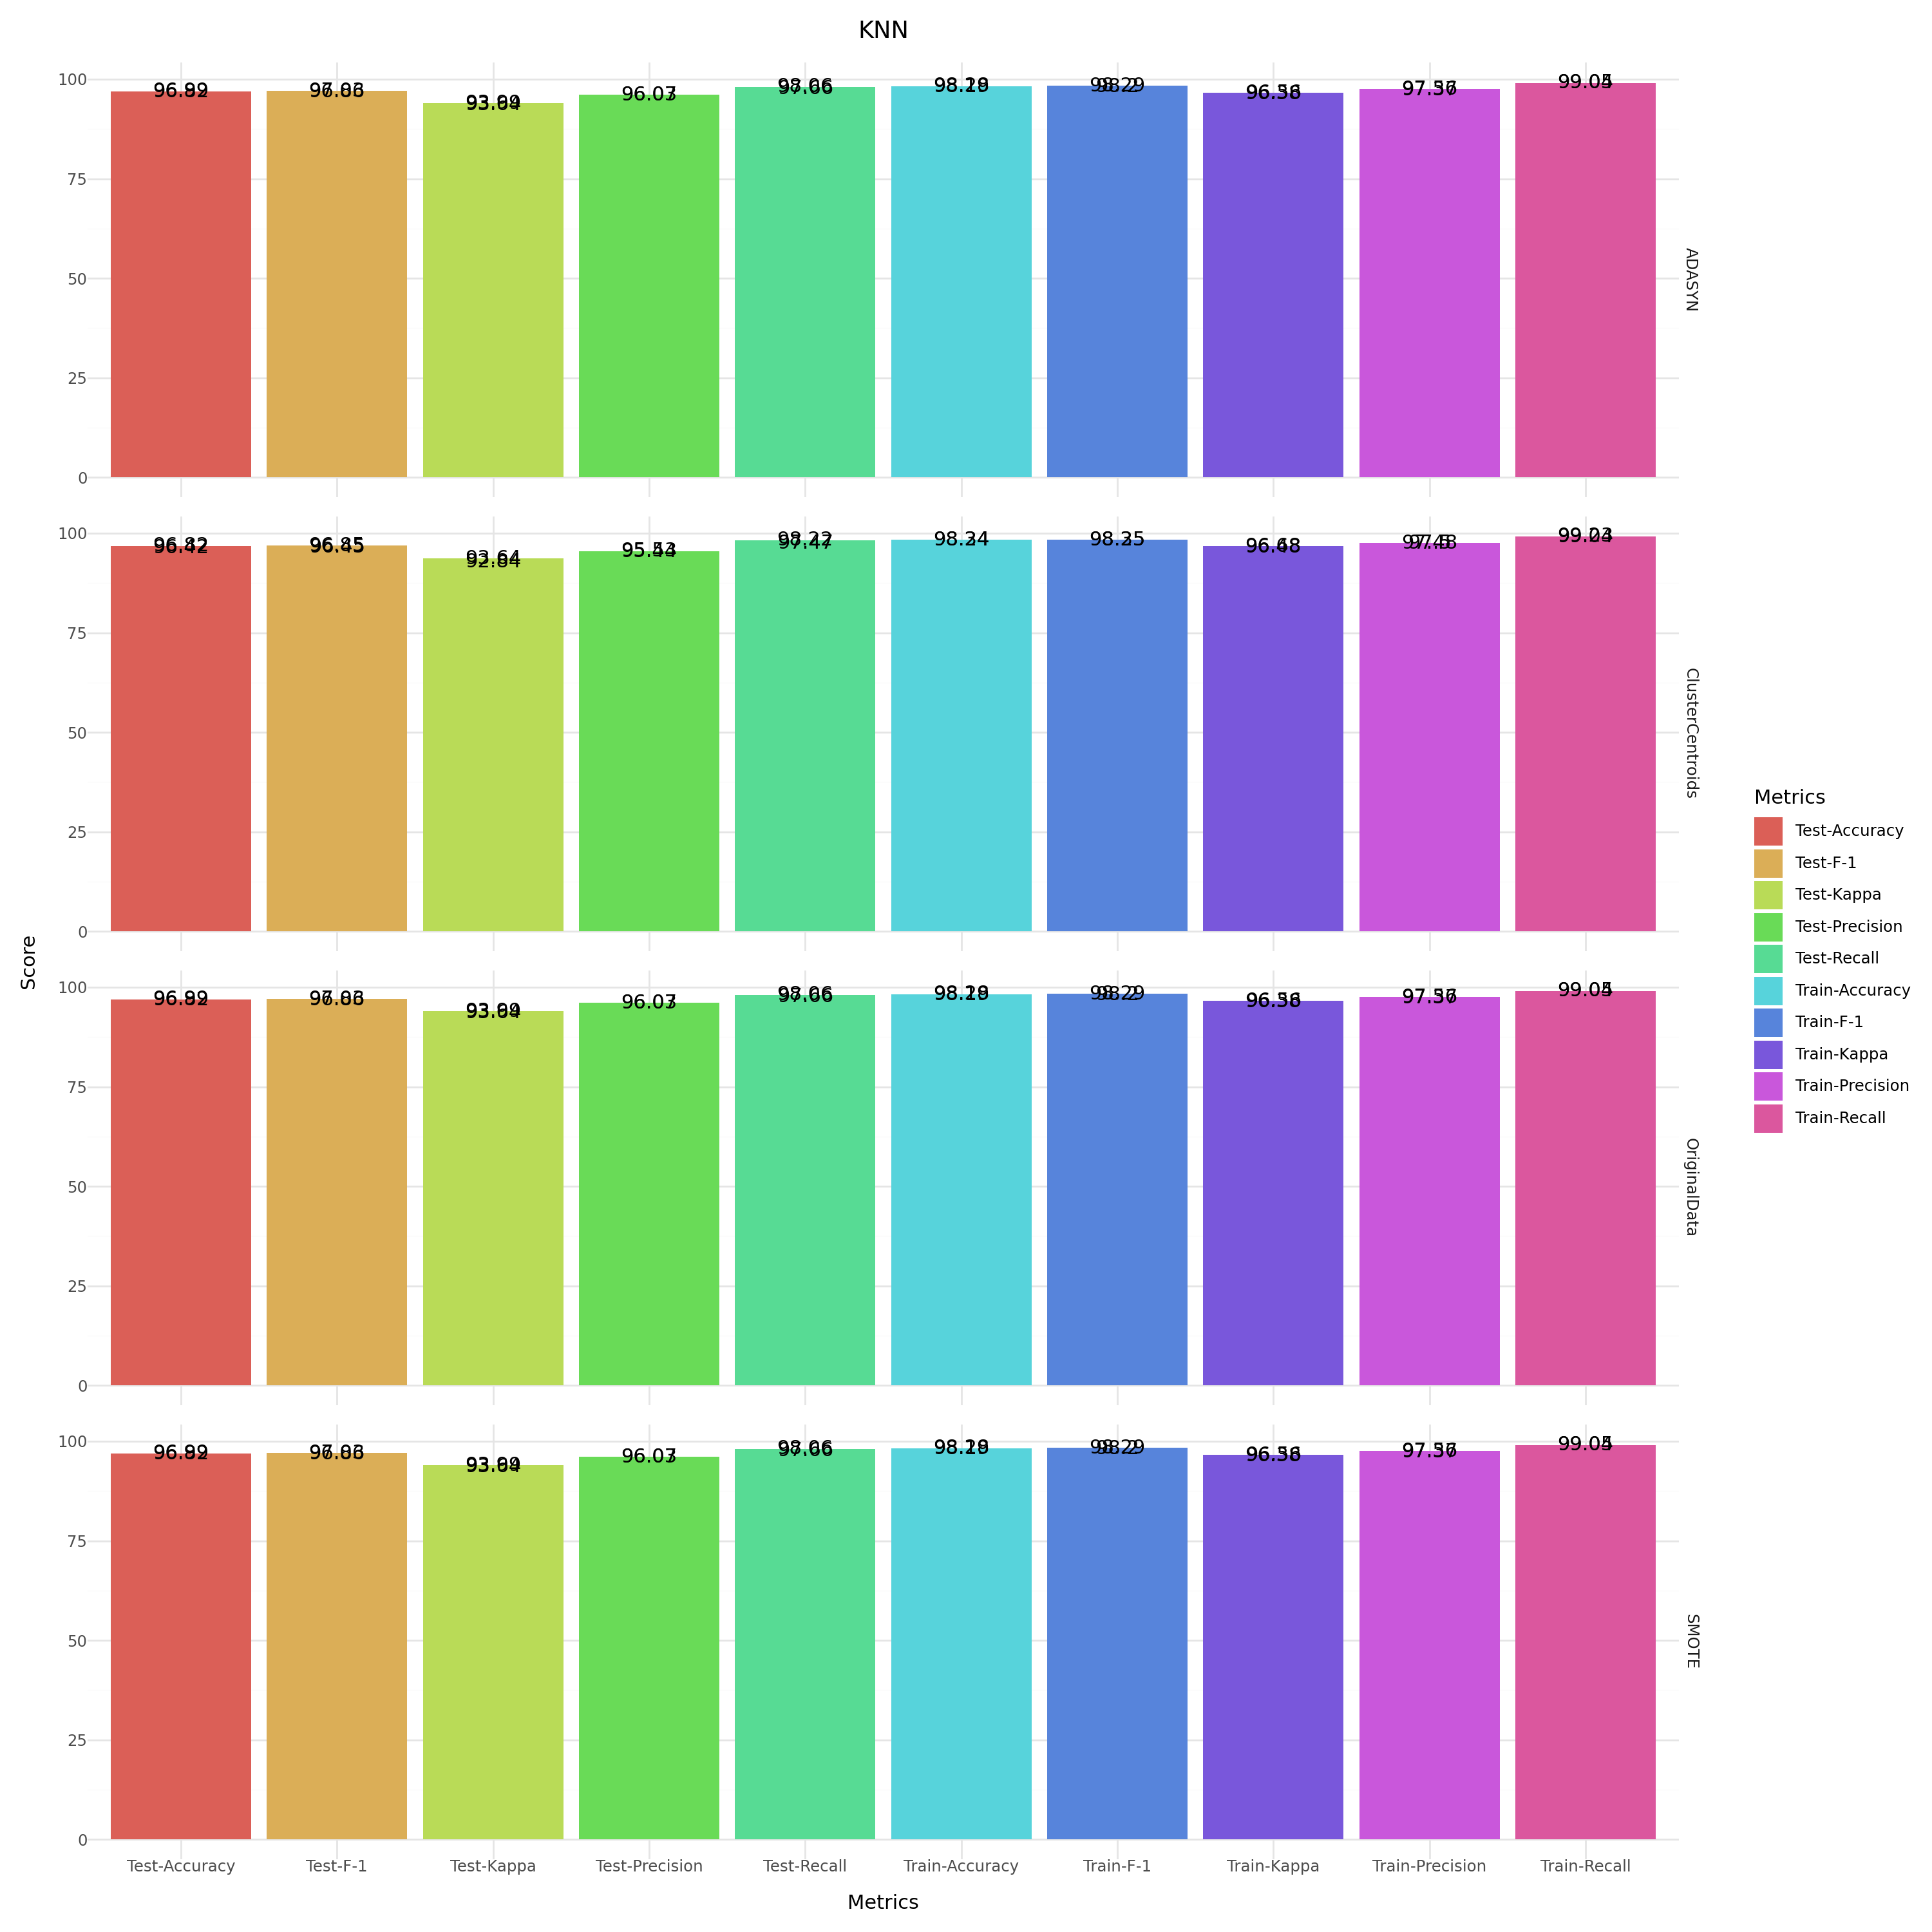

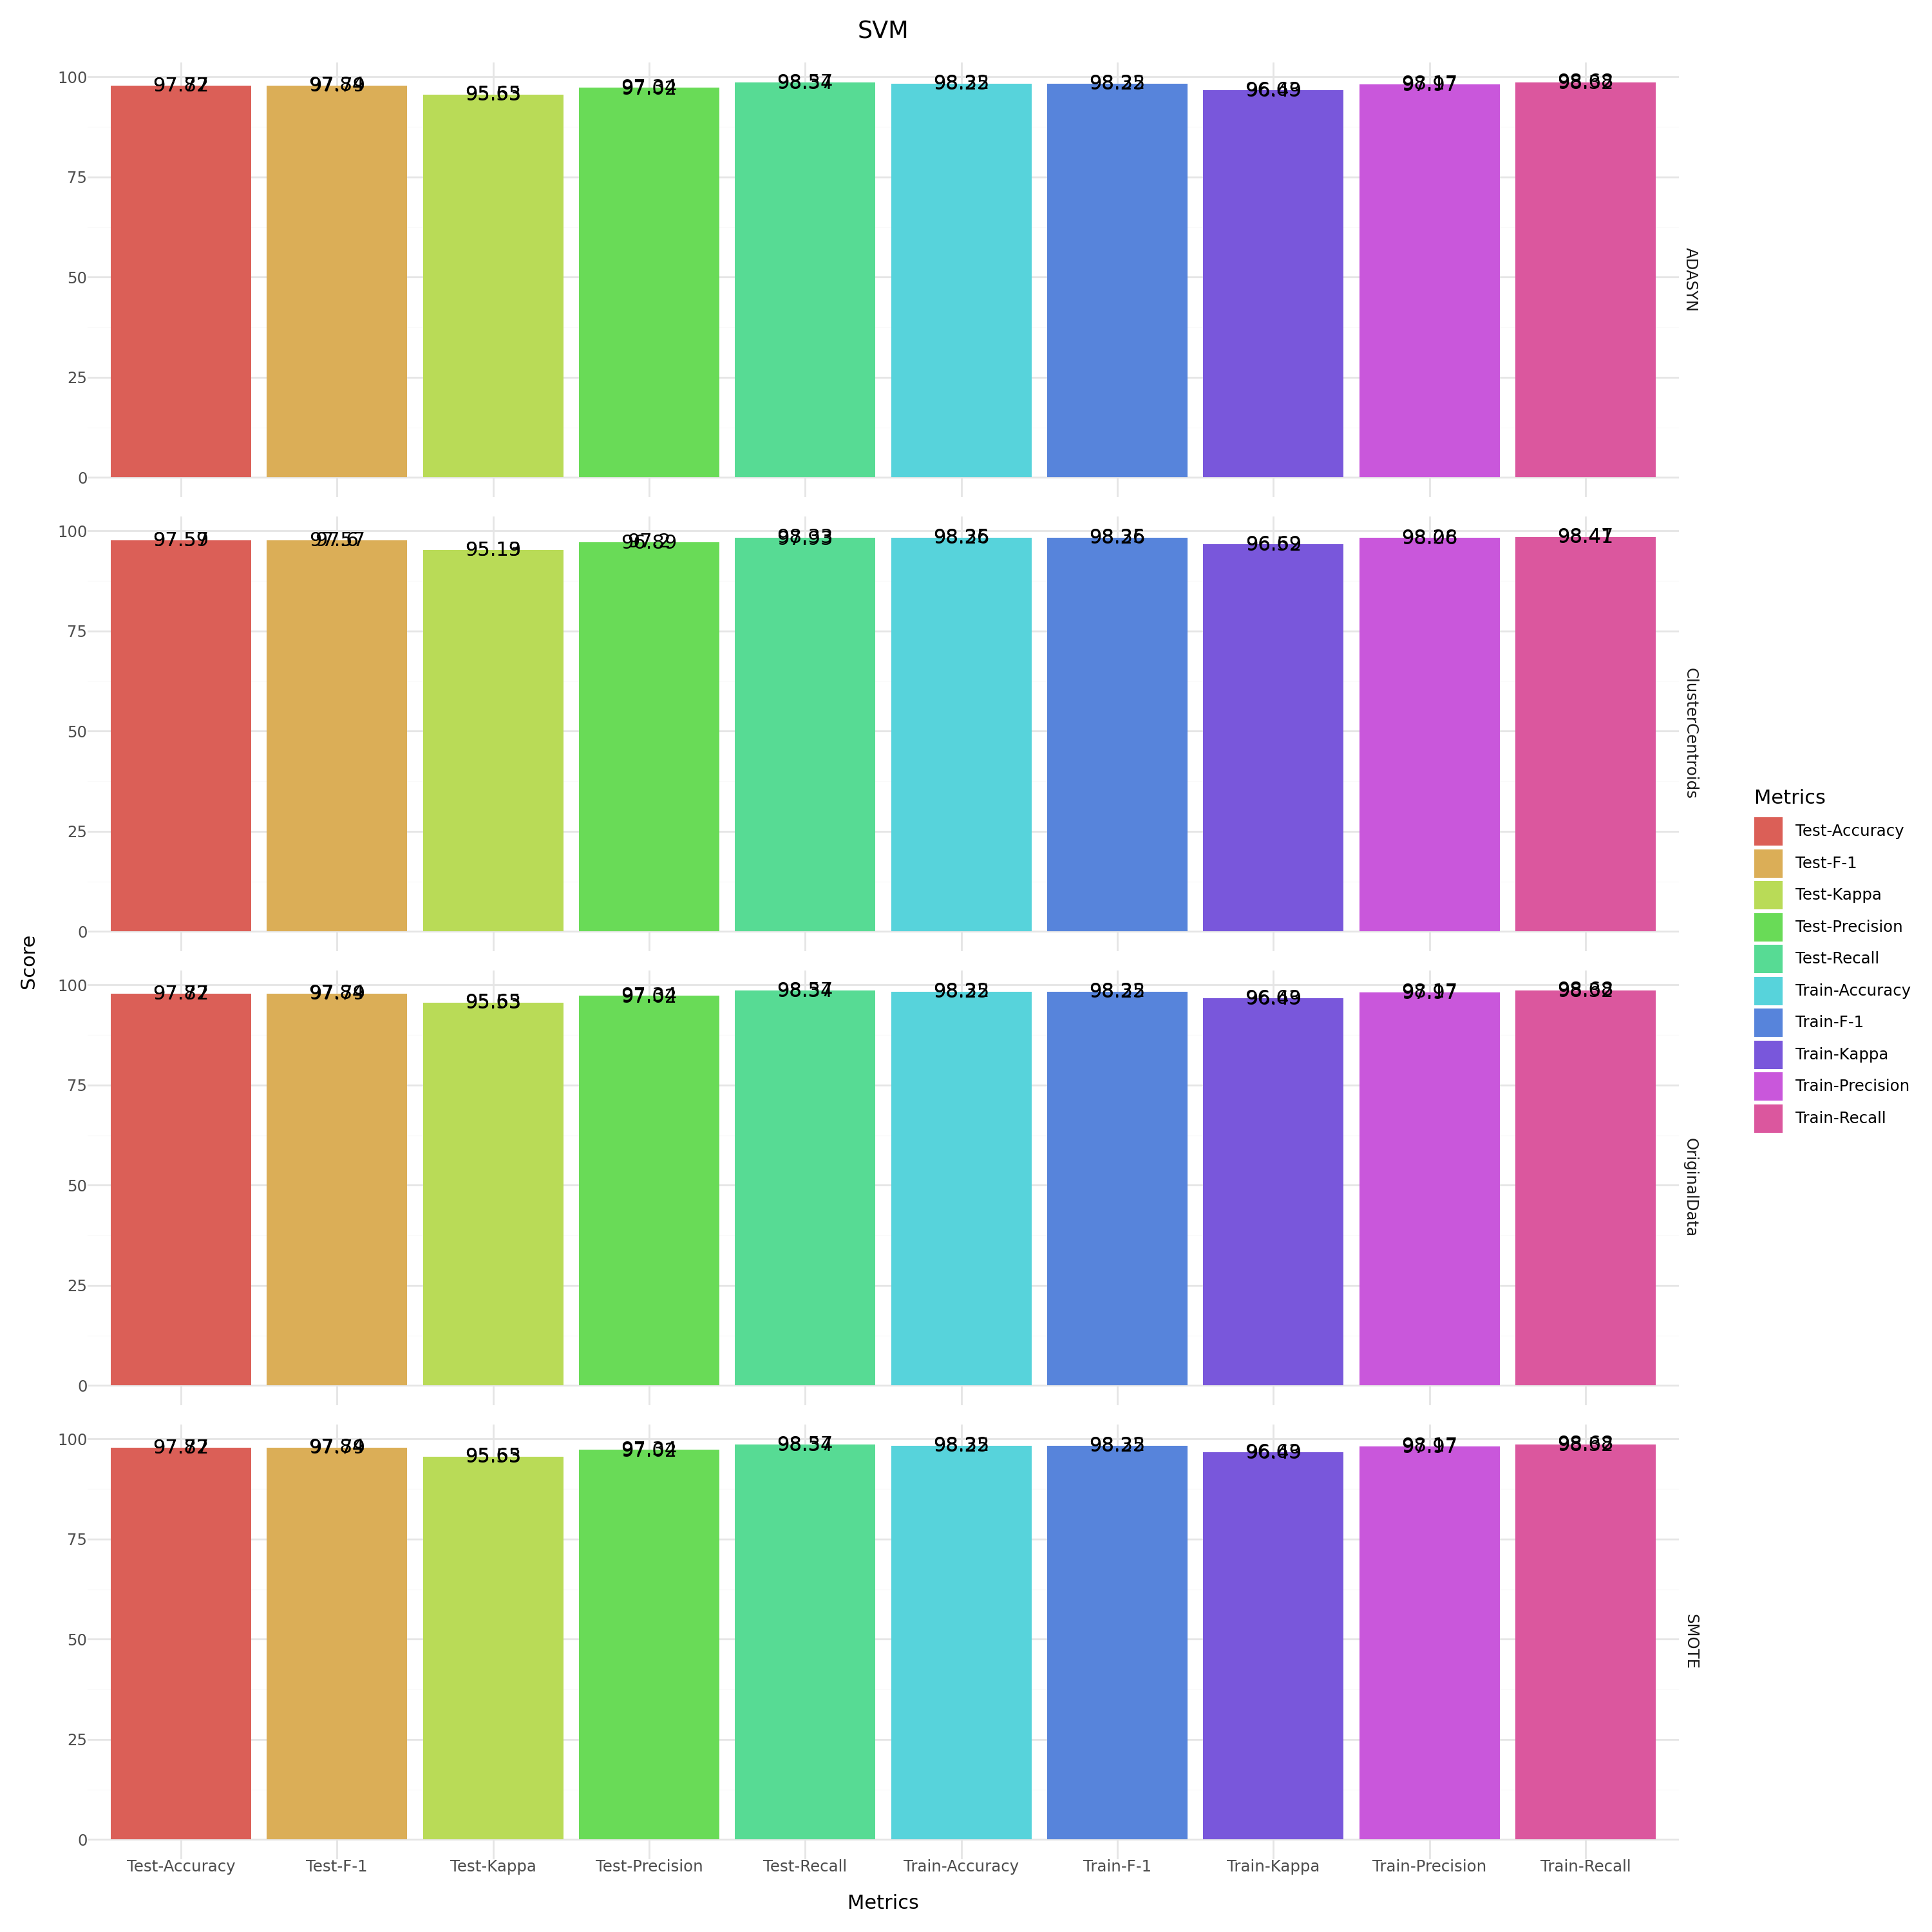

In [52]:
algorithms = df.Algorithm.unique()

for alg in algorithms:

    alg_df = df[df['Algorithm'] == alg]
    

    bar = plt9.ggplot(alg_df, plt9.aes(x='Metrics', y='Score', fill='Metrics',label='Score')) + \
           plt9.facet_grid(rows='Imbalance') + \
           plt9.geom_col(position='dodge') + \
           plt9.theme_minimal() + \
           plt9.theme(figure_size=(15,15)) + \
           plt9.labs(title=alg) + \
           plt9.geom_text(position=plt9.position_dodge(width=.3))
    bar.show()
    print()
    # break

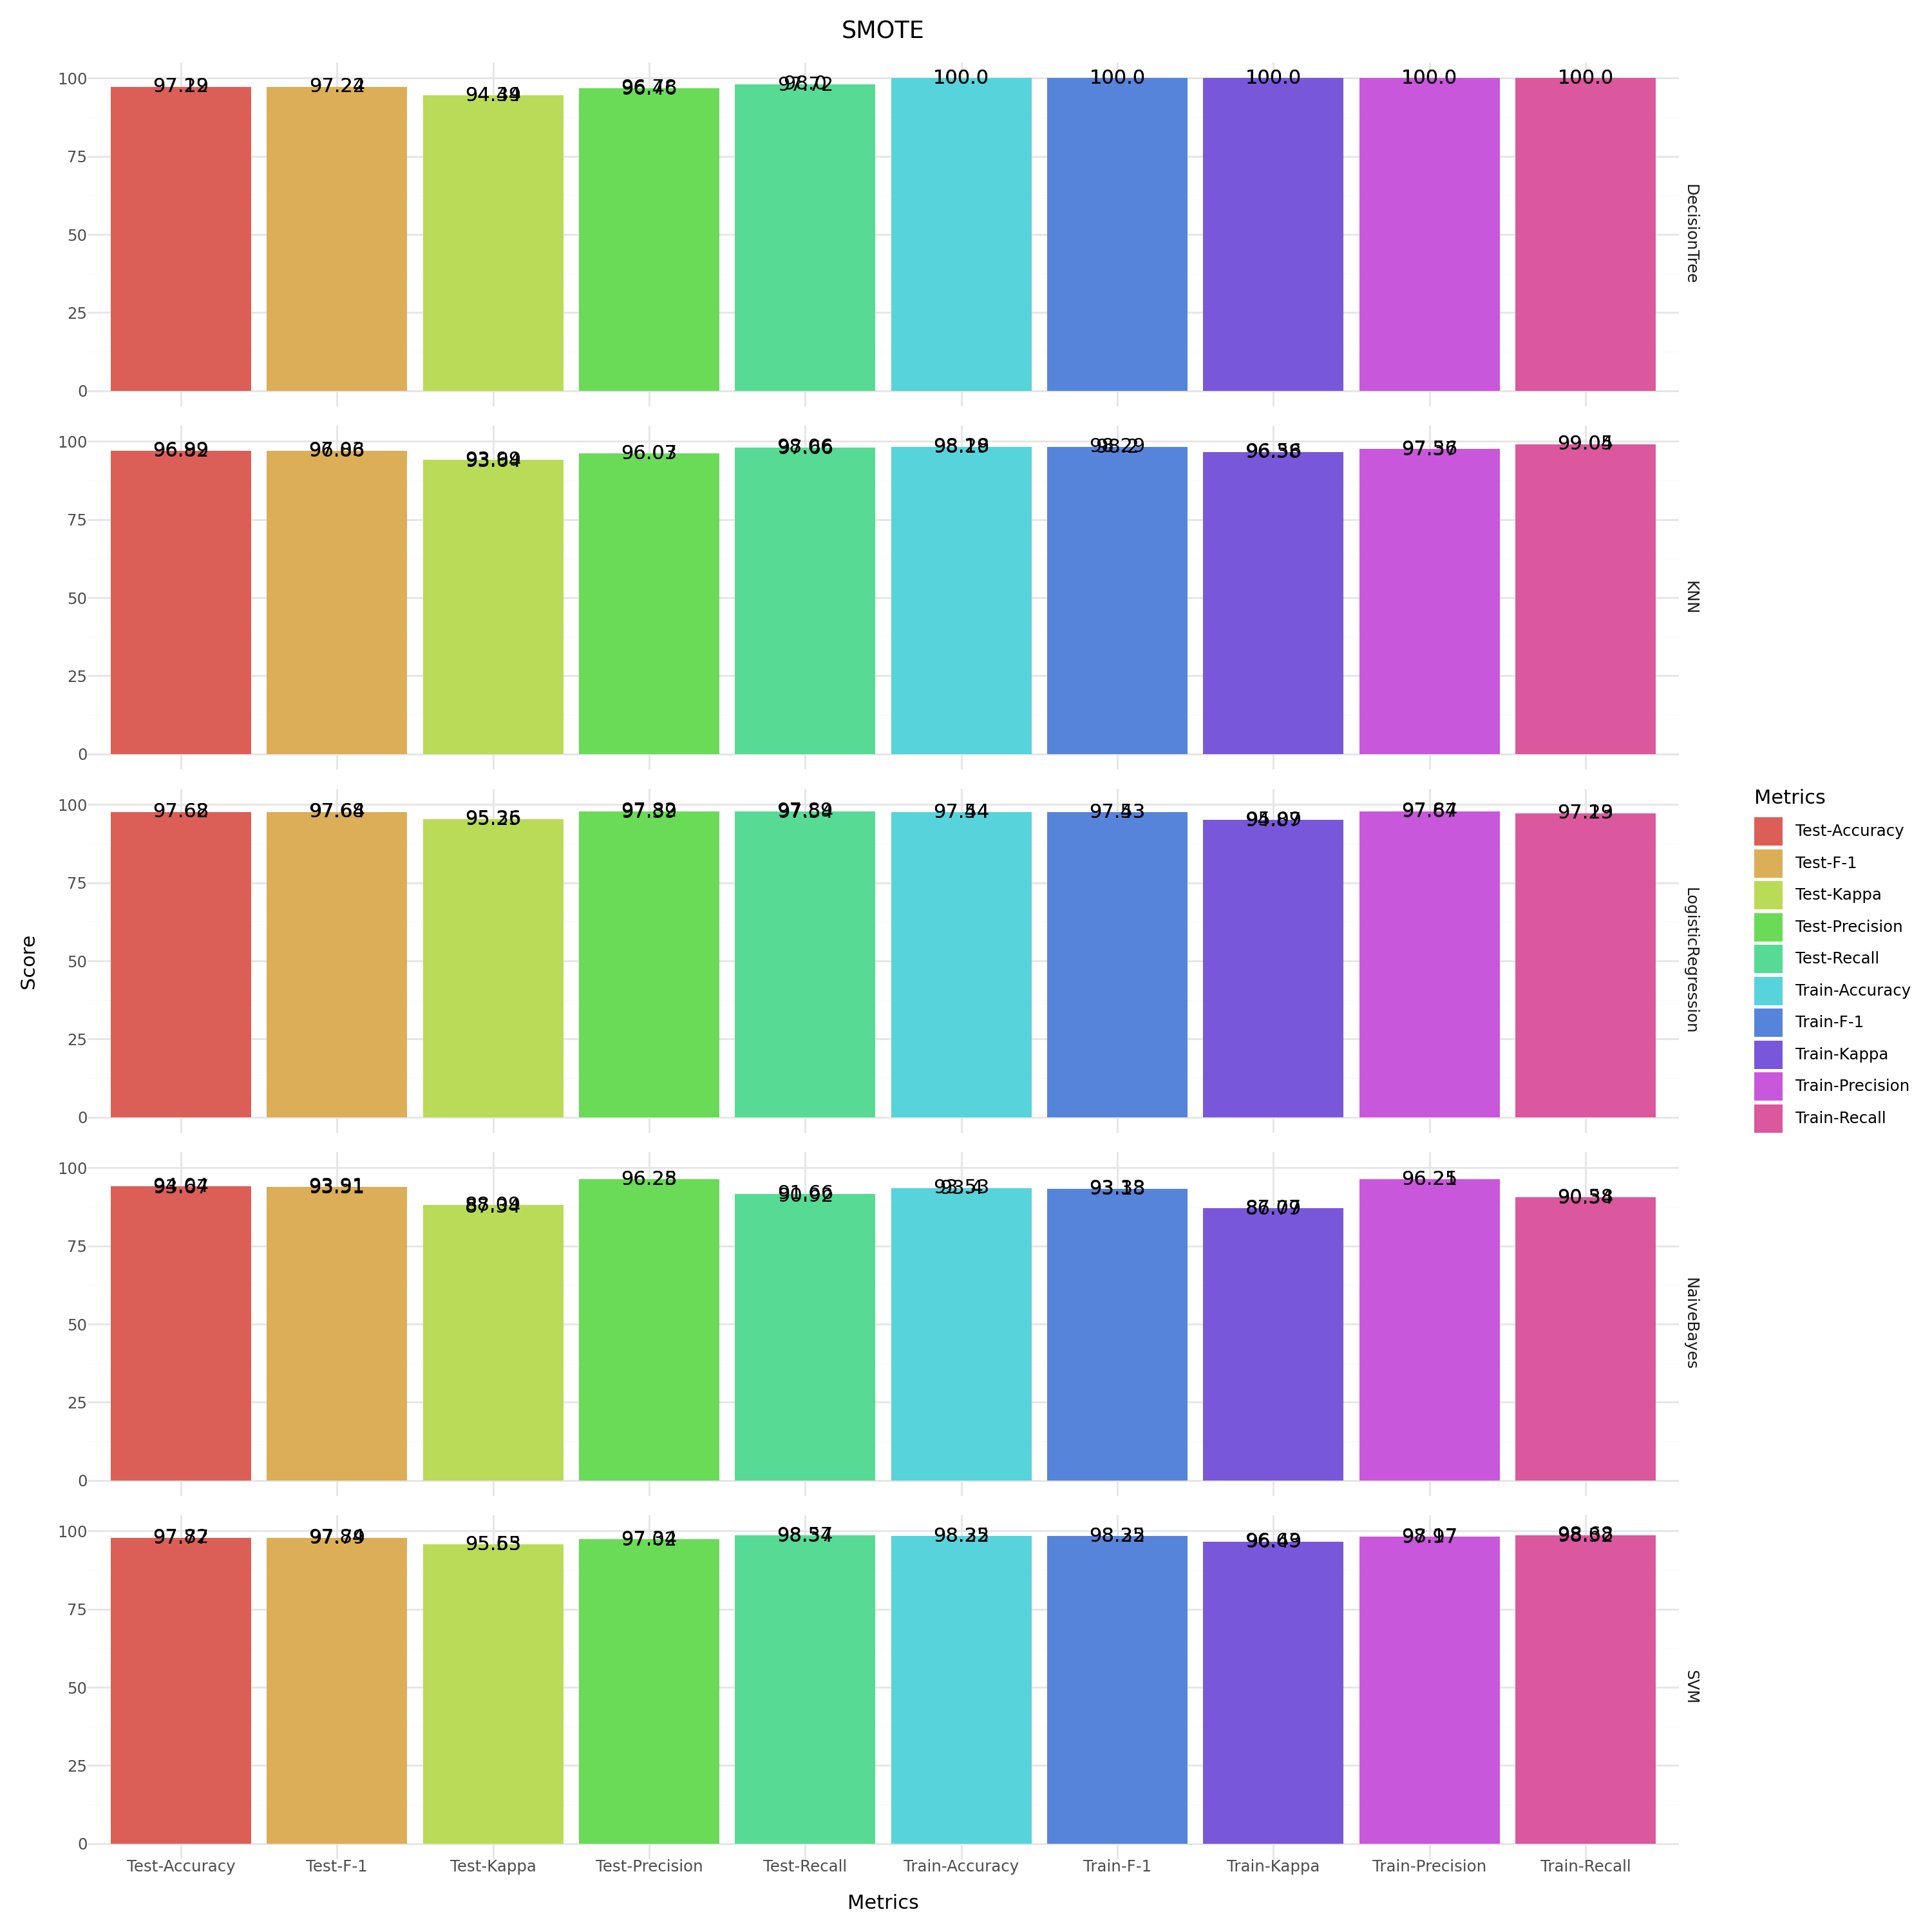

In [57]:
metrics = df.Imbalance.unique()

for met in metrics:

    met_df = df[df['Imbalance'] == met]

    bar = plt9.ggplot(met_df, plt9.aes(x='Metrics', y='Score', fill='Metrics',label='Score')) + \
           plt9.facet_grid(rows='Algorithm') + \
           plt9.geom_col(position='dodge') + \
           plt9.theme_minimal() + \
           plt9.theme(figure_size=(15,15)) + \
           plt9.labs(title=met) + \
           plt9.geom_text(position=plt9.position_dodge(width=.3))
    bar.show()
    print()
    break

In [56]:
met_df

Algorithm          ImputerNum          ImputerCat  \
0   LogisticRegression  SimpleImputer_mean  SimpleImputer_mode   
1         DecisionTree  SimpleImputer_mean  SimpleImputer_mode   
2           NaiveBayes  SimpleImputer_mean  SimpleImputer_mode   
3                  KNN  SimpleImputer_mean  SimpleImputer_mode   
4                  SVM  SimpleImputer_mean  SimpleImputer_mode   
5   LogisticRegression  SimpleImputer_mean  SimpleImputer_mode   
6         DecisionTree  SimpleImputer_mean  SimpleImputer_mode   
7           NaiveBayes  SimpleImputer_mean  SimpleImputer_mode   
8                  KNN  SimpleImputer_mean  SimpleImputer_mode   
9                  SVM  SimpleImputer_mean  SimpleImputer_mode   
10  LogisticRegression  SimpleImputer_mean  SimpleImputer_mode   
11        DecisionTree  SimpleImputer_mean  SimpleImputer_mode   
12          NaiveBayes  SimpleImputer_mean  SimpleImputer_mode   
13                 KNN  SimpleImputer_mean  SimpleImputer_mode   
14                 SVM  SimpleImputer_mean  SimpleImputer_mode   
15  LogisticRegression  SimpleImputer_mean  SimpleImputer_mode   
16        DecisionTree  SimpleImputer_mean  SimpleImputer_mode   
17          NaiveBayes  SimpleImputer_mean  SimpleImputer_mode   
18                 KNN  SimpleImputer_mean  SimpleImputer_mode   
19                 SVM  SimpleImputer_mean  SimpleImputer_mode   
20  LogisticRegression          KNNImptuer  SimpleImputer_mode   
21        DecisionTree          KNNImptuer  SimpleImputer_mode   
22          NaiveBayes          KNNImptuer  SimpleImputer_mode   
23                 KNN          KNNImptuer  SimpleImputer_mode   
24                 SVM          KNNImptuer  SimpleImputer_mode   
25  LogisticRegression          KNNImptuer  SimpleImputer_mode   
26        DecisionTree          KNNImptuer  SimpleImputer_mode   
27          NaiveBayes          KNNImptuer  SimpleImputer_mode   
28                 KNN          KNNImptuer  SimpleImputer_mode   
29                 SVM          KNNImptuer  SimpleImputer_mode   
30  LogisticRegression          KNNImptuer  SimpleImputer_mode   
31        DecisionTree          KNNImptuer  SimpleImputer_mode   
32          NaiveBayes          KNNImptuer  SimpleImputer_mode   
33                 KNN          KNNImptuer  SimpleImputer_mode   
34                 SVM          KNNImptuer  SimpleImputer_mode   
35  LogisticRegression          KNNImptuer  SimpleImputer_mode   
36        DecisionTree          KNNImptuer  SimpleImputer_mode   
37          NaiveBayes          KNNImptuer  SimpleImputer_mode   
38                 KNN          KNNImptuer  SimpleImputer_mode   
39                 SVM          KNNImptuer  SimpleImputer_mode   

           Imbalance    Metrics   Score    Set  
0              SMOTE  Train-F-1   97.53  Train  
1              SMOTE  Train-F-1  100.00  Train  
2              SMOTE  Train-F-1   93.18  Train  
3              SMOTE  Train-F-1   98.20  Train  
4              SMOTE  Train-F-1   98.25  Train  
5             ADASYN  Train-F-1   97.53  Train  
6             ADASYN  Train-F-1  100.00  Train  
7             ADASYN  Train-F-1   93.18  Train  
8             ADASYN  Train-F-1   98.20  Train  
9             ADASYN  Train-F-1   98.25  Train  
10      OriginalData  Train-F-1   97.53  Train  
11      OriginalData  Train-F-1  100.00  Train  
12      OriginalData  Train-F-1   93.18  Train  
13      OriginalData  Train-F-1   98.20  Train  
14      OriginalData  Train-F-1   98.25  Train  
15  ClusterCentroids  Train-F-1   97.65  Train  
16  ClusterCentroids  Train-F-1  100.00  Train  
17  ClusterCentroids  Train-F-1   93.63  Train  
18  ClusterCentroids  Train-F-1   98.25  Train  
19  ClusterCentroids  Train-F-1   98.35  Train  
20             SMOTE  Train-F-1   97.43  Train  
21             SMOTE  Train-F-1  100.00  Train  
22             SMOTE  Train-F-1   93.33  Train  
23             SMOTE  Train-F-1   98.29  Train  
24             SMOTE  Train-F-1   98.32  Train  
25            ADASYN  Train-F-1 